In [1]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as ticker
from collections import OrderedDict
from scipy import stats
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pylab as plot
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)



# Here are my rc parameters for matplotlibf
fsize = 20
mpl.rc('font', serif='Helvetica Neue')
#mpl.rc('font', serif='Times New Roman')
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25
mpl.rcParams['legend.fontsize']= 20.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Times New Roman"
# Load LaTeX and amsmath
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
print(parent)
# Grab file names from data folder
dens = os.listdir('../../../../../../../../Volumes/EXTERNAL2/final_videos/txt_files_eps/Align_press_CoM')

try:
    dens.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
  
# Grab the MCS data
pres = os.listdir('../../../../../../../../Volumes/EXTERNAL2/final_videos/txt_files_eps/Interpart_press')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres2 = os.listdir('../../../../../../../../Volumes/EXTERNAL2/final_videos/txt_files_eps/BubComp')
try:
    pres2.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
# Grab the MCS data
pres3 = os.listdir('../../../../../../../../Volumes/EXTERNAL2/final_videos/txt_files_eps/PhaseComp')
try:
    pres3.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
# Grab the MCS data
pres4 = os.listdir('../../../../../../../../Volumes/EXTERNAL2/final_videos/txt_files_eps/radial')
try:
    pres4.remove('.DS_Store')
except:
    print(".DS_Store not in directory")    
    
# Grab the MCS data
pres5 = os.listdir('../../../../../../../../Volumes/EXTERNAL2/final_videos/txt_files_eps/lat_end')
try:
    pres5.remove('.DS_Store')
except:
    print(".DS_Store not in directory")    
    

/Users/nicklauersdorf/klotsa/ABPs/post_proc/Jupyter


In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in range(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in range(len(fname)):
        if fname[i] == string[0]:
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in range(len(cpy1)):
        for j in range(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in range(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_dens = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/EXTERNAL2/final_videos/txt_files_eps/Align_press_CoM')
for i in dens:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_dens.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_dens[0])

,tauB,sizeBin,clust_size,press_align,press_alignA,press_alignB
0,0.0,5.016308,41466,9307.579547,0.0,9307.579547
1,0.3,5.016308,40884,5372.864343,0.0,5372.864343
2,0.6,5.016308,40564,2717.315880,0.0,2717.315880
3,0.9,5.016308,39065,2085.063098,0.0,2085.063098
4,1.2,5.016308,37831,2012.940553,0.0,2012.940553
...,...,...,...,...,...,...
1994,598.2,5.016308,26695,3497.053890,0.0,3497.053890
1995,598.5,5.016308,27148,2781.985347,0.0,2781.985347
1996,598.8,5.016308,25677,3225.167762,0.0,3225.167762
1997,599.1,5.016308,26385,2860.216123,0.0,2860.216123


In [5]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in range(0, len(all_dens)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,450,50.0,1.000,60.0,0.000001
1,0,0,400,50.0,1.000,60.0,0.000001
2,0,0,150,50.0,1.000,60.0,0.000001
3,0,0,100,50.0,1.000,60.0,0.000001
4,0,0,300,50.0,1.000,60.0,0.000001
...,...,...,...,...,...,...,...
106,0,400,450,50.0,1.000,60.0,0.000001
107,0,450,450,50.0,1.000,60.0,0.000001
108,0,450,500,50.0,1.000,60.0,0.000001
109,0,500,500,50.0,0.001,60.0,0.000001


In [6]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_dens)):
    # Ger rid of NaN in favor of 0
    all_dens[i].fillna(0, inplace=True)

headers=list(all_dens[0])
display(all_dens[0])
print(all_dens[0][headers[1]][0])
print(all_dens[0][headers[2]][0])

,tauB,sizeBin,clust_size,press_align,press_alignA,press_alignB
0,0.0,5.016308,41466,9307.579547,0.0,9307.579547
1,0.3,5.016308,40884,5372.864343,0.0,5372.864343
2,0.6,5.016308,40564,2717.315880,0.0,2717.315880
3,0.9,5.016308,39065,2085.063098,0.0,2085.063098
4,1.2,5.016308,37831,2012.940553,0.0,2012.940553
...,...,...,...,...,...,...
1994,598.2,5.016308,26695,3497.053890,0.0,3497.053890
1995,598.5,5.016308,27148,2781.985347,0.0,2781.985347
1996,598.8,5.016308,25677,3225.167762,0.0,3225.167762
1997,599.1,5.016308,26385,2860.216123,0.0,2860.216123


5.016308
41466


In [7]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/EXTERNAL2/final_videos/txt_files_eps/Interpart_press')
for i in pres:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres[-1])

,Timestep,gasArea,gasSigXX,gasSigXY,gasSigYX,gasSigYY,gasTrace,bulkArea,bulkSigXX,bulkSigXY,bulkSigYX,bulkSigYY,bulkTrace,Length,NDense
0,0.0,38150.407,2340.373,-162.906,-162.906,2071.772,2043.167,24985.240,7.867153e+07,11439.588,11439.588,7.865170e+07,7.867305e+07,518.4,46185
1,0.3,43114.177,58129.935,20.697,20.697,64303.003,61237.166,20060.845,3.696019e+08,1658466.077,1658466.077,3.710736e+08,3.719962e+08,516.2,46839
2,0.6,41715.735,80895.230,-454.914,-454.914,80109.101,80047.252,21370.376,2.191604e+08,1945102.848,1945102.848,2.129966e+08,2.180236e+08,539.8,46183
3,0.9,41457.893,151870.294,-6617.787,-6617.787,154039.765,146337.242,21524.064,1.618843e+08,2861643.482,2861643.482,1.621861e+08,1.648968e+08,565.8,44807
4,1.2,41555.695,190329.503,2913.213,2913.213,184206.520,190181.225,21336.081,1.505110e+08,927089.224,927089.224,1.485793e+08,1.504722e+08,609.7,44146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,598.5,42001.520,228316.581,2563.055,2563.055,220628.476,227035.584,20781.023,1.618924e+08,807887.275,807887.275,1.641149e+08,1.638115e+08,607.5,43706
1996,598.8,41814.807,203401.011,9739.318,9739.318,207929.963,215404.805,21016.002,1.588568e+08,239547.476,239547.476,1.560093e+08,1.576726e+08,596.2,43896
1997,599.1,41626.824,207606.408,5891.861,5891.861,209900.692,214645.411,21047.756,1.528917e+08,310272.199,310272.199,1.526027e+08,1.530574e+08,644.7,43812
1998,599.4,41954.524,263541.749,8997.204,8997.204,262134.285,271835.221,20746.729,1.517500e+08,1321703.523,1321703.523,1.555965e+08,1.549950e+08,634.5,43301


In [8]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params2 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params2 = params2.append(df, ignore_index = True)
display(params2)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,100,50.0,1.000,60.0,0.000001
1,0,0,300,50.0,1.000,60.0,0.000001
2,0,0,450,50.0,1.000,60.0,0.000001
3,0,0,200,50.0,1.000,60.0,0.000001
4,0,0,400,50.0,1.000,60.0,0.000001
...,...,...,...,...,...,...,...
106,0,400,450,50.0,1.000,60.0,0.000001
107,0,450,500,50.0,1.000,60.0,0.000001
108,0,450,450,50.0,1.000,60.0,0.000001
109,0,500,500,50.0,0.001,60.0,0.000001


In [9]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres)):
    # Ger rid of NaN in favor of 0
    all_pres[i].fillna(0, inplace=True)

headers=list(all_pres[0])
display(all_pres[0])
print(all_pres[0][headers[1]][0])
print(all_pres[0][headers[2]][0])

,Timestep,gasArea,gasSigXX,gasSigXY,gasSigYX,gasSigYY,gasTrace,bulkArea,bulkSigXX,bulkSigXY,bulkSigYX,bulkSigYY,bulkTrace,Length,NDense
0,1.8,61911.216,3242243.068,13818.485,13818.485,3215086.819,3242483.428,729.070,124391.673,1839.586,1839.586,124074.795,126072.820,751.7,2513
1,4.5,61338.376,3091146.047,-6769.070,-6769.070,3091900.281,3084754.093,730.340,122861.929,2182.644,2182.644,120739.001,123983.109,937.7,2963
2,5.4,60994.164,3100736.053,-8494.527,-8494.527,3099701.758,3091724.378,593.163,88309.119,-1524.993,-1524.993,87413.992,86336.563,1081.9,3079
3,8.4,61945.510,3221197.743,14315.360,14315.360,3197810.336,3223819.400,684.614,108384.187,388.633,388.633,107152.790,108157.121,770.9,2583
4,9.3,61192.308,3095689.132,11113.392,11113.392,3110718.460,3114317.188,618.566,96353.858,-1132.425,-1132.425,99654.955,96871.981,980.5,2946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,597.3,61847.708,3234632.142,-2068.856,-2068.856,3216685.439,3223589.934,755.743,144279.560,-2043.739,-2043.739,146663.968,143428.024,775.4,2666
834,597.6,60883.660,3080752.704,8768.263,8768.263,3087190.432,3092739.831,797.658,145731.904,-352.085,-352.085,146734.229,145880.981,1030.1,3260
835,598.2,61668.616,3203729.999,-9813.875,-9813.875,3219656.401,3201879.325,570.300,97009.845,1791.175,1791.175,92996.424,96794.309,871.2,2648
836,598.5,57586.335,2845825.136,-202.663,-202.663,2851965.049,2848692.429,1206.648,182509.114,-2840.189,-2840.189,180857.321,178843.028,1798.7,2792


61911.21599999999
3242243.068


In [10]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres2:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres2, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/EXTERNAL2/final_videos/txt_files_eps/BubComp')
for i in pres2:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new[-1])
print(storeVals)

,tauB,sizeBin,clust_size,int_id,bub_id,Na,Nb,radius,radius_err,sa_ext,sa_int,edge_width,edge_width_err,edge_begin,edge_end,NBin
0,0.0,5.016308,46185,1,1,15060,14930,93.955659,1.388671,609.782144,393.375583,37.181567,2.825347,56.774092,93.955659,824
1,0.3,5.016308,46839,1,1,14820,14777,84.574353,1.242565,549.999213,334.476099,32.889894,2.132484,51.684459,84.574353,668
2,0.6,5.016308,46183,1,1,11697,11815,87.037020,2.746320,576.239633,409.606877,25.324441,3.103850,61.712579,87.037020,594
3,0.9,5.016308,44807,1,1,9237,9376,87.294978,1.848126,576.532794,451.871906,19.484822,2.828571,67.810156,87.294978,506
4,1.2,5.016308,44146,1,1,8727,8885,87.170994,2.688556,575.971278,459.058721,18.367236,2.327537,68.803759,87.170994,487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,598.2,5.016308,43532,1,1,9856,10031,87.263886,12.823748,626.310692,503.230220,21.040081,3.586445,66.223804,87.263886,562
2030,598.5,5.016308,43706,2,2,9317,9342,87.548404,11.334780,604.886147,516.097256,19.547983,4.609567,68.000421,87.548404,526
2031,598.8,5.016308,43896,2,2,9487,9500,87.570433,11.279537,605.929890,517.937281,20.352324,8.622440,67.218109,87.570433,537
2032,599.1,5.016308,43812,1,1,9181,9315,87.071983,10.469581,609.343415,508.821739,19.323276,5.037382,67.748707,87.071983,511


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.

In [11]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params3 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params3 = params3.append(df, ignore_index = True)
display(params3)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,100,50.0,1.000,60.0,0.000001
1,0,0,150,50.0,1.000,60.0,0.000001
2,0,0,400,50.0,1.000,60.0,0.000001
3,0,0,450,50.0,1.000,60.0,0.000001
4,0,0,300,50.0,1.000,60.0,0.000001
...,...,...,...,...,...,...,...
106,0,450,450,50.0,1.000,60.0,0.000001
107,0,450,500,50.0,1.000,60.0,0.000001
108,0,500,500,50.0,0.001,60.0,0.000001
109,0,500,500,50.0,0.010,60.0,0.000001


In [12]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new)):
    # Ger rid of NaN in favor of 0
    all_pres_new[i].fillna(0, inplace=True)

headers=list(all_pres_new[0])
display(all_pres_new[0])
print(all_pres_new[0][headers[1]][0])
print(all_pres_new[0][headers[2]][0])

,tauB,sizeBin,clust_size,int_id,bub_id,Na,Nb,radius,radius_err,sa_ext,sa_int,edge_width,edge_width_err,edge_begin,edge_end,NBin
0,0.0,5.016308,12,1,1,21320,21205,50.792963,25.008366,797.004789,0.0,0.0,0.0,0.0,0.0,2214
1,0.0,5.016308,12,1,0,3680,3795,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,387
2,0.3,5.016308,1009,1,1,21954,21966,8.031308,0.223465,50.757647,0.0,0.0,0.0,0.0,0.0,2287
3,0.3,5.016308,1009,1,0,3046,3034,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,314
4,0.6,5.016308,1111,1,1,21468,21520,17.125215,5.321723,134.663038,0.0,0.0,0.0,0.0,0.0,2234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,598.8,5.016308,1596,1,3,135,142,6.854810,1.223745,47.191792,0.0,0.0,0.0,0.0,0.0,15
4516,599.1,5.016308,2351,1,1,20515,20680,8.031308,0.223465,50.757647,0.0,0.0,0.0,0.0,0.0,2132
4517,599.1,5.016308,2351,1,0,4485,4320,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,469
4518,599.4,5.016308,3318,1,1,20203,20165,11.193240,1.153822,71.943384,0.0,0.0,0.0,0.0,0.0,2090


5.016308
12


In [13]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres3:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres3, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new2 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/EXTERNAL2/final_videos/txt_files_eps/PhaseComp')
for i in pres3:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new2.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new2[-1])
print(storeVals)

,tauB,sizeBin,clust_size,Na_bulk,Nb_bulk,NBin_bulk,Na_gas,Nb_gas,NBin_gas,Na_int,Nb_int,NBin_int,Na_bub,Nb_bub,NBin_bub
0,0.0,5.016308,46185,8326,8150,356,1614,1920,1421,15060,14930,824,0,0,0
1,0.3,5.016308,46839,8886,8722,295,1294,1501,1638,14820,14777,668,0,0,0
2,0.6,5.016308,46183,11691,11361,425,1612,1824,1582,11697,11815,594,0,0,0
3,0.9,5.016308,44807,13493,13192,519,2270,2432,1576,9237,9376,506,0,0,0
4,1.2,5.016308,44146,13679,13380,535,2594,2735,1579,8727,8885,487,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,598.2,5.016308,43532,12222,12058,470,2922,2911,1569,9856,10031,562,0,0,0
1995,598.5,5.016308,43706,12840,12798,497,2843,2860,1578,9317,9342,526,0,0,0
1996,598.8,5.016308,43896,12802,12742,499,2711,2758,1565,9487,9500,537,0,0,0
1997,599.1,5.016308,43812,12976,12869,508,2843,2816,1582,9181,9315,511,0,0,0


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.

In [14]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params4 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params4 = params4.append(df, ignore_index = True)
display(params4)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,200,50.0,1.000,60.0,0.000001
1,0,0,250,50.0,1.000,60.0,0.000001
2,0,0,500,50.0,1.000,60.0,0.000001
3,0,0,400,50.0,1.000,60.0,0.000001
4,0,0,450,50.0,1.000,60.0,0.000001
...,...,...,...,...,...,...,...
106,0,450,450,50.0,1.000,60.0,0.000001
107,0,450,500,50.0,1.000,60.0,0.000001
108,0,500,500,50.0,0.001,60.0,0.000001
109,0,500,500,50.0,0.010,60.0,0.000001


In [15]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new2)):
    # Ger rid of NaN in favor of 0
    all_pres_new2[i].fillna(0, inplace=True)

headers=list(all_pres_new2[0])
display(all_pres_new2[0])
print(all_pres_new2[0][headers[1]][0])
print(all_pres_new2[0][headers[2]][0])

,tauB,sizeBin,clust_size,Na_bulk,Nb_bulk,NBin_bulk,Na_gas,Nb_gas,NBin_gas,Na_int,Nb_int,NBin_int,Na_bub,Nb_bub,NBin_bub
0,0.0,5.016308,28426,3467,3442,188,10105,10072,1691,11428,11486,722,0,0,0
1,0.3,5.016308,28249,4148,4099,175,10458,9422,1781,10394,11479,645,0,0,0
2,0.6,5.016308,29801,4869,4800,215,9791,8338,1688,10340,11862,698,0,0,0
3,0.9,5.016308,30789,6610,6584,306,9099,7357,1581,8927,10733,652,364,326,62
4,1.2,5.016308,31180,7388,7309,347,8526,6602,1474,8698,10803,714,388,286,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,598.2,5.016308,18464,2121,3931,149,19350,13739,2106,3529,7330,346,0,0,0
1995,598.5,5.016308,19110,1571,3002,112,17261,12136,1898,5159,9110,475,1009,752,116
1996,598.8,5.016308,19669,1724,3294,124,17660,12460,1925,4309,8366,406,1307,880,146
1997,599.1,5.016308,19291,1970,3364,131,19177,13614,2080,3743,7942,379,110,80,11


5.016308
28426


In [16]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres4:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres4, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new3 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/EXTERNAL2/final_videos/txt_files_eps/radial')
for i in pres4:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new3.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new3[-1])
print(storeVals)

,tauB,sizeBin,clust_size,interface_id,bub_id,r_min,r_max,align,alignA,alignB,num_dens,num_densA,num_densB,press,pressA,pressB
0,0.0,5.016308,3,1,0,0.000000,3.045615,-0.007201,0.047852,-0.053526,5.181756,2.367823,2.813934,-18.655932,56.653051,-75.308983
1,0.0,5.016308,3,1,0,3.045615,6.091230,0.030040,0.061833,0.000723,5.078808,2.436455,2.642353,76.282501,75.326869,0.955633
2,0.0,5.016308,3,1,0,6.091230,9.136846,-0.016598,-0.048263,0.014904,5.312158,2.649216,2.662942,-44.085043,-63.928942,19.843900
3,0.0,5.016308,3,1,0,9.136846,12.182461,0.034076,0.038882,0.029379,5.098417,2.519795,2.578622,86.865566,48.987073,37.878493
4,0.0,5.016308,3,1,0,12.182461,15.228076,-0.053002,-0.069934,-0.036647,5.277079,2.592785,2.684295,-139.847275,-90.661334,-49.185941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,599.4,5.016308,106,1,0,112.687764,115.733379,0.009319,0.021924,-0.003153,0.770972,0.383427,0.387545,3.592315,4.203185,-0.610870
41996,599.4,5.016308,106,1,0,115.733379,118.778994,0.006487,-0.003601,0.017067,0.749610,0.383718,0.365892,2.431481,-0.690837,3.122318
41997,599.4,5.016308,106,1,0,118.778994,121.824610,0.014777,-0.009107,0.040259,0.791880,0.408755,0.383126,5.850890,-1.861310,7.712200
41998,599.4,5.016308,106,1,0,121.824610,124.870225,0.010397,-0.005735,0.025794,0.744366,0.363498,0.380868,3.869650,-1.042395,4.912044


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 400.0, 400.0, 400.0, 400.0, 500.0], [500.0, 200.0, 50.0, 150.0, 300.0, 100.0, 400.0, 300.0, 200.0, 500.0, 100.0, 400.0, 150.0, 50.0, 500.0, 300.0, 400.0, 150.0, 200.0, 100.0, 300.0, 150.0, 100.0, 500.0, 200.0, 400.0, 150.0, 500.0, 300.0, 200.0, 400.0, 500.0, 200.0, 300.0, 150.0, 400.0, 200.0, 300.0, 500.0, 400.0, 400.0, 300.0, 200.0, 500.0, 400.0, 300.0, 500.0, 500.0, 300.0, 400.0, 

In [17]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params5 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new3)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params5 = params5.append(df, ignore_index = True)
display(params5)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,50,500,50.0,0.001,60.0,0.000001
1,0,50,200,50.0,0.001,60.0,0.000001
2,0,50,50,50.0,0.001,60.0,0.000001
3,0,50,150,50.0,0.001,60.0,0.000001
4,0,50,300,50.0,0.001,60.0,0.000001
...,...,...,...,...,...,...,...
50,0,400,500,50.0,0.001,60.0,0.000001
51,0,400,400,50.0,0.001,60.0,0.000001
52,0,400,400,50.0,0.010,60.0,0.000001
53,0,400,500,50.0,0.010,60.0,0.000001


In [18]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new3)):
    # Ger rid of NaN in favor of 0
    all_pres_new3[i].fillna(0, inplace=True)

headers=list(all_pres_new3[0])
display(all_pres_new3[0])
print(all_pres_new3[0][headers[1]][0])
print(all_pres_new3[0][headers[2]][0])

,tauB,sizeBin,clust_size,interface_id,bub_id,r_min,r_max,align,alignA,alignB,num_dens,num_densA,num_densB,press,pressA,pressB
0,0.0,5.016308,5,1,0,0.000000,3.045615,-0.050886,-0.008896,-0.087769,4.769961,2.230557,2.539404,-112.432952,-0.992149,-111.440803
1,0.0,5.016308,5,1,0,3.045615,6.091230,0.031283,0.021434,0.039984,4.804278,2.253435,2.550843,53.411018,2.415056,50.995961
2,0.0,5.016308,5,1,0,6.091230,9.136846,-0.014713,-0.048778,0.022553,4.742508,2.477635,2.264874,19.497035,-6.042734,25.539769
3,0.0,5.016308,5,1,0,9.136846,12.182461,-0.040825,-0.081078,-0.001392,4.755254,2.353116,2.402139,-11.211507,-9.539339,-1.672168
4,0.0,5.016308,5,1,0,12.182461,15.228076,-0.000829,0.015202,-0.017544,4.735645,2.417390,2.318255,-18.498869,1.837427,-20.336296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,599.4,5.016308,121,1,0,112.687764,115.733379,-0.001321,0.002097,-0.004953,0.754043,0.388460,0.365583,-0.864607,0.040723,-0.905330
41996,599.4,5.016308,121,1,0,115.733379,118.778994,-0.013916,-0.034786,0.008096,0.786600,0.403773,0.382827,0.847412,-0.702281,1.549693
41997,599.4,5.016308,121,1,0,118.778994,121.824610,0.005446,-0.000754,0.011342,0.761908,0.371398,0.390510,2.200556,-0.014005,2.214561
41998,599.4,5.016308,121,1,0,121.824610,124.870225,0.013311,0.046729,-0.018738,0.749450,0.366888,0.382563,-2.726936,0.857215,-3.584151


5.016308
5


In [19]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres5:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres5, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new4 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/EXTERNAL2/final_videos/txt_files_eps/lat_end')
for i in pres5:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new4.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new4[-1])
print(storeVals)

,tauB,sizeBin,clust_size,lat_theory,bulk_mean,bulk_std,int_mean,int_std,dense_mean,dense_std
0,0.0,5.016308,46185,0.800055,0.794146,0.007208,0.817316,0.040521,0.808979,0.034548
1,0.3,5.016308,46839,0.800055,0.698054,0.009942,0.736047,0.051717,0.721646,0.045145
2,0.6,5.016308,46183,0.800055,0.732087,0.013621,0.767934,0.050082,0.749875,0.040735
3,0.9,5.016308,44807,0.800055,0.752178,0.018824,0.783780,0.054069,0.764769,0.040216
4,1.2,5.016308,44146,0.800055,0.758711,0.023287,0.785203,0.055286,0.768791,0.040797
...,...,...,...,...,...,...,...,...,...,...
1994,598.2,5.016308,43532,0.800055,0.750853,0.024343,0.782127,0.058474,0.764480,0.045439
1995,598.5,5.016308,43706,0.800055,0.751260,0.023401,0.781985,0.055728,0.763770,0.042626
1996,598.8,5.016308,43896,0.800055,0.754350,0.025579,0.783886,0.056341,0.766519,0.043634
1997,599.1,5.016308,43812,0.800055,0.756522,0.025476,0.785899,0.057933,0.768354,0.044125


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.

In [20]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params6 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new4)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params6 = params6.append(df, ignore_index = True)
display(params6)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,500,50.0,1.000,60.0,0.000001
1,0,0,250,50.0,1.000,60.0,0.000001
2,0,0,200,50.0,1.000,60.0,0.000001
3,0,0,300,50.0,1.000,60.0,0.000001
4,0,0,450,50.0,1.000,60.0,0.000001
...,...,...,...,...,...,...,...
106,0,400,500,50.0,1.000,60.0,0.000001
107,0,450,500,50.0,1.000,60.0,0.000001
108,0,450,450,50.0,1.000,60.0,0.000001
109,0,500,500,50.0,0.001,60.0,0.000001


In [21]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new4)):
    # Ger rid of NaN in favor of 0
    all_pres_new4[i].fillna(0, inplace=True)

headers=list(all_pres_new4[0])
display(all_pres_new4[0])
print(all_pres_new4[0][headers[1]][0])
print(all_pres_new4[0][headers[2]][0])

,tauB,sizeBin,clust_size,lat_theory,bulk_mean,bulk_std,int_mean,int_std,dense_mean,dense_std
0,0.0,5.016308,42332,0.846778,0.834331,0.010179,0.850928,0.035859,0.844988,0.030431
1,0.3,5.016308,41232,0.842864,0.729458,0.017406,0.768318,0.063636,0.752870,0.054054
2,0.6,5.016308,40815,0.842457,0.756466,0.017417,0.794898,0.066034,0.776711,0.052997
3,0.9,5.016308,39605,0.841677,0.772636,0.020791,0.811499,0.072338,0.790115,0.054453
4,1.2,5.016308,38489,0.842424,0.777866,0.021592,0.817967,0.077485,0.796273,0.058374
...,...,...,...,...,...,...,...,...,...,...
1994,598.2,5.016308,29639,0.832061,0.769787,0.028571,0.818578,0.081222,0.800558,0.070828
1995,598.5,5.016308,30562,0.832914,0.767093,0.029035,0.822678,0.083783,0.805176,0.075772
1996,598.8,5.016308,28777,0.830206,0.767508,0.030888,0.815952,0.080771,0.800671,0.072621
1997,599.1,5.016308,27340,0.828698,0.767315,0.032018,0.813793,0.078838,0.799500,0.071270


5.016308
42332


In [22]:
# All data is loaded, now compute analytical aspects
r_cut = (2.**(1./6.))

# Get lattice spacing for particle size
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

# # Lennard-Jones pressure
# def ljPress(r, eps, sigma=1.):
#     phiCP = np.pi / (2. * np.sqrt(3.))
#     div = (sigma/r)
#     dU = (24. * eps / r) * ((2.*(div**12.)) - (div)**6.)
#     # This is just pressure divided by the area of a particle
# #     return (12. * dU / (np.pi * r))
#     return (12. * dU / (np.pi * r * phiCP))

def ljPress(r, pe, eps, sigma=1.):
    phiCP = np.pi / (2. * np.sqrt(3.))
    # This is off by a factor of 1.2...
    ljF = avgCollisionForce(pe)
    return (2. *np.sqrt(3) * ljF / r)
    
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def fStar(pe, epsilon, sigma=1.):
    out = (avgCollisionForce(pe) * sigma) / (24.*epsilon)
    return out
    
def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out

def nonDimFLJ(r, sigma=1.):
    div = (sigma/r)
    dU = ((2*(div**13)) - (div)**7)
    return dU

def latForFStar(fstar):
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while nonDimFLJ(r) < fstar:
            r -= j
        r += j
    out = r
    return out
    
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)
    
def compPhiG(pe, a, kap=4.5, sig=1.):
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    return num / den
    
def clustFrac(phi, phiG, a, sig=1.):
    phiL = latToPhi(a)
    ApL = np.pi * (sig**2) / 4.
    Ap = np.pi * (sig**2) / 4.
    num = (phiL*phiG) - (phiL*phi)
    den = (phi*phiG) - (phi*phiL)
    ans = num / den
    return ans

def radCurve(area):
    # From area of circle get curvature
    return np.sqrt(area/np.pi)

def radCirc(circ):
    return circ / (2. * np.pi)

In [23]:



def compPeNet(xf, pes, pef):
    "Given each species activity (pes and pef) and particle fraction (xf), compute net activity (peNet)"
    peNet = (pes * (1.-xf)) + (pef * xf)
    return peNet
def avgCollisionForce(peNet):
    '''Computed from the integral of possible angles'''
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
    return (magnitude * peNet) / (np.pi)  
def ljForce(r, eps, sigma=1.):
    '''Compute the Lennard-Jones force'''
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU

# Lennard-Jones pressure
def ljPress(r, pe, eps, sigma=1.):
    '''
    Purpose: Take epsilon (magnitude of lennard-jones force), sigma (particle diameter),
    activity (pe), and separation distance (r) of 2 particles to compute pressure from
    avg compressive active forces from neighbors
    
    Inputs: 
        r: Separation distance in simulation units
        epsilon: magnitude of lennard-jones potential
        pe: activity (peclet number)
        sigma: particle diameter (default=1.0)
    
    Output: Analytical virial pressure (see monodisperse paper for derivation)
    '''
    #Area fraction at HCP
    phiCP = np.pi / (2. * np.sqrt(3.))
    
    # LJ force
    ljF = avgCollisionForce(pe)
    
    return (2. *np.sqrt(3) * ljF / r)

def getLat(peNet, eps):
    '''Get the lattice spacing for any pe'''
    if peNet == 0:
        return 2.**(1./6.)
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(peNet):
            r -= j
        r += j
    return r  
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

#Calculate gas phase area fraction
def compPhiG(pe, a, kap=4.5, sig=1.):
    '''
    Purpose: Compute analytical area fraction of the gas phase at steady state
    given activity and lattice spacing
    
    Inputs: 
        pe: net activity (peclet number)
        a: lattice spacing 
        kap: fitting parameter (default=4.5, shown by Redner)
        sig: particle diameter (default=1.0)
    
    Output: Area fraction of the gas phase at steady state
    '''
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    if den>0:
        return num / den
    else:
        return 0
# Calculate dense phase area fraction from lattice spacing
def latToPhi(latIn):
    '''
    Purpose: Compute analytical area fraction of the dense phase given the lattice
    spacing.
    
    Inputs: 
        latIn: lattice spacing
    
    Output: dense phase area fraction
    '''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)
def areaType(Nx, latx):
    Ax = Nx * np.pi * 0.25 * (latx**2)
    return Ax

In [28]:
align_peA=np.array([])
align_peB=np.array([])
align_peNet=np.array([])
first_align_peNet=np.array([])
first_interpart_peNet=np.array([])
first_interpart_peA=np.array([])
first_interpart_peB=np.array([])

align_xA=np.array([])
align_eps=np.array([])
align_pnum=np.array([])
align_phi=np.array([])
align_press_arr = np.array([])
first_align_press = np.array([])
first_bulk_press = np.array([])
first_align_peA=np.array([])
first_align_peB=np.array([])

width_peA=np.array([])
width_peB=np.array([])
width_peNet=np.array([])
width_xA=np.array([])
width_eps=np.array([])
width_pnum=np.array([])
width_phi=np.array([])

interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])
avg_shear=np.array([])
fastCol = '#e31a1c'
slowCol = '#081d58'

avg_rad = np.array([])
avg_width = np.array([])
avg_clust = np.array([])
avg_circularity = np.array([])

bulk_lat_time_mean = np.array([])
int_lat_time_mean = np.array([])
all_lat_time_mean = np.array([])
bulk_lat_time_std = np.array([])
int_lat_time_std = np.array([])
all_lat_time_std = np.array([])


avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_bulk_n = np.array([])
avg_dense_nA = np.array([])
avg_dense_nB = np.array([])
avg_dense_n = np.array([])
avg_int_n = np.array([])
avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
avg_gas_n = np.array([])

align_type = np.array([])
interpart_type = np.array([])

width_type = np.array([])

avg_int_theory_arr = np.array([])
avg_bulk_theory_arr = np.array([])
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#3.0#1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out
def densProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    gas_dense_dif_phi = 0.866 * np.log10(activity_net - 46.993) - 0.443
    rate_decay = -6.151 * np.log10(activity_net-49.921) - 4.392
    mid_point = 0.044 * np.log10(activity_slow-49.893) + 0.836
    gas_phi = -0.26 * np.log10(activity_slow-41.742)+0.783
    
    num_dens_r = ((gas_dense_dif_phi / (1+np.exp(-rate_decay * (r-mid_point)))) + gas_phi)
    
    return num_dens_r

def alignProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    max_align = 0.2019 * np.log10(activity_net - 41.2803) - 0.1885
    mid_point = 0.0492 * np.log10(activity_slow - 47.0061) + 0.8220
    std_dev = 0.1057
    align_r = max_align * np.exp(-(r-mid_point)**2/(2*std_dev**2))
    
    return align_r


mean_gas_fast_frac = np.array([])
mean_int_fast_frac = np.array([])
mean_bulk_fast_frac = np.array([])
mean_dense_fast_frac = np.array([])
slow_act = np.array([])
softness = np.array([])
fast_act = np.array([])
int_act = np.array([])
gas_act = np.array([])
bulk_act = np.array([])
dense_act = np.array([])


avg_bulk_nA = np.array([])
avg_bulk_n = np.array([])
avg_bulk_nB = np.array([])


avg_int_n = np.array([])
avg_int_nA = np.array([])
avg_int_nB = np.array([])

avg_gas_n = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])

avg_dense_nA = np.array([])
avg_dense_n = np.array([])
avg_dense_nB = np.array([])
            
for q in range(0, len(all_pres_new2)):
    #if (params4['peA'][q]>=0) & (params4['peB'][q]>=0):

        if all_pres_new2[q].empty:
            continue

        print(params4['peA'][q])
        print(params4['peB'][q])
        time_q = all_pres_new2[q]['tauB']


        #Instantiate arrays for reading in number density .txt file
        bulk_nA_arr = np.array([])
        bulk_nB_arr = np.array([])
        bulk_n_arr = np.array([])
        int_n_arr = np.array([])
        int_nA_arr = np.array([])
        int_nB_arr = np.array([])
        gas_nA_arr = np.array([])
        gas_n_arr = np.array([])
        gas_nB_arr = np.array([])
        dense_nA_arr = np.array([])
        dense_nB_arr = np.array([])
        dense_n_arr = np.array([])

        time_dens = np.array([])
        time_bulk = np.array([])
        time_gas = np.array([])
        time_int = np.array([])
        time_width = np.array([])
        #Loop over time in interface pressure .txt file
        for j in range(0, len(time_q)):

            #Current time in loop
            time = time_q[j]


            #Read values and set variables from number density .txt files
            time_id_q = j
            bin_size = all_pres_new2[q]['sizeBin'][time_id_q]
            bin_area = bin_size**2
            if (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]) > 0:
                time_bulk = np.append(time_bulk, time)
                bulk_nA_arr = np.append(bulk_nA_arr, all_pres_new2[q]['Na_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                bulk_nB_arr = np.append(bulk_nB_arr, all_pres_new2[q]['Nb_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                bulk_n_arr = np.append(bulk_n_arr, (all_pres_new2[q]['Nb_bulk'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
            
            if (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]) > 0:
                time_int = np.append(time_int, time)
                int_n_arr = np.append(int_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                int_nA_arr = np.append(int_nA_arr, all_pres_new2[q]['Na_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                int_nB_arr = np.append(int_nB_arr, all_pres_new2[q]['Nb_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
            
            if (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]) > 0:
                time_gas = np.append(time_gas, time)
                gas_n_arr = np.append(gas_n_arr, (all_pres_new2[q]['Na_gas'][time_id_q] + all_pres_new2[q]['Nb_gas'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                gas_nA_arr = np.append(gas_nA_arr, all_pres_new2[q]['Na_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                gas_nB_arr = np.append(gas_nB_arr, all_pres_new2[q]['Nb_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
            
            if (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q]) > 0:
                time_dens = np.append(time_dens, time)
                dense_n_arr = np.append(dense_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                dense_nA_arr = np.append(dense_nA_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                dense_nB_arr = np.append(dense_nB_arr, (all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))

            #Read values and set variables from lattice spacing .txt files





        #Time-average values for sufficiently long interface pressure .txt files
            
        int_fast_frac = (int_nB_arr/int_n_arr)
        dense_fast_frac = (dense_nB_arr/dense_n_arr)
        bulk_fast_frac = (bulk_nB_arr/bulk_n_arr)
        gas_fast_frac = (gas_nB_arr/gas_n_arr)



        fsize=10
        mpl.rcParams.update({'font.size': 13})
        mkSz = [0.1, 0.1, 0.15, 0.1, 0.1]
        msz=40
        yellow = ("#fec44f")
        green = ("#77dd77")
        red = ("#ff6961")



        nonzero_bulk = np.where(time_dens>0)[0]

        if len(nonzero_bulk)>10:
            fastSim = '#de2d26'
            fastTheory = '#fc9272'
            slowSim = '#3182bd'
            slowTheory = '#9ecae1'
            x_arr =np.array([0, 600])




            fig, ax1 = plt.subplots(figsize=(12,5))

            plot_max = 1.0

            plot_min = 0.0
            



            int_mean = np.mean(int_fast_frac[len(int_fast_frac)-50:len(int_fast_frac)])
            gas_mean = np.mean(gas_fast_frac[len(gas_fast_frac)-50:len(gas_fast_frac)])
            bulk_mean = np.mean(bulk_fast_frac[len(bulk_fast_frac)-50:len(bulk_fast_frac)])
            gas_mean_time = np.array([0,600])
            gas_mean_val = np.array([gas_mean, gas_mean])

            int_mean_time = np.array([0,600])
            int_mean_val = np.array([int_mean, int_mean])

            bulk_mean_time = np.array([0,600])
            bulk_mean_val = np.array([bulk_mean, bulk_mean])
            plt.plot(time_int, int_fast_frac,
                           c=yellow, lw=2.4, ls='dotted', label='Interface')
            plt.plot(int_mean_time, int_mean_val, c=yellow, lw=2.4, ls='-')
            plt.plot(time_bulk, bulk_fast_frac,
                           c=green, lw=2.4, ls='dotted', label='Bulk')
            plt.plot(bulk_mean_time, bulk_mean_val, c=green, lw=2.4, ls='-')
            plt.plot(time_gas, gas_fast_frac,
                           c=red, lw=2.4, ls='dotted', label='Gas')
            plt.plot(gas_mean_time, gas_mean_val, c=red, lw=2.4, ls='-')

            #ax1.set_xlim(0, 200)        
            # y limits


            ax1.set_ylim(plot_min, plot_max) 


            ax1.set_xlabel(r'time ($\tau_\mathrm{B}$)', fontsize=fsize*2.8)



            ax1.set_ylabel(r'Fast Particle Fraction ($\chi_\mathrm{F}$)', fontsize=fsize*2.8)


            # Set all the x ticks for radial plots
            loc = ticker.MultipleLocator(base=60)
            ax1.xaxis.set_major_locator(loc)
            loc = ticker.MultipleLocator(base=30)
            ax1.xaxis.set_minor_locator(loc)


            # Set y ticks
            loc = ticker.MultipleLocator(base=0.2)
            ax1.yaxis.set_major_locator(loc)
            loc = ticker.MultipleLocator(base=0.1)
            ax1.yaxis.set_minor_locator(loc)
            # Left middle plot
            plt.legend(loc='upper right', fontsize=fsize*2.0)

            ax1.tick_params(axis='x', labelsize=fsize*2.5)
            plt.xlim([0,600])

            ax1.tick_params(axis='y', labelsize=fsize*2.5)

            plt.tight_layout()
            plt.savefig('/Volumes/EXTERNAL2/pe_time2/random_long_pa' + str(int(params4['peA'][q])) + '_pb'+str(int(params4['peB'][q])), dpi=100)
            plt.close()
            
            mean_gas_fast_frac = np.append( mean_gas_fast_frac, np.mean(gas_fast_frac))
            mean_dense_fast_frac = np.append( mean_dense_fast_frac, np.mean(dense_fast_frac))
            mean_bulk_fast_frac = np.append( mean_bulk_fast_frac, np.mean(bulk_fast_frac))
            mean_int_fast_frac = np.append( mean_int_fast_frac, np.mean(int_fast_frac))
            slow_act = np.append(slow_act, params4['peA'][q])
            softness = np.append(softness, params4['eps'][q])
            fast_act = np.append(fast_act, params4['peB'][q])
            int_act = np.append(int_act, np.mean((int_nA_arr/int_n_arr) * float(params4['peA'][q]) + (int_nB_arr/int_n_arr) * float(params4['peA'][q])))
            gas_act = np.append(gas_act, np.mean((gas_nA_arr/gas_n_arr) * float(params4['peA'][q]) + (gas_nB_arr/gas_n_arr) * float(params4['peA'][q])))
            bulk_act = np.append(bulk_act, np.mean((bulk_nA_arr/bulk_n_arr) * float(params4['peA'][q]) + (bulk_nB_arr/bulk_n_arr) * float(params4['peA'][q])))
            dense_act = np.append(dense_act, np.mean((dense_nA_arr/dense_n_arr) * float(params4['peA'][q]) + (dense_nB_arr/dense_n_arr) * float(params4['peA'][q])))
            #Time-average values for sufficiently long phase composition .txt files
            avg_bulk_nA = np.append(avg_bulk_nA, np.mean(bulk_nA_arr))
            avg_bulk_n = np.append(avg_bulk_n, np.mean(bulk_n_arr))
            avg_bulk_nB = np.append(avg_bulk_nB, np.mean(bulk_nB_arr))


            avg_int_n = np.append(avg_int_n, np.mean(int_n_arr))
            avg_int_nA = np.append(avg_int_nA, np.mean(int_nA_arr))
            avg_int_nB = np.append(avg_int_nB, np.mean(int_nB_arr))

            avg_gas_n = np.append(avg_gas_n, np.mean(gas_n_arr))
            avg_gas_nA = np.append(avg_gas_nA, np.mean(gas_nA_arr))
            avg_gas_nB = np.append(avg_gas_nB, np.mean(gas_nB_arr))

            avg_dense_nA = np.append(avg_dense_nA, np.mean(dense_nA_arr))
            avg_dense_n = np.append(avg_dense_n, np.mean(dense_n_arr))
            avg_dense_nB = np.append(avg_dense_nB, np.mean(dense_nB_arr))
            
            


0
200
0
250
0
500
0
400
0
450
0
100


/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
150
0
300
50
150


/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


50
300
50
200


/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


50
500
50
100


/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


50
400
50
50


/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


50
150
50
200
50
50


/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


50
500
50
300
50
100


/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


50
400
50
250
50
450
50
50


/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


50
200
50
400
50
350
50
150
50
500
50
300
100
500
100
400
100
200
100
100


/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nicklauersdorf/.conda/envs/rekt/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


100
150
100
300
100
300
100
400
100
150
100
100
100
500
100
200
100
150
100
300
100
450
100
350
100
250
100
400
100
100
150
500
150
150
150
300
150
200
150
400
150
500
150
300
150
150
150
400
150
200
150
300
150
150
150
450
150
350
150
400
150
250
150
200
200
300
200
500
200
400
200
200
200
200
200
400
200
300
200
500
200
500
200
300
200
450
200
200
200
350
200
250
250
450
250
500
250
350
250
250
250
400
300
400
300
300
300
500
300
400
300
300
300
500
300
500
300
350
300
400
300
450
350
350
350
400
350
450
350
500
400
400
400
500
400
500
400
400
400
450
400
400
450
450
450
500
500
500
500
500
500
500


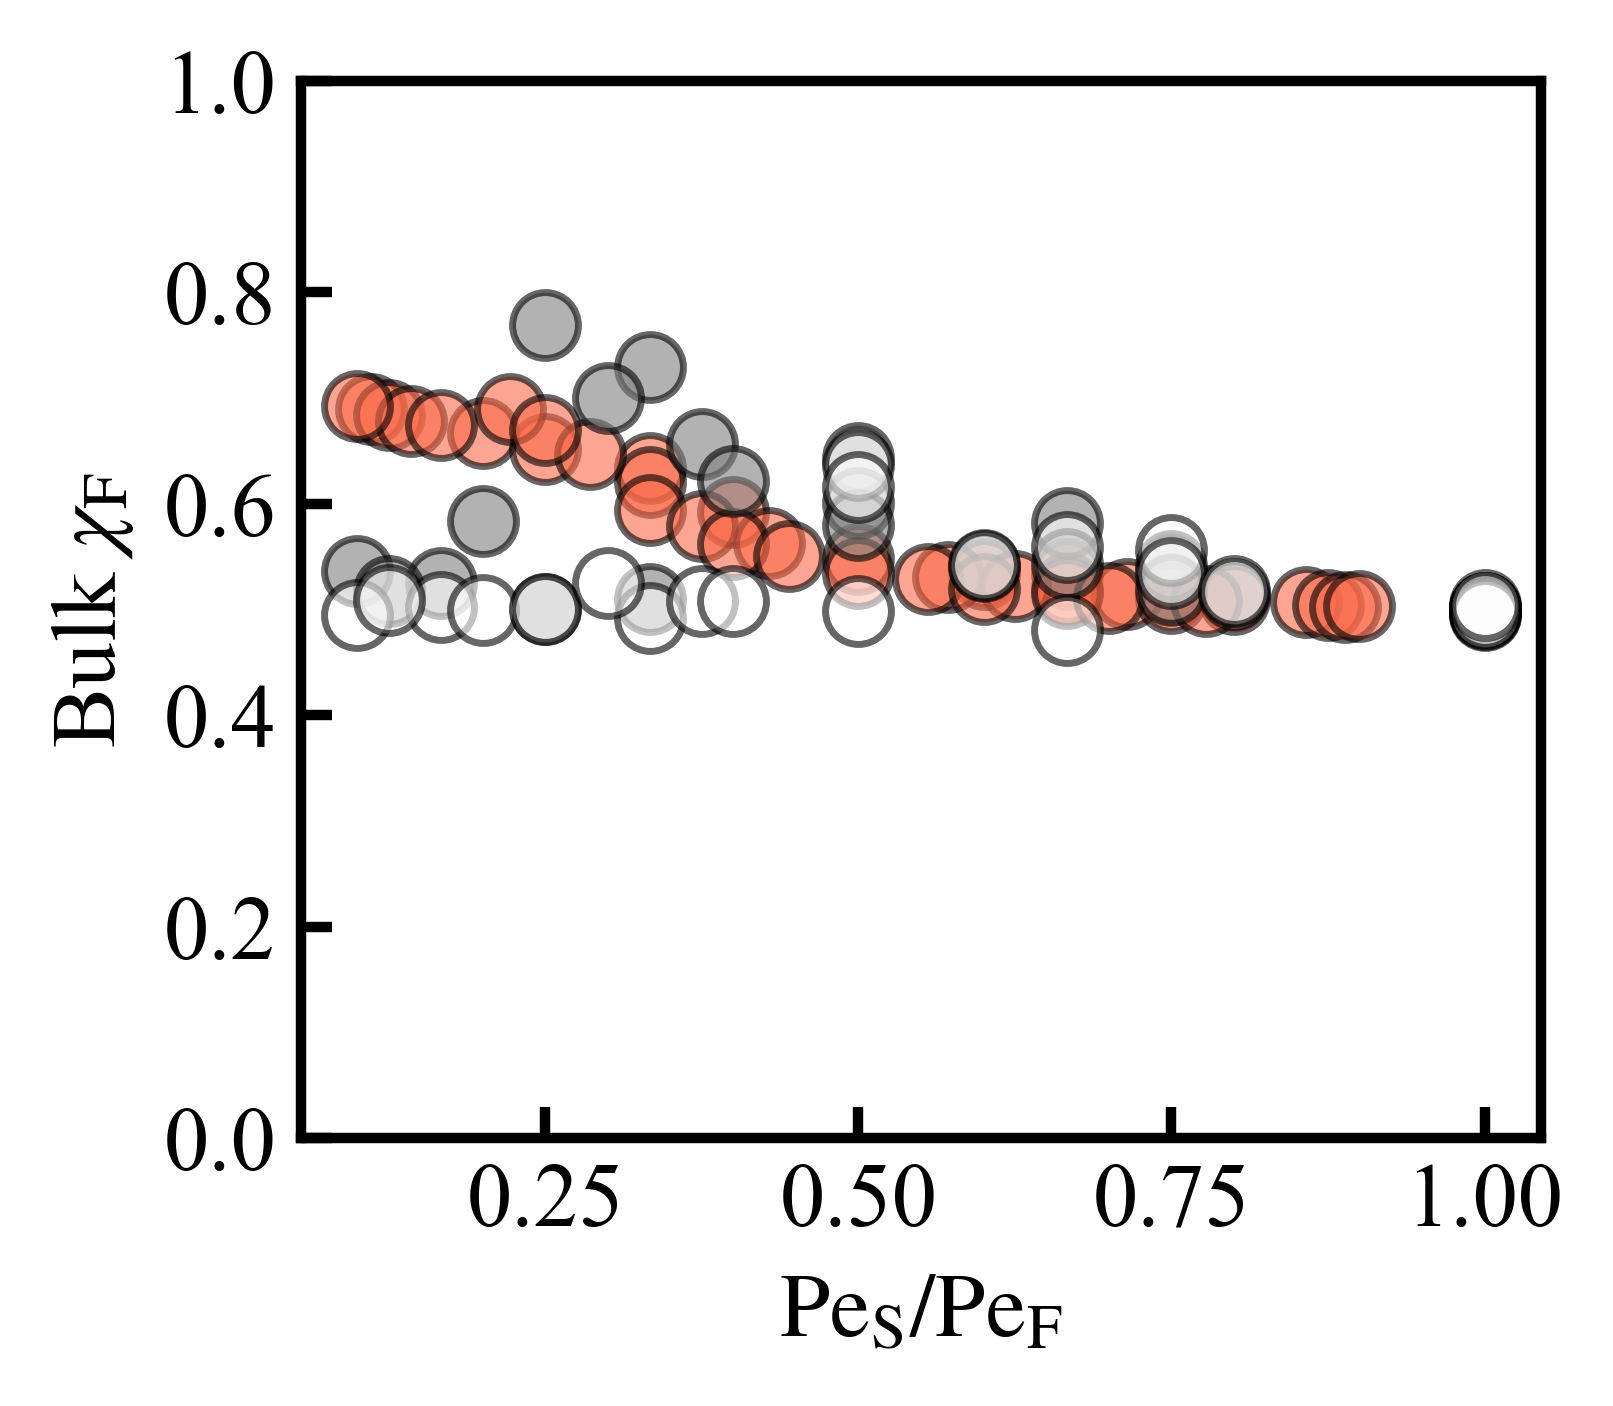

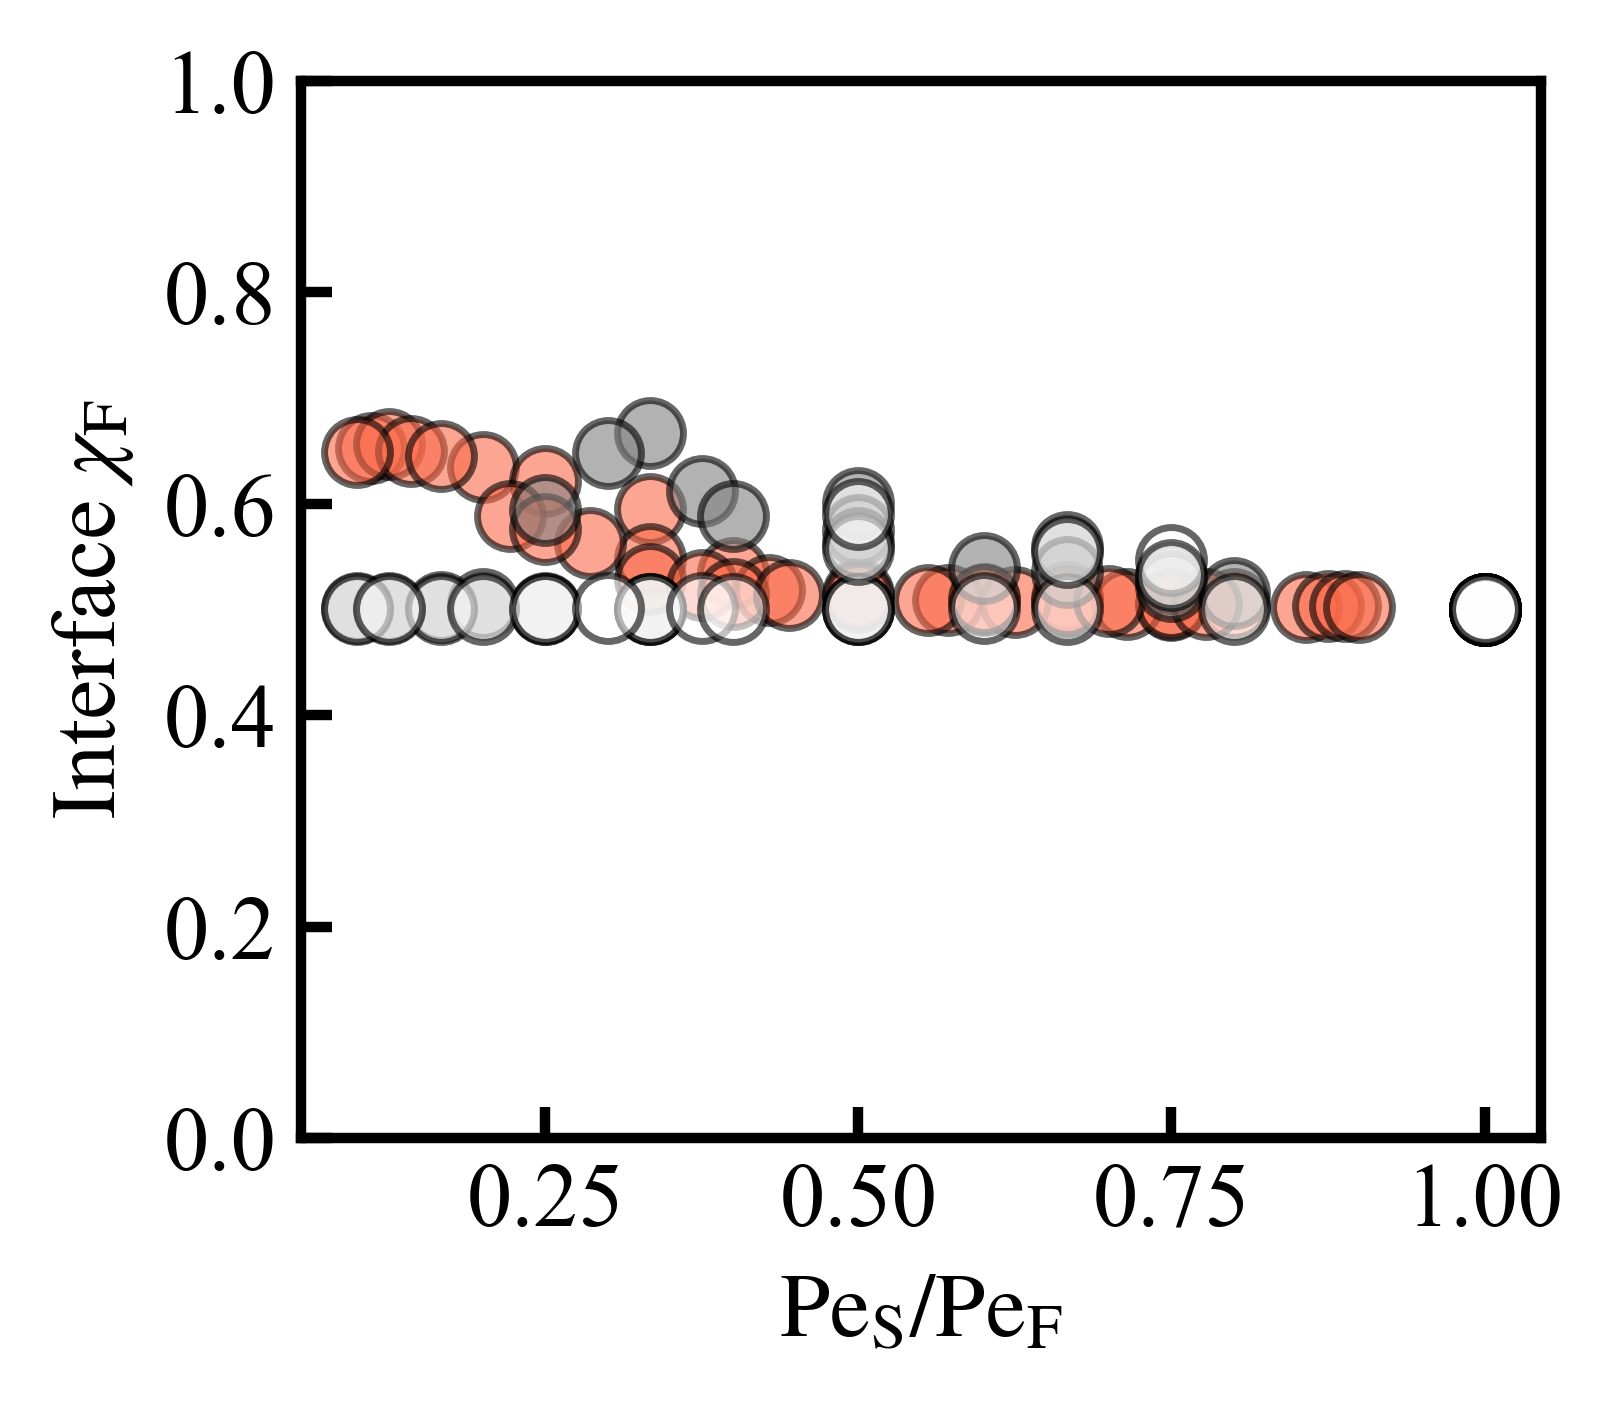

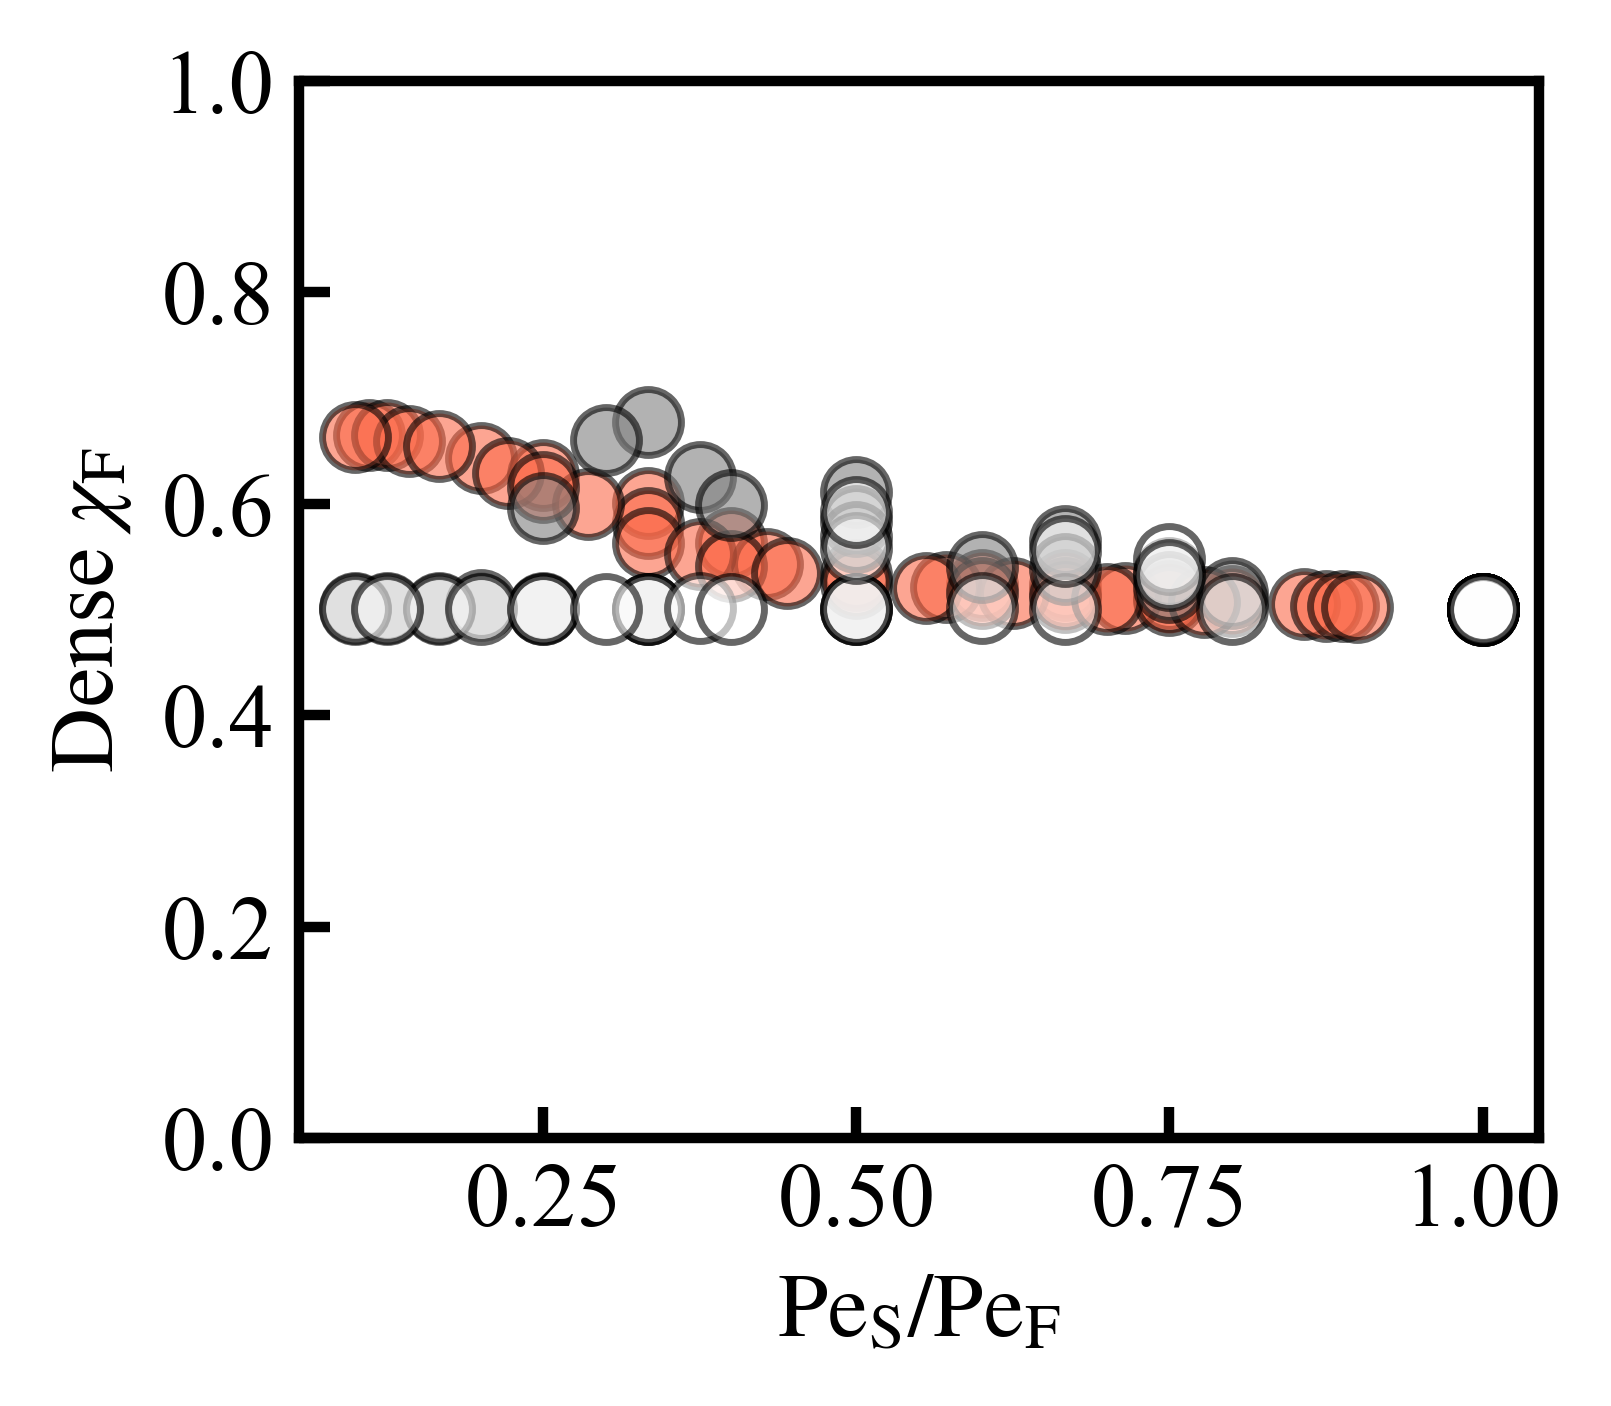

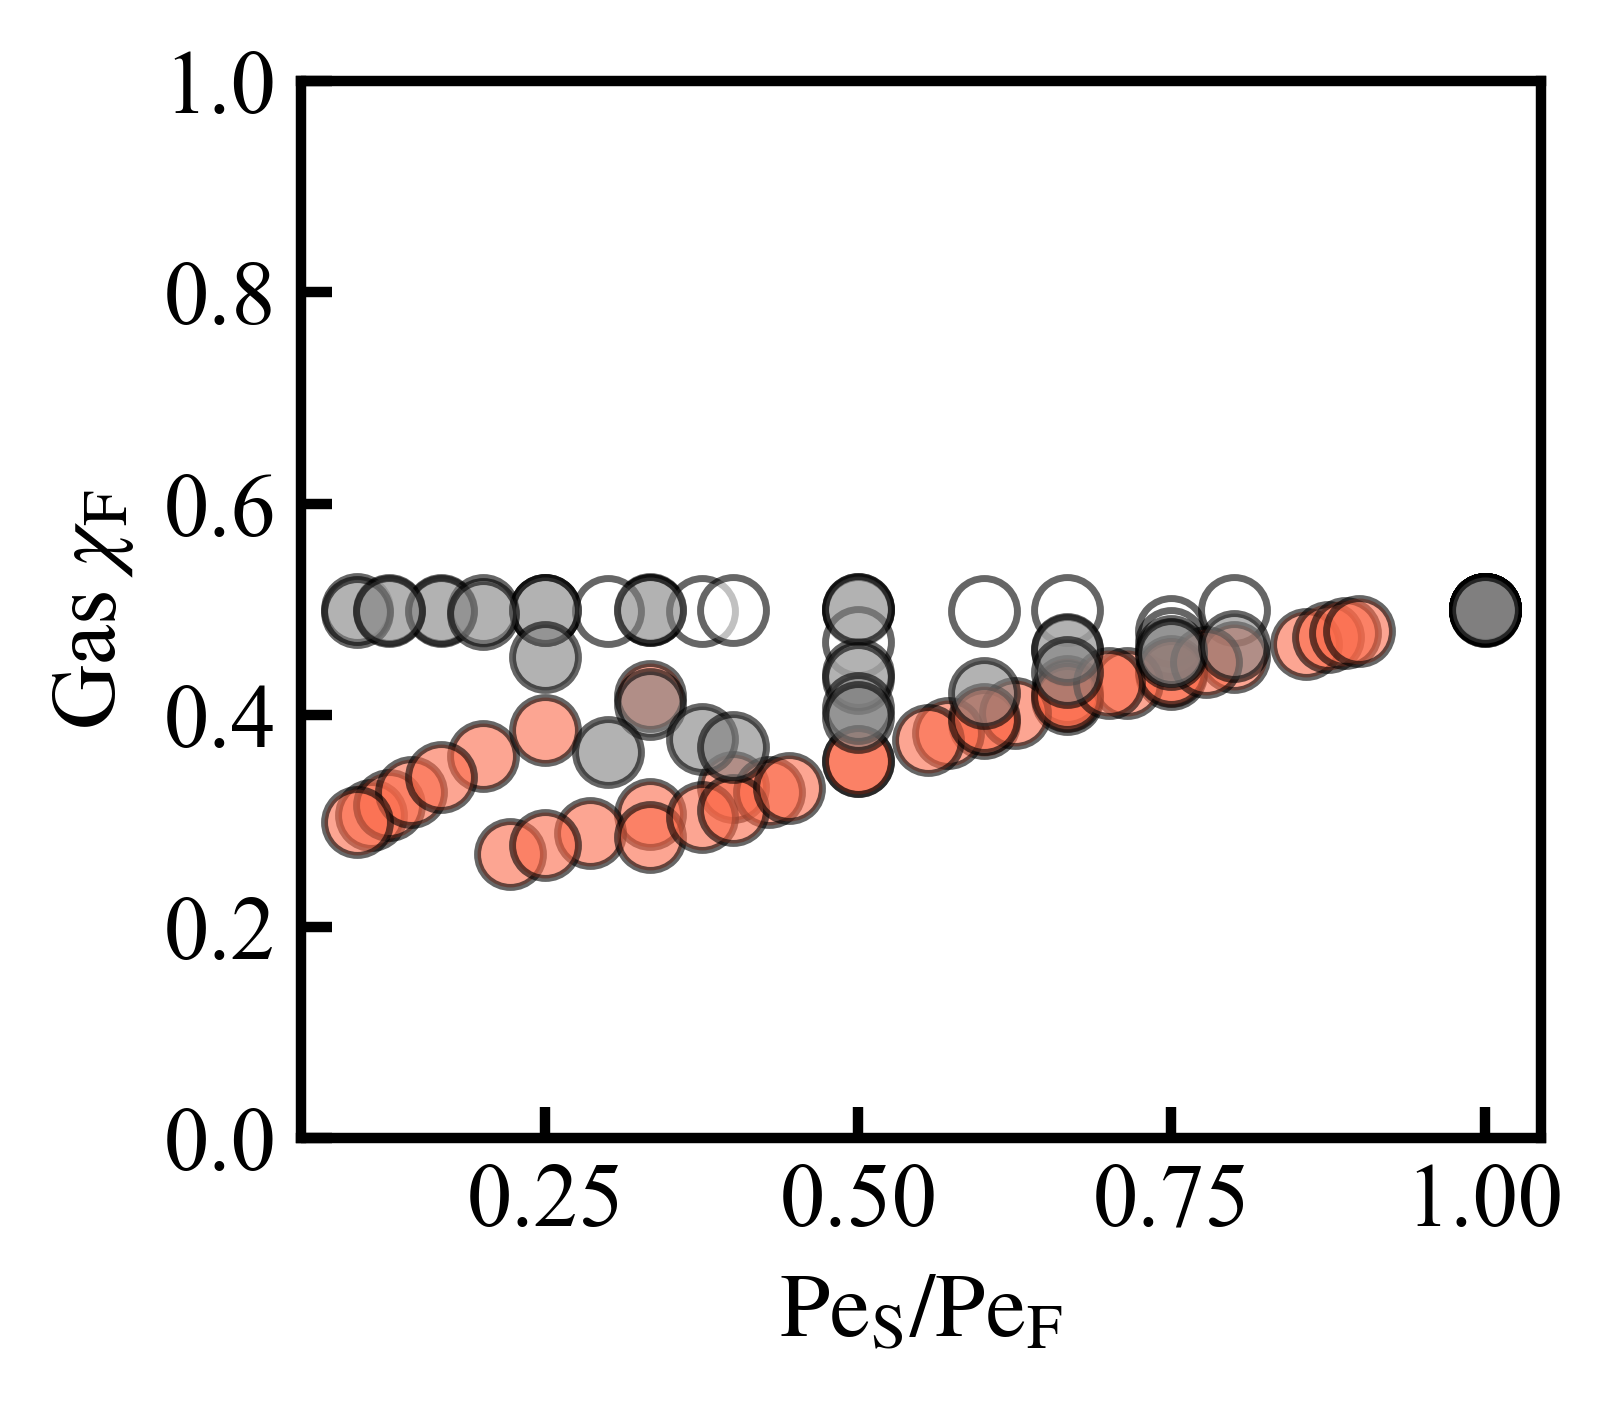

In [30]:
col0='white'
col10='#fff5f0'
col20='#fee0d2'
col30='#fcbba1'
col40='#fc9272'
col50='#fb6a4a'
col60='#ef3b2c'
col70='#cb181d'
col80='#a50f15'
col90='#67000d'
col100='gray'
#col100='#cb181d'
#col150='#a50f15'
where_0 = np.where(slow_act==0)[0]
where_10 = np.where(slow_act==10)[0]
where_20 = np.where(slow_act==20)[0]
where_30 = np.where(slow_act==30)[0]
where_40 = np.where(slow_act==40)[0]
where_50 = np.where(slow_act==50)[0]
where_60 = np.where(slow_act==60)[0]
where_70 = np.where(slow_act==70)[0]
where_80 = np.where(slow_act==80)[0]
where_90 = np.where(slow_act==90)[0]
where_100 = np.where(slow_act>=100)[0]

where50_soft_1 = np.where((slow_act>=50) & (softness==1.0))[0]
where50_soft_001 = np.where((slow_act>=50) & (softness==0.01))[0]
where50_soft_0001 = np.where((slow_act>=50) & (softness==0.001))[0]
from scipy.optimize import curve_fit

point_size = 90
point_alpha = 0.6
where_else = np.where(slow_act>=0)[0]

#plt.scatter(((slow_act[where_0]/fast_act[where_0])), mean_bulk_fast_frac[where_0], alpha=point_alpha, s=point_size,  facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((slow_act[where_10]/fast_act[where_10])), mean_bulk_fast_frac[where_10], alpha=point_alpha, s=point_size,  facecolor=col10, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((slow_act[where_20]/fast_act[where_20])), mean_bulk_fast_frac[where_20], alpha=point_alpha, s=point_size,  facecolor=col20, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((slow_act[where_30]/fast_act[where_30])), mean_bulk_fast_frac[where_30], alpha=point_alpha, s=point_size,  facecolor=col30, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((slow_act[where_40]/fast_act[where_40])), mean_bulk_fast_frac[where_40], alpha=point_alpha, s=point_size,  facecolor=col40, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')

plt.scatter(((slow_act[where50_soft_1]/fast_act[where50_soft_1])), mean_bulk_fast_frac[where50_soft_1], alpha=point_alpha, s=point_size, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where50_soft_001]/fast_act[where50_soft_001])), mean_bulk_fast_frac[where50_soft_001], alpha=point_alpha, s=point_size, facecolor=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where50_soft_0001]/fast_act[where50_soft_0001])), mean_bulk_fast_frac[where50_soft_0001], alpha=point_alpha, s=point_size, facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')


#plt.scatter(((slow_act[where_else]/fast_act[where_else])), mean_bulk_fast_frac[where_else], s=180, facecolor=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}\geq 100$')
plt.ylim([0,1.0])
plt.ylabel(r'Bulk $\chi_\mathrm{F}$')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$')
plt.show()

#plt.scatter(((slow_act[where_0]/fast_act[where_0])), mean_int_fast_frac[where_0], alpha=point_alpha, s=point_size,  facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((slow_act[where_10]/fast_act[where_10])), mean_int_fast_frac[where_10], alpha=point_alpha, s=point_size,  facecolor=col10, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((slow_act[where_20]/fast_act[where_20])), mean_int_fast_frac[where_20], alpha=point_alpha, s=point_size,  facecolor=col20, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((slow_act[where_30]/fast_act[where_30])), mean_int_fast_frac[where_30], alpha=point_alpha, s=point_size,  facecolor=col30, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((slow_act[where_40]/fast_act[where_40])), mean_int_fast_frac[where_40], alpha=point_alpha, s=point_size,  facecolor=col40, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where50_soft_1]/fast_act[where50_soft_1])), mean_int_fast_frac[where50_soft_1], alpha=point_alpha, s=point_size, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where50_soft_001]/fast_act[where50_soft_001])), mean_int_fast_frac[where50_soft_001], alpha=point_alpha, s=point_size, facecolor=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where50_soft_0001]/fast_act[where50_soft_0001])), mean_int_fast_frac[where50_soft_0001], alpha=point_alpha, s=point_size, facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')

plt.ylim([0,1.0])
plt.ylabel(r'Interface $\chi_\mathrm{F}$')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$')
plt.show()

#plt.scatter(((slow_act[where_0]/fast_act[where_0])), mean_dense_fast_frac[where_0], alpha=point_alpha, s=point_size,  facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((slow_act[where_10]/fast_act[where_10])), mean_dense_fast_frac[where_10], alpha=point_alpha, s=point_size, facecolor=col10, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((slow_act[where_20]/fast_act[where_20])), mean_dense_fast_frac[where_20], alpha=point_alpha, s=point_size,  facecolor=col20, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((slow_act[where_30]/fast_act[where_30])), mean_dense_fast_frac[where_30], alpha=point_alpha, s=point_size,  facecolor=col30, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((slow_act[where_40]/fast_act[where_40])), mean_dense_fast_frac[where_40], alpha=point_alpha, s=point_size,  facecolor=col40, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where50_soft_1]/fast_act[where50_soft_1])), mean_dense_fast_frac[where50_soft_1], alpha=point_alpha, s=point_size, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where50_soft_001]/fast_act[where50_soft_001])), mean_dense_fast_frac[where50_soft_001], alpha=point_alpha, s=point_size, facecolor=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where50_soft_0001]/fast_act[where50_soft_0001])), mean_dense_fast_frac[where50_soft_0001], alpha=point_alpha, s=point_size, facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')

plt.ylim([0,1.0])
plt.ylabel(r'Dense $\chi_\mathrm{F}$')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$')
plt.show()

#plt.scatter(((slow_act[where_0]/fast_act[where_0])), mean_gas_fast_frac[where_0], alpha=point_alpha, s=point_size,  facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((slow_act[where_10]/fast_act[where_10])), mean_gas_fast_frac[where_10], alpha=point_alpha, s=point_size,  facecolor=col10, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((slow_act[where_20]/fast_act[where_20])), mean_gas_fast_frac[where_20], alpha=point_alpha, s=point_size,  facecolor=col20, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((slow_act[where_30]/fast_act[where_30])), mean_gas_fast_frac[where_30], alpha=point_alpha, s=point_size,  facecolor=col30, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((slow_act[where_40]/fast_act[where_40])), mean_gas_fast_frac[where_40], alpha=point_alpha, s=point_size,  facecolor=col40, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where50_soft_0001]/fast_act[where50_soft_0001])), mean_gas_fast_frac[where50_soft_0001], alpha=point_alpha, s=point_size, facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where50_soft_1]/fast_act[where50_soft_1])), mean_gas_fast_frac[where50_soft_1], alpha=point_alpha, s=point_size, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where50_soft_001]/fast_act[where50_soft_001])), mean_gas_fast_frac[where50_soft_001], alpha=point_alpha, s=point_size, facecolor=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')

plt.ylim([0,1.0])
plt.ylabel(r'Gas $\chi_\mathrm{F}$')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$')
plt.show()

In [ ]:
plt.scatter(((slow_act[where_0]/fast_act[where_0])), mean_bulk_fast_frac[where_0], alpha=point_alpha, s=point_size,  facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_10]/fast_act[where_10])), mean_bulk_fast_frac[where_10], alpha=point_alpha, s=point_size,  facecolor=col10, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_20]/fast_act[where_20])), mean_bulk_fast_frac[where_20], alpha=point_alpha, s=point_size,  facecolor=col20, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_30]/fast_act[where_30])), mean_bulk_fast_frac[where_30], alpha=point_alpha, s=point_size,  facecolor=col30, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_40]/fast_act[where_40])), mean_bulk_fast_frac[where_40], alpha=point_alpha, s=point_size,  facecolor=col40, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_50]/fast_act[where_50])), mean_bulk_fast_frac[where_50], alpha=point_alpha, s=point_size, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
#plt.scatter(((slow_act[where_60]/fast_act[where_60])), mean_bulk_fast_frac[where_60], alpha=point_alpha, s=point_size, facecolor=col60, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.ylim([0,1.0])
plt.ylabel(r'Bulk $\chi_\mathrm{F}$')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$')
plt.show()

plt.scatter(((slow_act[where_0]/fast_act[where_0])), mean_int_fast_frac[where_0], alpha=point_alpha, s=point_size,  facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_10]/fast_act[where_10])), mean_int_fast_frac[where_10], alpha=point_alpha, s=point_size,  facecolor=col10, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_20]/fast_act[where_20])), mean_int_fast_frac[where_20], alpha=point_alpha, s=point_size,  facecolor=col20, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_30]/fast_act[where_30])), mean_int_fast_frac[where_30], alpha=point_alpha, s=point_size,  facecolor=col30, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_40]/fast_act[where_40])), mean_int_fast_frac[where_40], alpha=point_alpha, s=point_size,  facecolor=col40, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_50]/fast_act[where_50])), mean_int_fast_frac[where_50], alpha=point_alpha, s=point_size, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
#plt.scatter(((slow_act[where_60]/fast_act[where_60])), mean_int_fast_frac[where_60], alpha=point_alpha, s=point_size, facecolor=col60, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.ylim([0,1.0])
plt.ylabel(r'Interface $\chi_\mathrm{F}$')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$')
plt.show()

plt.scatter(((slow_act[where_0]/fast_act[where_0])), mean_dense_fast_frac[where_0], alpha=point_alpha, s=point_size,  facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_10]/fast_act[where_10])), mean_dense_fast_frac[where_10], alpha=point_alpha, s=point_size, facecolor=col10, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_20]/fast_act[where_20])), mean_dense_fast_frac[where_20], alpha=point_alpha, s=point_size,  facecolor=col20, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_30]/fast_act[where_30])), mean_dense_fast_frac[where_30], alpha=point_alpha, s=point_size,  facecolor=col30, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_40]/fast_act[where_40])), mean_dense_fast_frac[where_40], alpha=point_alpha, s=point_size,  facecolor=col40, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_50]/fast_act[where_50])), mean_dense_fast_frac[where_50], alpha=point_alpha, s=point_size, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
#plt.scatter(((slow_act[where_60]/fast_act[where_60])), mean_dense_fast_frac[where_60], alpha=point_alpha, s=point_size, facecolor=col60, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.ylim([0,1.0])
plt.ylabel(r'Dense $\chi_\mathrm{F}$')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$')
plt.show()

plt.scatter(((slow_act[where_0]/fast_act[where_0])), mean_gas_fast_frac[where_0], alpha=point_alpha, s=point_size,  facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_10]/fast_act[where_10])), mean_gas_fast_frac[where_10], alpha=point_alpha, s=point_size,  facecolor=col10, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_20]/fast_act[where_20])), mean_gas_fast_frac[where_20], alpha=point_alpha, s=point_size,  facecolor=col20, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_30]/fast_act[where_30])), mean_gas_fast_frac[where_30], alpha=point_alpha, s=point_size,  facecolor=col30, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_40]/fast_act[where_40])), mean_gas_fast_frac[where_40], alpha=point_alpha, s=point_size,  facecolor=col40, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_50]/fast_act[where_50])), mean_gas_fast_frac[where_50], alpha=point_alpha, s=point_size, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
#plt.scatter(((slow_act[where_60]/fast_act[where_60])), mean_gas_fast_frac[where_60], alpha=point_alpha, s=point_size, facecolor=col60, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.ylim([0,1.0])
plt.ylabel(r'Gas $\chi_\mathrm{F}$')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$')
plt.show()

In [ ]:
sc = plt.scatter(((slow_act/fast_act)), mean_bulk_fast_frac, s=180, c=slow_act, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.colorbar(sc)
plt.ylim([0,1.0])
plt.show()

sc = plt.scatter(((slow_act/fast_act)), mean_int_fast_frac, s=180, c=slow_act, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.colorbar(sc)
plt.ylim([0,1.0])
plt.show()

sc = plt.scatter(((slow_act/fast_act)), mean_dense_fast_frac, s=180, c=slow_act, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.colorbar(sc)
plt.ylim([0,1.0])
plt.show()

sc = plt.scatter(((slow_act/fast_act)), mean_gas_fast_frac, s=180, c=slow_act, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.colorbar(sc)
plt.ylim([0,1.0])
plt.show()

In [ ]:
plt.scatter(((fast_act[where_0])), mean_bulk_fast_frac[where_0],  alpha=point_alpha, s=point_size, facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((fast_act[where_10])), mean_bulk_fast_frac[where_10], alpha=point_alpha, s=point_size,  facecolor=col10, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((fast_act[where_20])), mean_bulk_fast_frac[where_20], alpha=point_alpha, s=point_size, facecolor=col20, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((fast_act[where_30])), mean_bulk_fast_frac[where_30], alpha=point_alpha, s=point_size, facecolor=col30, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((fast_act[where_40])), mean_bulk_fast_frac[where_40],  alpha=point_alpha, s=point_size, facecolor=col40, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((fast_act[where_50])), mean_bulk_fast_frac[where_50],  alpha=point_alpha, s=point_size, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
#plt.scatter(((fast_act[where_60])), mean_bulk_fast_frac[where_60], alpha=point_alpha, s=point_size, facecolor=col60, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((fast_act[where_70])), mean_bulk_fast_frac[where_70], s=180, facecolor=col70, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.ylim([0,1.0])
plt.show()

plt.scatter(((fast_act[where_0])), mean_int_fast_frac[where_0], alpha=point_alpha, s=point_size, facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((fast_act[where_10])), mean_int_fast_frac[where_10], alpha=point_alpha, s=point_size, facecolor=col10, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((fast_act[where_20])), mean_int_fast_frac[where_20], alpha=point_alpha, s=point_size, facecolor=col20, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((fast_act[where_30])), mean_int_fast_frac[where_30], alpha=point_alpha, s=point_size, facecolor=col30, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((fast_act[where_40])), mean_int_fast_frac[where_40], alpha=point_alpha, s=point_size, facecolor=col40, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((fast_act[where_50])), mean_int_fast_frac[where_50], alpha=point_alpha, s=point_size, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
#plt.scatter(((fast_act[where_60])), mean_int_fast_frac[where_60], alpha=point_alpha, s=point_size, facecolor=col60, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((fast_act[where_70])), mean_int_fast_frac[where_70], s=180, facecolor=col70, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.ylim([0,1.0])
plt.show()

plt.scatter(((fast_act[where_0])), mean_dense_fast_frac[where_0], alpha=point_alpha, s=point_size, facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((fast_act[where_10])), mean_dense_fast_frac[where_10], alpha=point_alpha, s=point_size, facecolor=col10, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((fast_act[where_20])), mean_dense_fast_frac[where_20], alpha=point_alpha, s=point_size, facecolor=col20, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((fast_act[where_30])), mean_dense_fast_frac[where_30], alpha=point_alpha, s=point_size, facecolor=col30, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((fast_act[where_40])), mean_dense_fast_frac[where_40], alpha=point_alpha, s=point_size, facecolor=col40, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((fast_act[where_50])), mean_dense_fast_frac[where_50], alpha=point_alpha, s=point_size, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
#plt.scatter(((fast_act[where_60])), mean_dense_fast_frac[where_60], alpha=point_alpha, s=point_size, facecolor=col60, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((fast_act[where_70])), mean_dense_fast_frac[where_70], s=180, facecolor=col70, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.ylim([0,1.0])
plt.show()

plt.scatter(((fast_act[where_0])), mean_gas_fast_frac[where_0], alpha=point_alpha, s=point_size, facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((fast_act[where_10])), mean_gas_fast_frac[where_10], alpha=point_alpha, s=point_size, facecolor=col10, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((fast_act[where_20])), mean_gas_fast_frac[where_20], alpha=point_alpha, s=point_size, facecolor=col20, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((fast_act[where_30])), mean_gas_fast_frac[where_30], alpha=point_alpha, s=point_size, facecolor=col30, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((fast_act[where_40])), mean_gas_fast_frac[where_40], alpha=point_alpha, s=point_size, facecolor=col40, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((fast_act[where_50])), mean_gas_fast_frac[where_50], alpha=point_alpha, s=point_size, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
#plt.scatter(((fast_act[where_60])), mean_gas_fast_frac[where_60], alpha=point_alpha, s=point_size, facecolor=col60, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.ylim([0,1.0])
plt.show()

In [ ]:
plt.scatter(((slow_act[where_50]+fast_act[where_50])), mean_bulk_fast_frac[where_50], s=180, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where_60]+fast_act[where_60])), mean_bulk_fast_frac[where_60], s=180, facecolor=col60, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_70]+fast_act[where_70])), mean_bulk_fast_frac[where_70], s=180, facecolor=col70, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_80]+fast_act[where_80])), mean_bulk_fast_frac[where_80], s=180, facecolor=col80, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where_90]+fast_act[where_90])), mean_bulk_fast_frac[where_90], s=180, facecolor=col90, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_100]+fast_act[where_100])), mean_bulk_fast_frac[where_100], s=180, facecolor=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')

plt.ylim([0,1.0])
plt.show()

plt.scatter(((slow_act[where_50]+fast_act[where_50])), mean_int_fast_frac[where_50], s=180, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where_60]+fast_act[where_60])), mean_int_fast_frac[where_60], s=180, facecolor=col60, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_70]+fast_act[where_70])), mean_int_fast_frac[where_70], s=180, facecolor=col70, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_80]+fast_act[where_80])), mean_int_fast_frac[where_80], s=180, facecolor=col80, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where_90]+fast_act[where_90])), mean_int_fast_frac[where_90], s=180, facecolor=col90, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_100]+fast_act[where_100])), mean_int_fast_frac[where_100], s=180, facecolor=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')

plt.ylim([0,1.0])
plt.show()

plt.scatter(((slow_act[where_50]+fast_act[where_50])), mean_dense_fast_frac[where_50], s=180, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where_60]+fast_act[where_60])), mean_dense_fast_frac[where_60], s=180, facecolor=col60, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_70]+fast_act[where_70])), mean_dense_fast_frac[where_70], s=180, facecolor=col70, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_80]+fast_act[where_80])), mean_dense_fast_frac[where_80], s=180, facecolor=col80, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where_90]+fast_act[where_90])), mean_dense_fast_frac[where_90], s=180, facecolor=col90, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_100]+fast_act[where_100])), mean_dense_fast_frac[where_100], s=180, facecolor=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')

plt.ylim([0,1.0])
plt.show()

plt.scatter(((slow_act[where_50]+fast_act[where_50])), mean_gas_fast_frac[where_50], s=180, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where_60]+fast_act[where_60])), mean_gas_fast_frac[where_60], s=180, facecolor=col60, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_70]+fast_act[where_70])), mean_gas_fast_frac[where_70], s=180, facecolor=col70, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_80]+fast_act[where_80])), mean_gas_fast_frac[where_80], s=180, facecolor=col80, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where_90]+fast_act[where_90])), mean_gas_fast_frac[where_90], s=180, facecolor=col90, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_100]+fast_act[where_100])), mean_gas_fast_frac[where_100], s=180, facecolor=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')

plt.ylim([0,1.0])
plt.show()

In [ ]:
plt.scatter(((slow_act[where_0]-fast_act[where_0])), mean_bulk_fast_frac[where_0], s=180, facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_10]-fast_act[where_10])), mean_bulk_fast_frac[where_10], s=180, facecolor=col10, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_20]-fast_act[where_20])), mean_bulk_fast_frac[where_20], s=180, facecolor=col20, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_30]-fast_act[where_30])), mean_bulk_fast_frac[where_30], s=180, facecolor=col30, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_40]-fast_act[where_40])), mean_bulk_fast_frac[where_40], s=180, facecolor=col40, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_50]-fast_act[where_50])), mean_bulk_fast_frac[where_50], s=180, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where_60]-fast_act[where_60])), mean_bulk_fast_frac[where_60], s=180, facecolor=col60, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_70]-fast_act[where_70])), mean_bulk_fast_frac[where_70], s=180, facecolor=col70, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_80]-fast_act[where_80])), mean_bulk_fast_frac[where_80], s=180, facecolor=col80, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_90]-fast_act[where_90])), mean_bulk_fast_frac[where_90], s=180, facecolor=col90, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(slow_act[where_100]-fast_act[where_100], mean_bulk_fast_frac[where_100], color=col100, label=r'$\mathrm{Pe}_\mathrm{S}=100$')
#plt.scatter(((slow_act[where_else]/fast_act[where_else])), mean_bulk_fast_frac[where_else], s=180, facecolor=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}\geq 100$')
plt.ylim([0,1.0])
plt.show()

plt.scatter(((slow_act[where_0]-fast_act[where_0])), mean_int_fast_frac[where_0], s=180, facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_10]-fast_act[where_10])), mean_int_fast_frac[where_10], s=180, facecolor=col10, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_20]-fast_act[where_20])), mean_int_fast_frac[where_20], s=180, facecolor=col20, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_30]-fast_act[where_30])), mean_int_fast_frac[where_30], s=180, facecolor=col30, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_40]-fast_act[where_40])), mean_int_fast_frac[where_40], s=180, facecolor=col40, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_50]-fast_act[where_50])), mean_int_fast_frac[where_50], s=180, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where_60]-fast_act[where_60])), mean_int_fast_frac[where_60], s=180, facecolor=col60, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_70]-fast_act[where_70])), mean_int_fast_frac[where_70], s=180, facecolor=col70, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_80]-fast_act[where_80])), mean_int_fast_frac[where_80], s=180, facecolor=col80, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_90]-fast_act[where_90])), mean_int_fast_frac[where_90], s=180, facecolor=col90, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(slow_act[where_100]-fast_act[where_100], mean_int_fast_frac[where_100], color=col100, label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.ylim([0,1.0])
plt.show()

plt.scatter(((slow_act[where_0]-fast_act[where_0])), mean_dense_fast_frac[where_0], s=180, facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_10]-fast_act[where_10])), mean_dense_fast_frac[where_10], s=180, facecolor=col10, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_20]-fast_act[where_20])), mean_dense_fast_frac[where_20], s=180, facecolor=col20, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_30]-fast_act[where_30])), mean_dense_fast_frac[where_30], s=180, facecolor=col30, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_40]-fast_act[where_40])), mean_dense_fast_frac[where_40], s=180, facecolor=col40, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_50]-fast_act[where_50])), mean_dense_fast_frac[where_50], s=180, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where_60]-fast_act[where_60])), mean_dense_fast_frac[where_60], s=180, facecolor=col60, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_70]-fast_act[where_70])), mean_dense_fast_frac[where_70], s=180, facecolor=col70, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_80]-fast_act[where_80])), mean_dense_fast_frac[where_80], s=180, facecolor=col80, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_90]-fast_act[where_90])), mean_dense_fast_frac[where_90], s=180, facecolor=col90, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(slow_act[where_100]-fast_act[where_100], mean_dense_fast_frac[where_100], color=col100, label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.ylim([0,1.0])
plt.show()

plt.scatter(((slow_act[where_0]-fast_act[where_0])), mean_gas_fast_frac[where_0], s=180, facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_10]-fast_act[where_10])), mean_gas_fast_frac[where_10], s=180, facecolor=col10, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_20]-fast_act[where_20])), mean_gas_fast_frac[where_20], s=180, facecolor=col20, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_30]-fast_act[where_30])), mean_gas_fast_frac[where_30], s=180, facecolor=col30, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_40]-fast_act[where_40])), mean_gas_fast_frac[where_40], s=180, facecolor=col40, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_50]-fast_act[where_50])), mean_gas_fast_frac[where_50], s=180, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where_60]-fast_act[where_60])), mean_gas_fast_frac[where_60], s=180, facecolor=col60, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_70]-fast_act[where_70])), mean_gas_fast_frac[where_70], s=180, facecolor=col70, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_80]-fast_act[where_80])), mean_gas_fast_frac[where_80], s=180, facecolor=col80, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_90]-fast_act[where_90])), mean_gas_fast_frac[where_90], s=180, facecolor=col90, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(slow_act[where_100]-fast_act[where_100], mean_gas_fast_frac[where_100], color=col100, label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.ylim([0,1.0])
plt.show()

In [ ]:
col0='#fcae91'
col50='#fb6a4a'
col100='#cb181d'
col150='#a50f15'
where_0 = np.where(slow_act==0)[0]

where_50 = np.where(slow_act==50)[0]
where_100 = np.where(slow_act==100)[0]
#where_100 = np.where(slow_act==100)[0]

from scipy.optimize import curve_fit


where_else = np.where(slow_act>=100)[0]

def Gauss4(x, A, B, C):
    y = A*x**(B)+C
    return y

x_span = np.linspace(0, 1, num=500)

parameters, covariance = curve_fit(Gauss4, slow_act[where_else]/fast_act[where_else], mean_gas_fast_frac[where_else])

fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
'''
parameters, covariance = curve_fit(Gauss4, slow_act[where_else]/fast_act[where_else], mean_bulk_fast_frac[where_else])

fit_A2 = parameters[0]
fit_B2 = parameters[1]
fit_C2 = parameters[2]
'''

fast_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.6,
                      markeredgecolor='black',
                      markerfacecolor=col0, 
                      label=r'$\mathrm{Pe}_\mathrm{S}=0$', markersize=20))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.6,
                      markeredgecolor='black',
                      markerfacecolor=col50, 
                      label=r'$\mathrm{Pe}_\mathrm{S}=50$', markersize=20))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.6,
                      markeredgecolor='black',
                      markerfacecolor=col100, 
                      label=r'$\mathrm{Pe}_\mathrm{S}\geq 100$', markersize=20))

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set_ylabel(r'Fast Particle Fraction ($\chi_\mathrm{F}$) of Bulk', fontsize=20)
ax1.set_xlabel(r'Activity Ratio ($\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$)', fontsize=20)
#r'$10^{{{}}}$'.format(-i)
plt.plot(x_span, fit_A*x_span**(fit_B)+fit_C, color='black', linestyle='dashed', linewidth=1.8*1.8)    

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'$\chi_\mathrm{F}=$'+str(round(fit_A,3))+r'$x^{{{}}}$'.format(round(fit_B,3)) + ' + ' + str(round(fit_C,3)) + '. if ' + r'$\mathrm{Pe}_\mathrm{S}\geq 100$', markerfacecolor='dashed', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper left',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.06, 0.17],
             fontsize=fsize*2.4, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=fast_leg, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[1.0, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(one_leg)
#((slow_act[where_else]/fast_act[where_else])**0.5)*

plt.scatter(((slow_act[where_0]/fast_act[where_0])), mean_gas_fast_frac[where_0], s=180, facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_50]/fast_act[where_50])), mean_gas_fast_frac[where_50], s=180, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where_100]/fast_act[where_100])), mean_gas_fast_frac[where_100], s=180, facecolor=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where_else]/fast_act[where_else])), mean_gas_fast_frac[where_else], s=180, facecolor=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')

#plt.scatter(slow_act[where_100]/fast_act[where_100], mean_bulk_fast_frac[where_100], color=col100, label=r'$\mathrm{Pe}_\mathrm{S}=100$')

#plt.legend(loc='upper right', fontsize=20)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)


plt.ylim([0,1.0])
plt.show()

In [ ]:
col0='#fcae91'
col50='#fb6a4a'
col100='#cb181d'
col150='#a50f15'
where_0 = np.where(slow_act==0)[0]

where_50 = np.where(slow_act==50)[0]
where_100 = np.where(slow_act==100)[0]
#where_100 = np.where(slow_act==100)[0]

from scipy.optimize import curve_fit


where_else = np.where(slow_act>100)[0]

def Gauss4(x, A, B, C):
    y = A*x**(-B)+C
    return y

x_span = np.linspace(0, 1, num=500)

parameters, covariance = curve_fit(Gauss4, slow_act[where_else]/fast_act[where_else], mean_int_fast_frac[where_else])

fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
'''
parameters, covariance = curve_fit(Gauss4, slow_act[where_else]/fast_act[where_else], mean_bulk_fast_frac[where_else])

fit_A2 = parameters[0]
fit_B2 = parameters[1]
fit_C2 = parameters[2]
'''

fast_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.6,
                      markeredgecolor='black',
                      markerfacecolor=col0, 
                      label=r'$\mathrm{Pe}_\mathrm{S}=0$', markersize=20))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.6,
                      markeredgecolor='black',
                      markerfacecolor=col50, 
                      label=r'$\mathrm{Pe}_\mathrm{S}=50$', markersize=20))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.6,
                      markeredgecolor='black',
                      markerfacecolor=col100, 
                      label=r'$\mathrm{Pe}_\mathrm{S}\geq 100$', markersize=20))

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set_ylabel(r'Fast Particle Fraction ($\chi_\mathrm{F}$) of Bulk', fontsize=20)
ax1.set_xlabel(r'Activity Ratio ($\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$)', fontsize=20)
#r'$10^{{{}}}$'.format(-i)
plt.plot(x_span, fit_A*x_span**(-fit_B)+fit_C, color='black', linestyle='dashed', linewidth=1.8*1.8)    

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'$\chi_\mathrm{F}=$'+str(round(fit_A,3))+r'$x^{{{}}}$'.format(round(-fit_B,3)) + ' + ' + str(round(fit_C,3)) + '. if ' + r'$\mathrm{Pe}_\mathrm{S}\geq 100$', markerfacecolor='dashed', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper left',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.06, 0.17],
             fontsize=fsize*2.4, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=fast_leg, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[1.0, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(one_leg)
#((slow_act[where_else]/fast_act[where_else])**0.5)*

plt.scatter(((slow_act[where_0]/fast_act[where_0])), mean_int_fast_frac[where_0], s=180, facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_50]/fast_act[where_50])), mean_int_fast_frac[where_50], s=180, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(((slow_act[where_100]/fast_act[where_100])), mean_int_fast_frac[where_100], s=180, facecolor=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')

#plt.scatter(slow_act[where_100]/fast_act[where_100], mean_bulk_fast_frac[where_100], color=col100, label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(((slow_act[where_else]/fast_act[where_else])), mean_int_fast_frac[where_else], s=180, facecolor=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}\geq 100$')

#plt.legend(loc='upper right', fontsize=20)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)


plt.ylim([0,1.0])
plt.show()

In [ ]:
col0='#fcae91'
col50='#fb6a4a'
col100='#cb181d'
col150='#a50f15'
where_0 = np.where(slow_act==0)[0]

where_50 = np.where(slow_act==50)[0]
#where_100 = np.where(slow_act==100)[0]

from scipy.optimize import curve_fit


where_else = np.where(slow_act>=100)[0]

def Gauss4(x, A, B, C):
    y = A*x**(-B)+C
    return y

x_span = np.linspace(0, 1, num=500)

parameters, covariance = curve_fit(Gauss4, slow_act[where_else]/fast_act[where_else], mean_bulk_fast_frac[where_else])

fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
'''
parameters, covariance = curve_fit(Gauss4, slow_act[where_else]/fast_act[where_else], mean_bulk_fast_frac[where_else])

fit_A2 = parameters[0]
fit_B2 = parameters[1]
fit_C2 = parameters[2]
'''

fast_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.6,
                      markeredgecolor='black',
                      markerfacecolor=col0, 
                      label=r'$\mathrm{Pe}_\mathrm{S}=0$', markersize=20))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.6,
                      markeredgecolor='black',
                      markerfacecolor=col50, 
                      label=r'$\mathrm{Pe}_\mathrm{S}=50$', markersize=20))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.6,
                      markeredgecolor='black',
                      markerfacecolor=col100, 
                      label=r'$\mathrm{Pe}_\mathrm{S}\geq 100$', markersize=20))

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set_ylabel(r'Fast Particle Fraction ($\chi_\mathrm{F}$) of Bulk', fontsize=20)
ax1.set_xlabel(r'Activity Ratio ($\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$)', fontsize=20)
#r'$10^{{{}}}$'.format(-i)
plt.plot(x_span, fit_A*x_span**(-fit_B)+fit_C, color='black', linestyle='dashed', linewidth=1.8*1.8)    

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'$\chi_\mathrm{F}=$'+str(round(fit_A,2))+r'$x^{{{}}}$'.format(round(-fit_B,2)) + ' + ' + str(round(fit_C,2)) + '. if ' + r'$\mathrm{Pe}_\mathrm{S}\geq 100$', markerfacecolor='dashed', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper left',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.06, 0.17],
             fontsize=fsize*2.4, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=fast_leg, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[1.0, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(one_leg)
#((slow_act[where_else]/fast_act[where_else])**0.5)*

plt.scatter(((slow_act[where_0]/fast_act[where_0])), mean_bulk_fast_frac[where_0], s=180, facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(((slow_act[where_50]/fast_act[where_50])), mean_bulk_fast_frac[where_50], s=180, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
#plt.scatter(slow_act[where_100]/fast_act[where_100], mean_bulk_fast_frac[where_100], color=col100, label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(((slow_act[where_else]/fast_act[where_else])), mean_bulk_fast_frac[where_else], s=180, facecolor=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}\geq 100$')

#plt.legend(loc='upper right', fontsize=20)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)


plt.ylim([0,1.0])
plt.show()


In [ ]:
col0='#fcae91'
col50='#fb6a4a'
col100='#cb181d'
col150='#a50f15'
where_0 = np.where(slow_act==0)[0]

where_50 = np.where(slow_act==50)[0]
where_100 = np.where(slow_act==100)[0]

from scipy.optimize import curve_fit


where_else = np.where(slow_act>=100)[0]

def Gauss4(x, A, B, C):
    y = A*x**(-B)+C
    return y

x_span = np.linspace(0, 1, num=500)

parameters, covariance = curve_fit(Gauss4, slow_act[where_else]/fast_act[where_else], mean_bulk_fast_frac[where_else])

fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
'''
parameters, covariance = curve_fit(Gauss4, slow_act[where_else]/fast_act[where_else], mean_bulk_fast_frac[where_else])

fit_A2 = parameters[0]
fit_B2 = parameters[1]
fit_C2 = parameters[2]
'''

fast_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.6,
                      markeredgecolor='black',
                      markerfacecolor=col0, 
                      label=r'$\mathrm{Pe}_\mathrm{S}=0$', markersize=20))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.6,
                      markeredgecolor='black',
                      markerfacecolor=col50, 
                      label=r'$\mathrm{Pe}_\mathrm{S}=50$', markersize=20))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.6,
                      markeredgecolor='black',
                      markerfacecolor=col100, 
                      label=r'$\mathrm{Pe}_\mathrm{S}\geq 100$', markersize=20))

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set_ylabel(r'Fast Particle Fraction ($\chi_\mathrm{F}$) of Bulk', fontsize=20)
ax1.set_xlabel(r'Activity Ratio ($\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$)', fontsize=20)
#r'$10^{{{}}}$'.format(-i)
plt.plot(x_span, fit_A*x_span**(-fit_B)+fit_C, color='black', linestyle='dashed', linewidth=1.8*1.8)    

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'$\chi_\mathrm{F}=$'+str(round(fit_A,4))+r'$x^{{{}}}$'.format(round(-fit_B,4)) + ' + ' + str(round(fit_C,4)) + '. if ' + r'$\mathrm{Pe}_\mathrm{S}\geq 100$', markerfacecolor='dashed', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper left',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.06, 0.17],
             fontsize=fsize*2.4, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=fast_leg, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[1.0, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(one_leg)
#((slow_act[where_else]/fast_act[where_else])**0.5)*

#plt.scatter(((slow_act[where_0])), mean_bulk_fast_frac[where_0], s=180, facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
#plt.scatter(((slow_act[where_50])), mean_bulk_fast_frac[where_50], s=180, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
#plt.scatter(((slow_act[where_100])), mean_bulk_fast_frac[where_100], color=col100, label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(((slow_act[where_else]/fast_act[where_else])), mean_bulk_fast_frac[where_else], s=180, facecolor=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}\geq 100$')

#plt.legend(loc='upper right', fontsize=20)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)


plt.ylim([0,1.0])
plt.show()

In [ ]:
col0='#fcae91'
col50='#fb6a4a'
col100='#cb181d'
col150='#a50f15'
where_0 = np.where(slow_act==0)[0]

where_50 = np.where(slow_act==50)[0]
#where_100 = np.where(slow_act==100)[0]

from scipy.optimize import curve_fit


where_else = np.where(slow_act>=100)[0]

def Gauss4(x, A, B, C):
    y = A*x**(-B)+C
    return y

x_span = np.linspace(0, 1, num=500)

parameters, covariance = curve_fit(Gauss4, slow_act[where_else]/fast_act[where_else], mean_bulk_fast_frac[where_else])

fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
'''
parameters, covariance = curve_fit(Gauss4, slow_act[where_else]/fast_act[where_else], mean_bulk_fast_frac[where_else])

fit_A2 = parameters[0]
fit_B2 = parameters[1]
fit_C2 = parameters[2]
'''

fast_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.6,
                      markeredgecolor='black',
                      markerfacecolor=col0, 
                      label=r'$\mathrm{Pe}_\mathrm{S}=0$', markersize=20))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.6,
                      markeredgecolor='black',
                      markerfacecolor=col50, 
                      label=r'$\mathrm{Pe}_\mathrm{S}=50$', markersize=20))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.6,
                      markeredgecolor='black',
                      markerfacecolor=col100, 
                      label=r'$\mathrm{Pe}_\mathrm{S}\geq 100$', markersize=20))

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set_ylabel(r'Fast Particle Fraction ($\chi_\mathrm{F}$) of Bulk', fontsize=20)
ax1.set_xlabel(r'Activity Ratio ($\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$)', fontsize=20)
#r'$10^{{{}}}$'.format(-i)
plt.plot(x_span, fit_A*x_span**(-fit_B)+fit_C, color='black', linestyle='dashed', linewidth=1.8*1.8)    

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'$\chi_\mathrm{F}=$'+str(round(fit_A,2))+r'$x^{{{}}}$'.format(round(-fit_B,2)) + ' + ' + str(round(fit_C,2)) + '. if ' + r'$\mathrm{Pe}_\mathrm{S}\geq 100$', markerfacecolor='dashed', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper left',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.06, 0.17],
             fontsize=fsize*2.4, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=fast_leg, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[1.0, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(one_leg)


plt.scatter(slow_act[where_0]/fast_act[where_0], mean_bulk_fast_frac[where_0], s=180, facecolor=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(slow_act[where_50]/fast_act[where_50], mean_bulk_fast_frac[where_50], s=180, facecolor=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
#plt.scatter(slow_act[where_100]/fast_act[where_100], mean_bulk_fast_frac[where_100], color=col100, label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(slow_act[where_else]/fast_act[where_else], mean_bulk_fast_frac[where_else], s=180, facecolor=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}\geq 100$')

#plt.legend(loc='upper right', fontsize=20)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)


plt.ylim([0,1.0])
plt.show()

fast_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=2.0,
                      markeredgecolor=col0,
                      markerfacecolor='none', 
                      label=r'$\mathrm{Pe}_\mathrm{S}=0$', markersize=20))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=2.0,
                      markeredgecolor=col50,
                      markerfacecolor='none', 
                      label=r'$\mathrm{Pe}_\mathrm{S}=50$', markersize=20))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=2.0,
                      markeredgecolor=col100,
                      markerfacecolor='none', 
                      label=r'$\mathrm{Pe}_\mathrm{S}\geq 100$', markersize=20))

fig, ax1 = plt.subplots(figsize=(8,6))
plt.ylabel(r'Fast Particle Fraction ($\chi_\mathrm{F}$) of Bulk', fontsize=20)
plt.xlabel(r'Slow Activity ($\mathrm{Pe}_\mathrm{S}$)', fontsize=20)

pos1 = plt.scatter(slow_act[where_0], mean_bulk_fast_frac[where_0], linewidth=2.0, c=fast_act[where_0], s=180, cmap='viridis', edgecolor=col0, label=r'$\mathrm{Pe}_\mathrm{S}=0$')
pos2 = plt.scatter(slow_act[where_50], mean_bulk_fast_frac[where_50], linewidth=2.0, c=fast_act[where_50], s=180, cmap='viridis', edgecolor=col50, label=r'$\mathrm{Pe}_\mathrm{S}=50$')
#plt.scatter(slow_act[where_100], mean_bulk_fast_frac[where_100], color=col100, label=r'$\mathrm{Pe}_\mathrm{S}=100$')
pos3 = plt.scatter(slow_act[where_else], mean_bulk_fast_frac[where_else], linewidth=2.0, c=fast_act[where_else], s=180, cmap='viridis', edgecolor=col100, label=r'$\mathrm{Pe}_\mathrm{S}\geq 100$')

clb = fig.colorbar(pos3, ax=ax1)
clb.set_label('Fast Activity ($\mathrm{Pe}_\mathrm{F}$)', rotation=270, fontsize=18, labelpad=20)
one_leg = ax1.legend(handles=fast_leg, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[1.0, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)

ax1.add_artist(one_leg)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.ylim([0,1.0])
plt.show()


plt.figure(figsize=(8,6))
plt.ylabel(r'Fast Particle Fraction ($\chi_\mathrm{F}$) of Bulk', fontsize=20)
plt.xlabel(r'Fast Activity ($\mathrm{Pe}_\mathrm{F}$)', fontsize=20)

plt.scatter(fast_act[where_0], mean_bulk_fast_frac[where_0], s=100, color=col0, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(fast_act[where_50], mean_bulk_fast_frac[where_50], s=100, color=col50, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
#plt.scatter(slow_act[where_100]/fast_act[where_100], mean_bulk_fast_frac[where_100], color=col100, label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(fast_act[where_else], mean_bulk_fast_frac[where_else], s=100, color=col100, edgecolor='black', label=r'$\mathrm{Pe}_\mathrm{S}\geq 100$')

plt.legend(loc='lower left', fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(fast_act[where_else]-slow_act[where_else], mean_gas_fast_frac[where_else], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}>50$')
plt.scatter(fast_act[where_50]-slow_act[where_50], mean_gas_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.legend(loc='lower right', fontsize=12)
plt.ylabel(r'Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Dif}$')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(fast_act[where_else], mean_gas_fast_frac[where_else], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}>50$')
plt.scatter(fast_act[where_50], mean_gas_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.ylabel(r'Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{F}$')
plt.legend(loc='lower right', fontsize=12)
plt.show()

In [ ]:
where_50 = np.where(slow_act==50)[0]
where_0 = np.where(slow_act==0)[0]
where_100 = np.where(slow_act==100)[0]
where_150 = np.where(slow_act==150)[0]
where_250 = np.where(slow_act==250)[0]
where_200 = np.where(slow_act==200)[0]
where_300 = np.where(slow_act==300)[0]
where_350 = np.where(slow_act==350)[0]
where_450 = np.where(slow_act==450)[0]
where_400 = np.where(slow_act==400)[0]
where_500 = np.where(slow_act==500)[0]
#where_else = np.where(slow_act>50)[0]

plt.figure(figsize=(8,6))
plt.ylabel(r'Gas Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Ratio}$')

plt.scatter(slow_act[where_0]/fast_act[where_0], mean_gas_fast_frac[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(slow_act[where_50]/fast_act[where_50], mean_gas_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(slow_act[where_100]/fast_act[where_100], mean_gas_fast_frac[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(slow_act[where_150]/fast_act[where_150], mean_gas_fast_frac[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(slow_act[where_200]/fast_act[where_200], mean_gas_fast_frac[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(slow_act[where_250]/fast_act[where_250], mean_gas_fast_frac[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(slow_act[where_300]/fast_act[where_300], mean_gas_fast_frac[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(slow_act[where_350]/fast_act[where_350], mean_gas_fast_frac[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(slow_act[where_400]/fast_act[where_400], mean_gas_fast_frac[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(slow_act[where_450]/fast_act[where_450], mean_gas_fast_frac[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(slow_act[where_500]/fast_act[where_500], mean_gas_fast_frac[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.legend(loc='lower right', fontsize=12)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(fast_act[where_0], mean_gas_fast_frac[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(fast_act[where_50], mean_gas_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(fast_act[where_100], mean_gas_fast_frac[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(fast_act[where_150], mean_gas_fast_frac[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(fast_act[where_200], mean_gas_fast_frac[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(fast_act[where_250], mean_gas_fast_frac[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(fast_act[where_300], mean_gas_fast_frac[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(fast_act[where_350], mean_gas_fast_frac[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(fast_act[where_400], mean_gas_fast_frac[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(fast_act[where_450], mean_gas_fast_frac[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(fast_act[where_500], mean_gas_fast_frac[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.legend(loc='lower right', fontsize=12)
plt.ylabel(r'Gas Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{F}$')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(slow_act[where_0], mean_gas_fast_frac[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(slow_act[where_50], mean_gas_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(slow_act[where_100], mean_gas_fast_frac[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(slow_act[where_150], mean_gas_fast_frac[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(slow_act[where_200], mean_gas_fast_frac[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(slow_act[where_250], mean_gas_fast_frac[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(slow_act[where_300], mean_gas_fast_frac[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(slow_act[where_350], mean_gas_fast_frac[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(slow_act[where_400], mean_gas_fast_frac[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(slow_act[where_450], mean_gas_fast_frac[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(slow_act[where_500], mean_gas_fast_frac[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.legend(loc='lower right', fontsize=12)
plt.ylabel(r'Gas Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{S}$')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(fast_act[where_0]-slow_act[where_0], mean_gas_fast_frac[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(fast_act[where_50]-slow_act[where_50], mean_gas_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(fast_act[where_100]-slow_act[where_100], mean_gas_fast_frac[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(fast_act[where_150]-slow_act[where_150], mean_gas_fast_frac[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(fast_act[where_200]-slow_act[where_200], mean_gas_fast_frac[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(fast_act[where_250]-slow_act[where_250], mean_gas_fast_frac[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(fast_act[where_300]-slow_act[where_300], mean_gas_fast_frac[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(fast_act[where_350]-slow_act[where_350], mean_gas_fast_frac[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(fast_act[where_400]-slow_act[where_400], mean_gas_fast_frac[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(fast_act[where_450]-slow_act[where_450], mean_gas_fast_frac[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(fast_act[where_500]-slow_act[where_500], mean_gas_fast_frac[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.ylabel(r'Gas Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Dif}$')
plt.legend(loc='lower right', fontsize=12)
plt.show()

In [ ]:
where_0 = np.where(slow_act>100)[0]

from scipy.optimize import curve_fit

#where_else = np.where(slow_act>50)[0]

def Gauss4(x, A, B, C, D):
    y = A/(1+np.exp(B*(x-C)))+D
    return y

def Gauss5(x, A, B,C):
    y = A*np.log10(x+B)+C
    return y

x_span = np.linspace(0, 1, num=500)

parameters, covariance = curve_fit(Gauss4, slow_act[where_0]/fast_act[where_0], mean_gas_fast_frac[where_0])

fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fit_D = parameters[3]

parameters, covariance = curve_fit(Gauss4, slow_act[where_0]/fast_act[where_0], mean_gas_fast_frac[where_0])

fit_A2 = parameters[0]
fit_B2 = parameters[1]
fit_C2 = parameters[2]

plt.figure(figsize=(8,6))
plt.ylabel(r'Gas Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Ratio}$')
plt.plot(x_span, fit_A /(1+np.exp(fit_B*(x_span-fit_C)))+ fit_D, color=fastCol, linewidth=1.8*1.8, label=r'$\chi_\mathrm{F}=$'+str(round(fit_A,3))+r'$/(1+exp[$' + str(round(fit_B,3))+r'$(\mathrm{Pe}_\mathrm{Net}^\mathrm{i}-$' +str(round(fit_C,3)) + r'$)])$'+ str(round(fit_D,3)))      
#plt.plot(x_span, fit_A2 * np.log10(x_span+fit_B2)+ fit_C2, color=slowCol, linewidth=1.8*1.8, label=r'$\chi_\mathrm{F}=$'+str(round(fit_A,3))+r'$/(1+exp[$' + str(round(fit_B,3))+r'$(\mathrm{Pe}_\mathrm{Net}^\mathrm{i}-$' +str(round(fit_C,3)) + r'$)])$'+ str(round(fit_D,3)))      

plt.scatter(slow_act[where_0]/fast_act[where_0], mean_gas_fast_frac[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}>100$')
plt.legend(loc='lower right', fontsize=12)
plt.show()



In [ ]:
where_50 = np.where(slow_act==50)[0]
where_0 = np.where(slow_act==0)[0]
where_100 = np.where(slow_act==100)[0]
where_150 = np.where(slow_act==150)[0]
where_250 = np.where(slow_act==250)[0]
where_200 = np.where(slow_act==200)[0]
where_300 = np.where(slow_act==300)[0]
where_350 = np.where(slow_act==350)[0]
where_450 = np.where(slow_act==450)[0]
where_400 = np.where(slow_act==400)[0]
where_500 = np.where(slow_act==500)[0]
#where_else = np.where(slow_act>50)[0]

plt.figure(figsize=(8,6))
plt.ylabel(r'Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Ratio}$')

plt.scatter(slow_act[where_0]/fast_act[where_0], avg_gas_nB[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(slow_act[where_50]/fast_act[where_50], avg_gas_nB[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(slow_act[where_100]/fast_act[where_100], avg_gas_nB[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(slow_act[where_150]/fast_act[where_150], avg_gas_nB[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(slow_act[where_200]/fast_act[where_200], avg_gas_nB[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(slow_act[where_250]/fast_act[where_250], avg_gas_nB[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(slow_act[where_300]/fast_act[where_300], avg_gas_nB[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(slow_act[where_350]/fast_act[where_350], avg_gas_nB[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(slow_act[where_400]/fast_act[where_400], avg_gas_nB[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(slow_act[where_450]/fast_act[where_450], avg_gas_nB[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(slow_act[where_500]/fast_act[where_500], avg_gas_nB[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.legend(loc='lower right', fontsize=12)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(fast_act[where_0], avg_gas_nB[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(fast_act[where_50], avg_gas_nB[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(fast_act[where_100], avg_gas_nB[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(fast_act[where_150], avg_gas_nB[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(fast_act[where_200], avg_gas_nB[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(fast_act[where_250], avg_gas_nB[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(fast_act[where_300], avg_gas_nB[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(fast_act[where_350], avg_gas_nB[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(fast_act[where_400], avg_gas_nB[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(fast_act[where_450], avg_gas_nB[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(fast_act[where_500], avg_gas_nB[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.legend(loc='lower right', fontsize=12)
plt.ylabel(r'Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{F}$')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(slow_act[where_0], avg_gas_nB[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(slow_act[where_50], avg_gas_nB[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(slow_act[where_100], avg_gas_nB[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(slow_act[where_150], avg_gas_nB[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(slow_act[where_200], avg_gas_nB[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(slow_act[where_250], avg_gas_nB[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(slow_act[where_300], avg_gas_nB[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(slow_act[where_350], avg_gas_nB[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(slow_act[where_400], avg_gas_nB[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(slow_act[where_450], avg_gas_nB[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(slow_act[where_500], avg_gas_nB[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.legend(loc='lower right', fontsize=12)
plt.ylabel(r'Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{S}$')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(fast_act[where_0]-slow_act[where_0], avg_gas_nB[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(fast_act[where_50]-slow_act[where_50], avg_gas_nB[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(fast_act[where_100]-slow_act[where_100], avg_gas_nB[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(fast_act[where_150]-slow_act[where_150], avg_gas_nB[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(fast_act[where_200]-slow_act[where_200], avg_gas_nB[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(fast_act[where_250]-slow_act[where_250], avg_gas_nB[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(fast_act[where_300]-slow_act[where_300], avg_gas_nB[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(fast_act[where_350]-slow_act[where_350], avg_gas_nB[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(fast_act[where_400]-slow_act[where_400], avg_gas_nB[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(fast_act[where_450]-slow_act[where_450], avg_gas_nB[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(fast_act[where_500]-slow_act[where_500], avg_gas_nB[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.ylabel(r'Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Dif}$')
plt.legend(loc='lower right', fontsize=12)
plt.show()

In [ ]:
where_50 = np.where(slow_act==50)[0]
where_0 = np.where(slow_act==0)[0]
where_100 = np.where(slow_act==100)[0]
where_150 = np.where(slow_act==150)[0]
where_250 = np.where(slow_act==250)[0]
where_200 = np.where(slow_act==200)[0]
where_300 = np.where(slow_act==300)[0]
where_350 = np.where(slow_act==350)[0]
where_450 = np.where(slow_act==450)[0]
where_400 = np.where(slow_act==400)[0]
where_500 = np.where(slow_act==500)[0]
#where_else = np.where(slow_act>50)[0]

plt.figure(figsize=(8,6))
plt.ylabel(r'Dense Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Ratio}$')

plt.scatter(slow_act[where_0]/fast_act[where_0], mean_dense_fast_frac[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(slow_act[where_50]/fast_act[where_50], mean_dense_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(slow_act[where_100]/fast_act[where_100], mean_dense_fast_frac[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(slow_act[where_150]/fast_act[where_150], mean_dense_fast_frac[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(slow_act[where_200]/fast_act[where_200], mean_dense_fast_frac[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(slow_act[where_250]/fast_act[where_250], mean_dense_fast_frac[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(slow_act[where_300]/fast_act[where_300], mean_dense_fast_frac[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(slow_act[where_350]/fast_act[where_350], mean_dense_fast_frac[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(slow_act[where_400]/fast_act[where_400], mean_dense_fast_frac[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(slow_act[where_450]/fast_act[where_450], mean_dense_fast_frac[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(slow_act[where_500]/fast_act[where_500], mean_dense_fast_frac[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.legend(loc='lower right', fontsize=12)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(fast_act[where_0], mean_dense_fast_frac[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(fast_act[where_50], mean_dense_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(fast_act[where_100], mean_dense_fast_frac[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(fast_act[where_150], mean_dense_fast_frac[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(fast_act[where_200], mean_dense_fast_frac[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(fast_act[where_250], mean_dense_fast_frac[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(fast_act[where_300], mean_dense_fast_frac[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(fast_act[where_350], mean_dense_fast_frac[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(fast_act[where_400], mean_dense_fast_frac[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(fast_act[where_450], mean_dense_fast_frac[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(fast_act[where_500], mean_dense_fast_frac[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.legend(loc='lower right', fontsize=12)
plt.ylabel(r'Dense Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{F}$')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(slow_act[where_0], mean_dense_fast_frac[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(slow_act[where_50], mean_dense_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(slow_act[where_100], mean_dense_fast_frac[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(slow_act[where_150], mean_dense_fast_frac[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(slow_act[where_200], mean_dense_fast_frac[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(slow_act[where_250], mean_dense_fast_frac[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(slow_act[where_300], mean_dense_fast_frac[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(slow_act[where_350], mean_dense_fast_frac[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(slow_act[where_400], mean_dense_fast_frac[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(slow_act[where_450], mean_dense_fast_frac[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(slow_act[where_500], mean_dense_fast_frac[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.legend(loc='lower right', fontsize=12)
plt.ylabel(r'Dense Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{S}$')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(fast_act[where_0]-slow_act[where_0], mean_dense_fast_frac[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(fast_act[where_50]-slow_act[where_50], mean_dense_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(fast_act[where_100]-slow_act[where_100], mean_dense_fast_frac[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(fast_act[where_150]-slow_act[where_150], mean_dense_fast_frac[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(fast_act[where_200]-slow_act[where_200], mean_dense_fast_frac[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(fast_act[where_250]-slow_act[where_250], mean_dense_fast_frac[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(fast_act[where_300]-slow_act[where_300], mean_dense_fast_frac[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(fast_act[where_350]-slow_act[where_350], mean_dense_fast_frac[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(fast_act[where_400]-slow_act[where_400], mean_dense_fast_frac[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(fast_act[where_450]-slow_act[where_450], mean_dense_fast_frac[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(fast_act[where_500]-slow_act[where_500], mean_dense_fast_frac[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.ylabel(r'Dense Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Dif}$')
plt.legend(loc='lower right', fontsize=12)
plt.show()

In [ ]:
where_50 = np.where(slow_act==50)[0]
where_0 = np.where(slow_act==0)[0]
where_100 = np.where(slow_act==100)[0]
where_150 = np.where(slow_act==150)[0]
where_250 = np.where(slow_act==250)[0]
where_200 = np.where(slow_act==200)[0]
where_300 = np.where(slow_act==300)[0]
where_350 = np.where(slow_act==350)[0]
where_450 = np.where(slow_act==450)[0]
where_400 = np.where(slow_act==400)[0]
where_500 = np.where(slow_act==500)[0]
#where_else = np.where(slow_act>50)[0]

plt.figure(figsize=(8,6))
plt.ylabel(r'Interface Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Ratio}$')

plt.scatter(slow_act[where_0]/fast_act[where_0], mean_int_fast_frac[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(slow_act[where_50]/fast_act[where_50], mean_int_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(slow_act[where_100]/fast_act[where_100], mean_int_fast_frac[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(slow_act[where_150]/fast_act[where_150], mean_int_fast_frac[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(slow_act[where_200]/fast_act[where_200], mean_int_fast_frac[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(slow_act[where_250]/fast_act[where_250], mean_int_fast_frac[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(slow_act[where_300]/fast_act[where_300], mean_int_fast_frac[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(slow_act[where_350]/fast_act[where_350], mean_int_fast_frac[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(slow_act[where_400]/fast_act[where_400], mean_int_fast_frac[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(slow_act[where_450]/fast_act[where_450], mean_int_fast_frac[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(slow_act[where_500]/fast_act[where_500], mean_int_fast_frac[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.legend(loc='lower right', fontsize=12)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(fast_act[where_0], mean_int_fast_frac[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(fast_act[where_50], mean_int_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(fast_act[where_100], mean_int_fast_frac[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(fast_act[where_150], mean_int_fast_frac[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(fast_act[where_200], mean_int_fast_frac[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(fast_act[where_250], mean_int_fast_frac[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(fast_act[where_300], mean_int_fast_frac[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(fast_act[where_350], mean_int_fast_frac[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(fast_act[where_400], mean_int_fast_frac[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(fast_act[where_450], mean_int_fast_frac[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(fast_act[where_500], mean_int_fast_frac[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.legend(loc='lower right', fontsize=12)
plt.ylabel(r'Interface Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{F}$')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(slow_act[where_0], mean_int_fast_frac[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(slow_act[where_50], mean_int_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(slow_act[where_100], mean_int_fast_frac[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(slow_act[where_150], mean_int_fast_frac[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(slow_act[where_200], mean_int_fast_frac[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(slow_act[where_250], mean_int_fast_frac[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(slow_act[where_300], mean_int_fast_frac[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(slow_act[where_350], mean_int_fast_frac[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(slow_act[where_400], mean_int_fast_frac[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(slow_act[where_450], mean_int_fast_frac[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(slow_act[where_500], mean_int_fast_frac[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.legend(loc='lower right', fontsize=12)
plt.ylabel(r'Interface Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{S}$')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(fast_act[where_0]-slow_act[where_0], mean_int_fast_frac[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(fast_act[where_50]-slow_act[where_50], mean_int_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(fast_act[where_100]-slow_act[where_100], mean_int_fast_frac[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(fast_act[where_150]-slow_act[where_150], mean_int_fast_frac[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(fast_act[where_200]-slow_act[where_200], mean_int_fast_frac[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(fast_act[where_250]-slow_act[where_250], mean_int_fast_frac[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(fast_act[where_300]-slow_act[where_300], mean_int_fast_frac[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(fast_act[where_350]-slow_act[where_350], mean_int_fast_frac[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(fast_act[where_400]-slow_act[where_400], mean_int_fast_frac[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(fast_act[where_450]-slow_act[where_450], mean_int_fast_frac[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(fast_act[where_500]-slow_act[where_500], mean_int_fast_frac[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.ylabel(r'Interface Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Dif}$')
plt.legend(loc='lower right', fontsize=12)
plt.show()

In [ ]:
where_50 = np.where(slow_act==50)[0]
where_0 = np.where(slow_act==0)[0]
where_100 = np.where(slow_act==100)[0]
where_150 = np.where(slow_act==150)[0]
where_250 = np.where(slow_act==250)[0]
where_200 = np.where(slow_act==200)[0]
where_300 = np.where(slow_act==300)[0]
where_350 = np.where(slow_act==350)[0]
where_450 = np.where(slow_act==450)[0]
where_400 = np.where(slow_act==400)[0]
where_500 = np.where(slow_act==500)[0]
#where_else = np.where(slow_act>50)[0]

plt.figure(figsize=(8,6))
plt.ylabel(r'Bulk Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Ratio}$')

plt.scatter(slow_act[where_0]/fast_act[where_0], mean_bulk_fast_frac[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(slow_act[where_50]/fast_act[where_50], mean_bulk_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(slow_act[where_100]/fast_act[where_100], mean_bulk_fast_frac[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(slow_act[where_150]/fast_act[where_150], mean_bulk_fast_frac[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(slow_act[where_200]/fast_act[where_200], mean_bulk_fast_frac[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(slow_act[where_250]/fast_act[where_250], mean_bulk_fast_frac[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(slow_act[where_300]/fast_act[where_300], mean_bulk_fast_frac[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(slow_act[where_350]/fast_act[where_350], mean_bulk_fast_frac[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(slow_act[where_400]/fast_act[where_400], mean_bulk_fast_frac[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(slow_act[where_450]/fast_act[where_450], mean_bulk_fast_frac[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(slow_act[where_500]/fast_act[where_500], mean_bulk_fast_frac[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.legend(loc='lower right', fontsize=12)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(fast_act[where_0], mean_bulk_fast_frac[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(fast_act[where_50], mean_bulk_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(fast_act[where_100], mean_bulk_fast_frac[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(fast_act[where_150], mean_bulk_fast_frac[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(fast_act[where_200], mean_bulk_fast_frac[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(fast_act[where_250], mean_bulk_fast_frac[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(fast_act[where_300], mean_bulk_fast_frac[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(fast_act[where_350], mean_bulk_fast_frac[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(fast_act[where_400], mean_bulk_fast_frac[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(fast_act[where_450], mean_bulk_fast_frac[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(fast_act[where_500], mean_bulk_fast_frac[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.legend(loc='lower right', fontsize=12)
plt.ylabel(r'Bulk Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{F}$')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(slow_act[where_0], mean_bulk_fast_frac[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(slow_act[where_50], mean_bulk_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(slow_act[where_100], mean_bulk_fast_frac[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(slow_act[where_150], mean_bulk_fast_frac[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(slow_act[where_200], mean_bulk_fast_frac[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(slow_act[where_250], mean_bulk_fast_frac[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(slow_act[where_300], mean_bulk_fast_frac[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(slow_act[where_350], mean_bulk_fast_frac[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(slow_act[where_400], mean_bulk_fast_frac[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(slow_act[where_450], mean_bulk_fast_frac[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(slow_act[where_500], mean_bulk_fast_frac[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.legend(loc='lower right', fontsize=12)
plt.ylabel(r'Bulk Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{S}$')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(fast_act[where_0]-slow_act[where_0], mean_bulk_fast_frac[where_0], color='green', label=r'$\mathrm{Pe}_\mathrm{S}=0$')
plt.scatter(fast_act[where_50]-slow_act[where_50], mean_bulk_fast_frac[where_50], color='red', label=r'$\mathrm{Pe}_\mathrm{S}=50$')
plt.scatter(fast_act[where_100]-slow_act[where_100], mean_bulk_fast_frac[where_100], color='yellow', label=r'$\mathrm{Pe}_\mathrm{S}=100$')
plt.scatter(fast_act[where_150]-slow_act[where_150], mean_bulk_fast_frac[where_150], color='blue', label=r'$\mathrm{Pe}_\mathrm{S}=150$')
plt.scatter(fast_act[where_200]-slow_act[where_200], mean_bulk_fast_frac[where_200], color='orange', label=r'$\mathrm{Pe}_\mathrm{S}=200$')
plt.scatter(fast_act[where_250]-slow_act[where_250], mean_bulk_fast_frac[where_250], color='purple', label=r'$\mathrm{Pe}_\mathrm{S}=250$')
plt.scatter(fast_act[where_300]-slow_act[where_300], mean_bulk_fast_frac[where_300], color='teal', label=r'$\mathrm{Pe}_\mathrm{S}=300$')
plt.scatter(fast_act[where_350]-slow_act[where_350], mean_bulk_fast_frac[where_350], color='black', label=r'$\mathrm{Pe}_\mathrm{S}=350$')
plt.scatter(fast_act[where_400]-slow_act[where_400], mean_bulk_fast_frac[where_400], color='gray', label=r'$\mathrm{Pe}_\mathrm{S}=400$')
plt.scatter(fast_act[where_450]-slow_act[where_450], mean_bulk_fast_frac[where_450], color='brown', label=r'$\mathrm{Pe}_\mathrm{S}=450$')
plt.scatter(fast_act[where_500]-slow_act[where_500], mean_bulk_fast_frac[where_500], color='tan', label=r'$\mathrm{Pe}_\mathrm{S}=500$')
plt.ylabel(r'Bulk Fast Particle Fraction ($\chi_\mathrm{F}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Dif}$')
plt.legend(loc='lower right', fontsize=12)
plt.show()

In [ ]:
align_peA=np.array([])
align_peB=np.array([])
align_peNet=np.array([])
first_align_peNet=np.array([])
first_interpart_peNet=np.array([])
first_interpart_peA=np.array([])
first_interpart_peB=np.array([])

align_xA=np.array([])
align_eps=np.array([])
align_pnum=np.array([])
align_phi=np.array([])
align_press_arr = np.array([])
first_align_press = np.array([])
first_bulk_press = np.array([])
first_align_peA=np.array([])
first_align_peB=np.array([])

width_peA=np.array([])
width_peB=np.array([])
width_peNet=np.array([])
width_xA=np.array([])
width_eps=np.array([])
width_pnum=np.array([])
width_phi=np.array([])

interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])
avg_shear=np.array([])
fastCol = '#e31a1c'
slowCol = '#081d58'

avg_rad = np.array([])
avg_width = np.array([])
avg_clust = np.array([])
avg_circularity = np.array([])

bulk_lat_time_mean = np.array([])
int_lat_time_mean = np.array([])
all_lat_time_mean = np.array([])
bulk_lat_time_std = np.array([])
int_lat_time_std = np.array([])
all_lat_time_std = np.array([])


avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_bulk_n = np.array([])
avg_dense_nA = np.array([])
avg_dense_nB = np.array([])
avg_dense_n = np.array([])
avg_int_n = np.array([])
avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
avg_gas_n = np.array([])

align_type = np.array([])
interpart_type = np.array([])

width_type = np.array([])

avg_int_theory_arr = np.array([])
avg_bulk_theory_arr = np.array([])
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#3.0#1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out
def densProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    gas_dense_dif_phi = 0.866 * np.log10(activity_net - 46.993) - 0.443
    rate_decay = -6.151 * np.log10(activity_net-49.921) - 4.392
    mid_point = 0.044 * np.log10(activity_slow-49.893) + 0.836
    gas_phi = -0.26 * np.log10(activity_slow-41.742)+0.783
    
    num_dens_r = ((gas_dense_dif_phi / (1+np.exp(-rate_decay * (r-mid_point)))) + gas_phi)
    
    return num_dens_r

def alignProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    max_align = 0.2019 * np.log10(activity_net - 41.2803) - 0.1885
    mid_point = 0.0492 * np.log10(activity_slow - 47.0061) + 0.8220
    std_dev = 0.1057
    align_r = max_align * np.exp(-(r-mid_point)**2/(2*std_dev**2))
    
    return align_r


for i in range(0, len(all_dens)):
    #if (dens[i][0:1]=='rand') or (dens[i][0:4]=='fast'):
        if (params['peA'][i]>=100) & (params['peB'][i]>=100):
            if all_dens[i].empty:
                continue

            for k in range(0, len(all_pres)):
                if all_pres[k].empty:
                    continue
                if params2['peA'][k]==params['peA'][i]:
                    if params2['peB'][k]==params['peB'][i]:


                            for q in range(0, len(all_pres_new2)):

                                if all_pres_new2[q].empty:
                                    continue
                                if params4['peA'][q]==params['peA'][i]:
                                    if params4['peB'][q]==params['peB'][i]:
                                        for s in range(0, len(all_pres_new3)):

                                            if all_pres_new3[s].empty:
                                                continue
                                            if params5['peA'][s]==params['peA'][i]:
                                                if params5['peB'][s]==params['peB'][i]:
                                                        for t in range(0, len(all_pres_new)):
                                                            if all_pres_new[t].empty:
                                                                    continue
                                                            if params3['peA'][t]==params['peA'][i]:
                                                                if params3['peB'][t]==params['peB'][i]:
                                                                    for u in range(0, len(all_pres_new4)):
                                                                        if all_pres_new4[u].empty:
                                                                            continue
                                                                        if params6['peA'][u]==params['peA'][i]:
                                                                            if params6['peB'][u]==params['peB'][i]:
                                                                                    print(pres5[u][0:4])
                                                                                    print(params['peA'][i])
                                                                                    print(params['peB'][i])
                                                                                    time_i = all_dens[i]['tauB']
                                                                                    time_k = all_pres[k]['Timestep']
                                                                                    time_q = all_pres_new2[q]['tauB']
                                                                                    time_s = all_pres_new3[s]['tauB']
                                                                                    time_t = all_pres_new[t]['tauB']
                                                                                    time_u = all_pres_new4[u]['tauB']

                                                                                    #Instantiate arrays for reading in interface pressure .txt file
                                                                                    final_time_i =np.array([])
                                                                                    final_align_press = np.array([])
                                                                                    align_press_total = 0
                                                                                    align_press_vals=0

                                                                                    #Instantiate arrays for reading in bulk pressure .txt file
                                                                                    bulk_time =np.array([])
                                                                                    bulk_press_time = np.array([])
                                                                                    bulk_press_total = 0
                                                                                    bulk_press_total_expand = 0
                                                                                    bulk_press_vals=0
                                                                                    shear_press_expand=0

                                                                                    #Instantiate arrays for reading in number density .txt file
                                                                                    bulk_nA_arr = np.array([])
                                                                                    bulk_nB_arr = np.array([])
                                                                                    bulk_n_arr = np.array([])
                                                                                    int_n_arr = np.array([])
                                                                                    int_nA_arr = np.array([])
                                                                                    int_nB_arr = np.array([])
                                                                                    gas_nA_arr = np.array([])
                                                                                    gas_n_arr = np.array([])
                                                                                    gas_nB_arr = np.array([])
                                                                                    dense_nA_arr = np.array([])
                                                                                    dense_nB_arr = np.array([])
                                                                                    dense_n_arr = np.array([])

                                                                                    #Instantiate arrays for reading in lattice spacing .txt file
                                                                                    bulk_lat_mean = np.array([])
                                                                                    int_lat_mean = np.array([])
                                                                                    all_lat_mean = np.array([])
                                                                                    bulk_lat_std = np.array([])
                                                                                    int_lat_std = np.array([])
                                                                                    all_lat_std = np.array([])

                                                                                    #Instantiate arrays for reading in radial measurement .txt file
                                                                                    num_dens_arr_temp = np.zeros(50)
                                                                                    align_arr_temp = np.zeros(50)
                                                                                    press_arr_temp = np.zeros(50)
                                                                                    xA_arr_temp = np.zeros(50)
                                                                                    xB_arr_temp = np.zeros(50)
                                                                                    temp_count = np.zeros(50)
                                                                                    temp_count_count = np.zeros(50)

                                                                                    radius_arr_final = np.linspace(0,1.6,num=50)
                                                                                    num_dens_arr_final = np.zeros(50)
                                                                                    align_arr_final = np.zeros(50)
                                                                                    xA_arr_final = np.zeros(50)
                                                                                    xB_arr_final = np.zeros(50)
                                                                                    press_arr_final = np.zeros(50)
                                                                                    final_count = np.zeros(50)
                                                                                    final_count_count = np.zeros(50)

                                                                                    press_theory_time = np.array([])
                                                                                    press_theory_val = np.array([])
                                                                                    time_arr = np.array([])

                                                                                    bub_width_arr = np.array([])
                                                                                    bub_area_arr = np.array([])
                                                                                    bub_surface_area_arr = np.array([])
                                                                                    int_width_arr = np.array([])
                                                                                    clust_arr = np.array([])

                                                                                    time_dens = np.array([])
                                                                                    time_width = np.array([])
                                                                                    #Loop over time in interface pressure .txt file
                                                                                    for j in range(0, len(time_i)):

                                                                                        #Current time in loop
                                                                                        time = time_i[j]
                                                                                        if time >=0:

                                                                                            #Read values and set variables from interface pressure .txt file
                                                                                            align_press = all_dens[i]['press_align'][j]

                                                                                            if align_press > 0:
                                                                                                final_time_i = np.append(final_time_i, all_dens[i]['tauB'].iloc[j])
                                                                                                final_align_press = np.append(final_align_press, align_press)

                                                                                                align_press_total += align_press
                                                                                                align_press_vals += 1

                                                                                            #Read values and set variables from bulk pressure.txt files

                                                                                            time_id_k = np.where(time_k==time)[0]
                                                                                            if len(time_id_k)>0:
                                                                                                time_id_k=time_id_k[0]

                                                                                                bulk_trace = (all_pres[k]['bulkSigXX'].iloc[time_id_k]+all_pres[k]['bulkSigYY'].iloc[time_id_k])/2


                                                                                                bulk_press = bulk_trace / (all_pres[k]['bulkArea'].iloc[time_id_k])

                                                                                                bulk_trace_expand = (all_pres[k]['bulkSigXX'].iloc[time_id_k]+all_pres[k]['bulkSigXY'].iloc[time_id_k]+all_pres[k]['bulkSigYX'].iloc[time_id_k]+all_pres[k]['bulkSigYY'].iloc[time_id_k])/2
                                                                                                bulk_press_expand = bulk_trace_expand / (all_pres[k]['bulkArea'].iloc[time_id_k])

                                                                                                shear_stress = (all_pres[k]['bulkSigXY'].iloc[time_id_k]+all_pres[k]['bulkSigYX'].iloc[time_id_k])/2
                                                                                                shear_press = shear_stress / (all_pres[k]['bulkArea'].iloc[time_id_k])
                                                                                                if bulk_press>0:
                                                                                                    bulk_time = np.append(bulk_time, all_pres[k]['Timestep'].iloc[time_id_k])
                                                                                                    bulk_press_time = np.append(bulk_press_time, bulk_press/2)
                                                                                                    shear_press_expand +=shear_press
                                                                                                    bulk_press_total += bulk_press
                                                                                                    bulk_press_total_expand += bulk_press_expand
                                                                                                    bulk_press_vals += 1

                                                                                            #Read values and set variables from number density .txt files
                                                                                            time_id_q = np.where(time_q==time)[0]
                                                                                            if len(time_id_q)>0:
                                                                                                time_dens = np.append(time_dens, time)
                                                                                                bin_size = all_pres_new2[q]['sizeBin'][time_id_q]
                                                                                                bin_area = bin_size**2
                                                                                                bulk_nA_arr = np.append(bulk_nA_arr, all_pres_new2[q]['Na_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                                                bulk_nB_arr = np.append(bulk_nB_arr, all_pres_new2[q]['Nb_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                                                bulk_n_arr = np.append(bulk_n_arr, (all_pres_new2[q]['Nb_bulk'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                                                int_n_arr = np.append(int_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                                                int_nA_arr = np.append(int_nA_arr, all_pres_new2[q]['Na_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                                                int_nB_arr = np.append(int_nB_arr, all_pres_new2[q]['Nb_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                                                gas_n_arr = np.append(gas_n_arr, (all_pres_new2[q]['Na_gas'][time_id_q] + all_pres_new2[q]['Nb_gas'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                                                gas_nA_arr = np.append(gas_nA_arr, all_pres_new2[q]['Na_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                                                gas_nB_arr = np.append(gas_nB_arr, all_pres_new2[q]['Nb_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                                                dense_n_arr = np.append(dense_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                                                dense_nA_arr = np.append(dense_nA_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                                                dense_nB_arr = np.append(dense_nB_arr, (all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))

                                                                                            #Read values and set variables from lattice spacing .txt files

                                                                                            time_id_u = np.where(time_u==time)[0]
                                                                                            if len(time_id_u)>0:
                                                                                                time_id_u = time_id_u[0]
                                                                                                bulk_lat_mean = np.append(bulk_lat_mean, all_pres_new4[u]['lat_mean_bulk'][time_id_u])
                                                                                                bulk_lat_std = np.append(bulk_lat_std, all_pres_new4[u]['lat_std_bulk'][time_id_u])
                                                                                                int_lat_mean = np.append(int_lat_mean, all_pres_new4[u]['lat_mean_int'][time_id_u])
                                                                                                int_lat_std = np.append(int_lat_std, all_pres_new4[u]['lat_std_int'][time_id_u])
                                                                                                all_lat_mean = np.append(all_lat_mean, all_pres_new4[u]['lat_mean_all'][time_id_u])
                                                                                                all_lat_std = np.append(all_lat_std, all_pres_new4[u]['lat_std_all'][time_id_u])


                                                                                            #Read values and set variables from radial measurement .txt files
                                                                                            time_id_s = np.where(time_s==time)[0]
                                                                                            time_id_t = np.where(time_t==time)[0]

                                                                                            max_size = np.amax(all_pres_new[t]['clust_size'])
                                                                                            if len(time_id_t)>0:
                                                                                                for z in range(0, len(time_id_t)):
                                                                                                    #if all_pres_new[t]['clust_size'][time_id_t[z]]>=0.95*max_size:
                                                                                                    if all_pres_new[t]['int_id'][time_id_t[z]] == all_pres_new[t]['bub_id'][time_id_t[z]]:
                                                                                                        time_width = np.append(time_width, time)
                                                                                                        bub_width_arr = np.append(bub_width_arr, all_pres_new[t]['radius'][time_id_t[z]])
                                                                                                        bub_surface_area_arr = np.append(bub_surface_area_arr, all_pres_new[t]['sa_ext'][time_id_t[z]])
                                                                                                        int_width_arr = np.append(int_width_arr, all_pres_new[t]['edge_width'][time_id_t[z]])
                                                                                                        clust_arr = np.append(clust_arr, all_pres_new[t]['clust_size'][time_id_t[z]])
                                                                                                avg_rad_temp = np.mean(bub_width_arr)
                                                                                                uncertain = np.where(((0.9*avg_rad_temp)<=bub_width_arr) & (bub_width_arr<=(1.1*avg_rad_temp)))[0]
                                                                                                bub_width_arr = bub_width_arr[uncertain]
                                                                                                time_width = time_width[uncertain]
                                                                                                bub_surface_area_arr = bub_surface_area_arr[uncertain]
                                                                                                int_width_arr = int_width_arr[uncertain]
                                                                                                clust_arr = clust_arr[uncertain]

                                                                                            if (len(time_id_s)>0) & (len(time_id_t)>0):
                                                                                                for y in time_id_s:


                                                                                                    if len(time_id_t)==1:
                                                                                                        edge_width = all_pres_new[t]['radius'][time_id_t[0]]
                                                                                                        nB = all_pres_new[t]['Nb'][time_id_t[0]]
                                                                                                        nA = all_pres_new[t]['Na'][time_id_t[0]]
                                                                                                    elif len(time_id_t)>1:
                                                                                                        edge_width = np.max(all_pres_new[t]['radius'][time_id_t])
                                                                                                        nB = np.max(all_pres_new[t]['Nb'][time_id_t])
                                                                                                        nA = np.max(all_pres_new[t]['Na'][time_id_t])
                                                                                                    if time not in time_arr:
                                                                                                        time_arr = np.append(time_arr, time)  
                                                                                                        if len(time_arr)>1:

                                                                                                            for x in range(0, len(radius_arr_final)-1):
                                                                                                                rad_where = np.where((radius_arr_final[x]<=radius_arr) & (radius_arr<radius_arr_final[x+1]))[0]
                                                                                                                if len(rad_where)>0:
                                                                                                                    nonzero_align = np.where(align_arr[rad_where]!=0)[0]
                                                                                                                    if len(nonzero_align)>0:
                                                                                                                        press_arr_final[x]+=np.mean(press_arr[rad_where][nonzero_align])
                                                                                                                        align_arr_final[x]+=np.mean(align_arr[rad_where][nonzero_align])
                                                                                                                        num_dens_arr_final[x]+=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                                                        xA_arr_final[x]+=np.mean(xA_arr[rad_where][nonzero_align])
                                                                                                                        xB_arr_final[x]+=np.mean(xB_arr[rad_where][nonzero_align])
                                                                                                                        final_count[x]+=1
                                                                                                                        final_count_count[x]+=len(rad_where)

                                                                                                                        press_arr_temp[x]=np.mean(press_arr[rad_where][nonzero_align])
                                                                                                                        align_arr_temp[x]=np.mean(align_arr[rad_where][nonzero_align])
                                                                                                                        xA_arr_temp[x]=np.mean(xA_arr[rad_where][nonzero_align])
                                                                                                                        xB_arr_temp[x]=np.mean(xB_arr[rad_where][nonzero_align])
                                                                                                                        num_dens_arr_temp[x]=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                                            if j== 20:
                                                                                                                '''
                                                                                                                fastSim = '#de2d26'
                                                                                                                fastTheory = '#fc9272'
                                                                                                                slowSim = '#3182bd'
                                                                                                                slowTheory = '#9ecae1'

                                                                                                                nonzero_test = np.where(align_arr_temp>0)[0]
                                                                                                                x_arr_temp = np.array([0, 0.79999999, 0.8, 1.0, 1.00001, 1.6])
                                                                                                                y_arr_temp = np.array([0, 0, 1, 1.0, 0, 0])

                                                                                                                fig, ax1 = plt.subplots(figsize=(12,5))

                                                                                                                plot_max = 1.1



                                                                                                                plot_min = -0.1
                                                                                                                step = np.round(np.abs(plot_max - plot_min)/6,2)
                                                                                                                if step < 0:
                                                                                                                    step = step * -1


                                                                                                                plt.plot(x_arr_temp, y_arr_temp,
                                                                                                                               c=slowCol, lw=1.8*1.8, ls='--', label=r'$\tau=0.0$')
                                                                                                                plt.plot(radius_arr_final[nonzero_test], align_arr_temp[nonzero_test], label=r'$\tau=2.0$',
                                                                                                                               c=fastCol, lw=1.8*1.8, ls='--')


                                                                                                                ax1.set_ylim(plot_min, plot_max) 


                                                                                                                ax1.set_xlabel(r'Distance from CoM ($x=r/r_\mathrm{c}$)', fontsize=fsize*2.8)



                                                                                                                ax1.set_ylabel(r'Alignment ($\alpha$)', fontsize=fsize*2.8)


                                                                                                                # Set all the x ticks for radial plots
                                                                                                                loc = ticker.MultipleLocator(base=0.2)
                                                                                                                ax1.xaxis.set_major_locator(loc)
                                                                                                                loc = ticker.MultipleLocator(base=0.1)
                                                                                                                ax1.xaxis.set_minor_locator(loc)
                                                                                                                ax1.set_xlim(0, 1.4)
                                                                                                                plt.legend(loc='upper right', fontsize=fsize*2.6)


                                                                                                                # Set y ticks
                                                                                                                print(step)
                                                                                                                loc = ticker.MultipleLocator(base=step)
                                                                                                                ax1.yaxis.set_major_locator(loc)
                                                                                                                loc = ticker.MultipleLocator(base=round(step/2,3))
                                                                                                                ax1.yaxis.set_minor_locator(loc)
                                                                                                                # Left middle plot
                                                                                                                ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                                ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                                                                                                #plt.legend(loc='upper right')

                                                                                                                plt.tight_layout()
                                                                                                                plt.show()

                                                                                                                fastSim = '#de2d26'
                                                                                                                fastTheory = '#fc9272'
                                                                                                                slowSim = '#3182bd'
                                                                                                                slowTheory = '#9ecae1'


                                                                                                                nonzero_test = np.where(num_dens_arr_temp>0)[0]
                                                                                                                x_arr_temp = np.array([0, 1.0, 1.00001, 1.6])
                                                                                                                y_arr_temp = np.array([1, 1, 0.15, 0.15])

                                                                                                                fig, ax1 = plt.subplots(figsize=(12,5))

                                                                                                                plot_max = 1.1



                                                                                                                plot_min = -0.1
                                                                                                                step = np.round(np.abs(plot_max - plot_min)/6,2)
                                                                                                                if step < 0:
                                                                                                                    step = step * -1


                                                                                                                plt.plot(x_arr_temp, y_arr_temp,
                                                                                                                               c=slowCol, lw=1.8*1.8, ls='--', label=r'$\tau=0.0$')
                                                                                                                plt.plot(radius_arr_final[nonzero_test], num_dens_arr_temp[nonzero_test]/np.max(num_dens_arr_temp[nonzero_test]), label=r'$\tau=2.0$',
                                                                                                                               c=fastCol, lw=1.8*1.8, ls='--')


                                                                                                                ax1.set_ylim(plot_min, plot_max)
                                                                                                                ax1.set_xlim(0, 1.4)


                                                                                                                ax1.set_xlabel(r'Distance from CoM ($x=r/r_\mathrm{c}$)', fontsize=fsize*2.8)



                                                                                                                ax1.set_ylabel(r'Number Density ($n$)', fontsize=fsize*2.8)


                                                                                                                # Set all the x ticks for radial plots
                                                                                                                loc = ticker.MultipleLocator(base=0.2)
                                                                                                                ax1.xaxis.set_major_locator(loc)
                                                                                                                loc = ticker.MultipleLocator(base=0.1)
                                                                                                                ax1.xaxis.set_minor_locator(loc)
                                                                                                                plt.legend(loc='upper right', fontsize=fsize*2.6)


                                                                                                                # Set y ticks
                                                                                                                print(step)
                                                                                                                loc = ticker.MultipleLocator(base=step)
                                                                                                                ax1.yaxis.set_major_locator(loc)
                                                                                                                loc = ticker.MultipleLocator(base=round(step/2,3))
                                                                                                                ax1.yaxis.set_minor_locator(loc)
                                                                                                                # Left middle plot
                                                                                                                ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                                ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                                                                                                #plt.legend(loc='upper right')

                                                                                                                plt.tight_layout()
                                                                                                                plt.show()
                                                                                                                '''



                                                                                                            peNet_int = (int_nA_arr[-1]/int_n_arr[-1]) * float(params['peA'][i]) + (int_nB_arr[-1]/int_n_arr[-1]) * float(params['peB'][i])
                                                                                                            peNet = 0.5 * float(params['peA'][i]) + 0.5 * float(params['peB'][i])
                                                                                                            if dens[i][0:4]=='slow':
                                                                                                                dens_temp = densProbability(radius_arr_final, peNet, params['peB'][i])
                                                                                                                align_temp = alignProbability(radius_arr_final, peNet, params['peB'][i])
                                                                                                            else:
                                                                                                                dens_temp = densProbability(radius_arr_final, peNet, params['peA'][i])
                                                                                                                align_temp = alignProbability(radius_arr_final, peNet, params['peA'][i])

                                                                                                            press = dens_temp * align_temp * ((xA_arr_temp * params['peA'][i] + xB_arr_temp * params['peB'][i]))
                                                                                                            press_int = 0
                                                                                                            for m in range(1, len(press)):
                                                                                                                press_int += ((press[m-1]+press[m])/2)*(radius_arr_final[m]-radius_arr_final[m-1]) * edge_width
                                                                                                            press_theory_val = np.append(press_theory_val, press_int)
                                                                                                            press_theory_time = np.append(press_theory_time, time)



                                                                                                        radius_arr = np.array([])
                                                                                                        align_arr = np.array([])
                                                                                                        num_dens_arr = np.array([])
                                                                                                        press_arr = np.array([])
                                                                                                        xA_arr = np.array([])
                                                                                                        xB_arr = np.array([])
                                                                                                        radius_arr = np.append(radius_arr, all_pres_new3[s]['r_max'][y]/edge_width)   
                                                                                                        align_arr = np.append(align_arr, all_pres_new3[s]['align'][y])   
                                                                                                        xA_arr = np.append(xA_arr, all_pres_new3[s]['num_densA'][y] / all_pres_new3[s]['num_dens'][y])  
                                                                                                        xB_arr = np.append(xB_arr, all_pres_new3[s]['num_densB'][y] / all_pres_new3[s]['num_dens'][y])  
                                                                                                        num_dens_arr = np.append(num_dens_arr, all_pres_new3[s]['num_dens'][y])   
                                                                                                        press_arr = np.append(press_arr, all_pres_new3[s]['press'][y])   
                                                                                                    else:
                                                                                                        radius_arr = np.append(radius_arr, all_pres_new3[s]['r_max'][y]/edge_width)   
                                                                                                        area_slice = np.pi*(all_pres_new3[s]['r_max'][j]**2 - all_pres_new3[s]['r_min'][y]**2)
                                                                                                        align_arr = np.append(align_arr, all_pres_new3[s]['align'][y])   
                                                                                                        num_dens_arr = np.append(num_dens_arr, all_pres_new3[s]['num_dens'][y])   
                                                                                                        xA_arr = np.append(xA_arr, all_pres_new3[s]['num_densA'][y] / all_pres_new3[s]['num_dens'][y])  
                                                                                                        xB_arr = np.append(xB_arr, all_pres_new3[s]['num_densB'][y] / all_pres_new3[s]['num_dens'][y])  
                                                                                                        press_arr = np.append(press_arr, all_pres_new3[s]['press'][y]) 



                                                                                    #Time-average values for sufficiently long interface pressure .txt files
                                                                                    if align_press_vals > 10: 
                                                                                        if bulk_press_vals > 10: 
                                                                                            if len(bub_width_arr)>0:
                                                                                                avg_press = (align_press_total/align_press_vals)
                                                                                                align_press_arr = np.append(align_press_arr, avg_press)
                                                                                                align_peA=np.append(align_peA, params['peA'][i])
                                                                                                align_peB=np.append(align_peB, params['peB'][i])
                                                                                                align_peNet=np.append(align_peNet, params['peB'][i] * (1-params['xA'][i]/100) + params['peA'][i] * (params['xA'][i]/100))
                                                                                                align_xA=np.append(align_xA, params['xA'][i])
                                                                                                align_phi=np.append(align_phi, params['phi'][i])
                                                                                                align_eps=np.append(align_eps, params['eps'][i])
                                                                                                if dens[i][0:4]=='fast':
                                                                                                    align_type = np.append(align_type, 0)
                                                                                                elif dens[i][0:4]=='rand':
                                                                                                    align_type = np.append(align_type, 1)
                                                                                                elif dens[i][0:4]=='slow':
                                                                                                    align_type = np.append(align_type, 2)

                                                                                                #Time-average values for sufficiently long bulk pressure .txt files

                                                                                                avg_shear = np.append(avg_shear, shear_press_expand/bulk_press_vals)
                                                                                                avg_press = (bulk_press_total/(2*bulk_press_vals))
                                                                                                avg_press_expand = (bulk_press_total_expand/bulk_press_vals)
                                                                                                interpart_press=np.append(interpart_press, avg_press)
                                                                                                interpart_press_expand=np.append(interpart_press_expand, avg_press_expand)
                                                                                                interpart_peA=np.append(interpart_peA, params2['peA'][k])
                                                                                                interpart_peB=np.append(interpart_peB, params2['peB'][k])
                                                                                                interpart_peNet=np.append(interpart_peNet, params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100))
                                                                                                interpart_xA=np.append(interpart_xA, params2['xA'][k])
                                                                                                interpart_phi=np.append(interpart_phi, params2['phi'][k])
                                                                                                interpart_eps=np.append(interpart_eps, params2['eps'][k])
                                                                                                if dens[i][0:4]=='fast':
                                                                                                    interpart_type = np.append(interpart_type, 0)
                                                                                                elif dens[i][0:4]=='rand':
                                                                                                    interpart_type = np.append(interpart_type, 1)
                                                                                                elif dens[i][0:4]=='slow':
                                                                                                    interpart_type = np.append(interpart_type, 2)
                                                                                                #Time-average values for sufficiently long bubble composition .txt files


                                                                                                width_peA=np.append(width_peA, params2['peA'][k])
                                                                                                width_peB=np.append(width_peB, params2['peB'][k])
                                                                                                width_peNet=np.append(width_peNet, params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100))
                                                                                                width_xA=np.append(width_xA, params2['xA'][k])
                                                                                                width_phi=np.append(width_phi, params2['phi'][k])
                                                                                                width_eps=np.append(width_eps, params2['eps'][k])
                                                                                                nonzero = np.where(bub_surface_area_arr>0)[0]

                                                                                                avg_rad = np.append(avg_rad, np.mean(bub_width_arr[nonzero]))
                                                                                                avg_circularity = np.append(avg_circularity, np.mean((np.pi*(bub_width_arr[nonzero]**2)*4*np.pi)/bub_surface_area_arr[nonzero]**2))
                                                                                                avg_width = np.append(avg_width, np.mean(int_width_arr[nonzero]))
                                                                                                avg_clust = np.append(avg_clust, np.mean(clust_arr[nonzero]))
                                                                                                if dens[i][0:4]=='fast':
                                                                                                    width_type = np.append(width_type, 0)
                                                                                                elif dens[i][0:4]=='rand':
                                                                                                    width_type = np.append(width_type, 1)
                                                                                                elif dens[i][0:4]=='slow':
                                                                                                    width_type = np.append(width_type, 2)

                                                                                                bulk_lat_time_mean = np.append(bulk_lat_time_mean, np.mean(bulk_lat_mean))
                                                                                                int_lat_time_mean = np.append(int_lat_time_mean, np.mean(int_lat_mean))
                                                                                                all_lat_time_mean = np.append(all_lat_time_mean, np.mean(all_lat_mean))

                                                                                                bulk_lat_time_std = np.append(bulk_lat_time_std, np.mean(bulk_lat_std))
                                                                                                int_lat_time_std = np.append(int_lat_time_std, np.mean(int_lat_std))
                                                                                                all_lat_time_std = np.append(all_lat_time_std, np.mean(all_lat_std))

                                                                                                #Time-average values for sufficiently long phase composition .txt files
                                                                                                avg_bulk_nA = np.append(avg_bulk_nA, np.mean(bulk_nA_arr))
                                                                                                avg_bulk_n = np.append(avg_bulk_n, np.mean(bulk_n_arr))
                                                                                                avg_bulk_nB = np.append(avg_bulk_nB, np.mean(bulk_nB_arr))


                                                                                                avg_int_n = np.append(avg_int_n, np.mean(int_n_arr))
                                                                                                avg_int_nA = np.append(avg_int_nA, np.mean(int_nA_arr))
                                                                                                avg_int_nB = np.append(avg_int_nB, np.mean(int_nB_arr))

                                                                                                avg_gas_n = np.append(avg_gas_n, np.mean(gas_n_arr))
                                                                                                avg_gas_nA = np.append(avg_gas_nA, np.mean(gas_nA_arr))
                                                                                                avg_gas_nB = np.append(avg_gas_nB, np.mean(gas_nB_arr))

                                                                                                avg_dense_nA = np.append(avg_dense_nA, np.mean(dense_nA_arr))
                                                                                                avg_dense_n = np.append(avg_dense_n, np.mean(dense_n_arr))
                                                                                                avg_dense_nB = np.append(avg_dense_nB, np.mean(dense_nB_arr))

                                                                                                for m in range(0, len(align_arr_temp)):
                                                                                                    if temp_count[m]>0:
                                                                                                        align_arr_final[m]=align_arr_final[m]/final_count[m]
                                                                                                        num_dens_arr_final[m]=num_dens_arr_final[m]/final_count[m]
                                                                                                        xA_arr_final[m]=xA_arr_final[m]/final_count[m]
                                                                                                        xB_arr_final[m]=xB_arr_final[m]/final_count[m]

                                                                                                if dens[i][0:4]=='rand' or dens[i][0:4]=='fast':
                                                                                                    int_fast_frac = (int_nB_arr/int_n_arr)
                                                                                                    dense_fast_frac = (dense_nB_arr/dense_n_arr)
                                                                                                    bulk_fast_frac = (bulk_nB_arr/bulk_n_arr)
                                                                                                    gas_fast_frac = (gas_nB_arr/gas_n_arr)
                                                                                                elif dens[i][0:4]=='slow':
                                                                                                    int_fast_frac = (int_nA_arr/int_n_arr)
                                                                                                    dense_fast_frac = (dense_nA_arr/dense_n_arr)
                                                                                                    bulk_fast_frac = (bulk_nA_arr/bulk_n_arr)
                                                                                                    gas_fast_frac = (gas_nA_arr/gas_n_arr)

                                                                                                peNet_int = (int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i])
                                                                                                peNet_dense = (dense_nA_arr/dense_n_arr) * float(params['peA'][i]) + (dense_nB_arr/dense_n_arr) * float(params['peB'][i])
                                                                                                peNet_bulk = (bulk_nA_arr/bulk_n_arr) * float(params['peA'][i]) + (bulk_nB_arr/bulk_n_arr) * float(params['peB'][i])

                                                                                                latNet_int = np.zeros(len(peNet_int))

                                                                                                #dense_theory = np.zeros(len(peNet_int))
                                                                                                phi_cp = np.pi / (2*np.sqrt(3))
                                                                                                for z in range(0, len(peNet_int)):
                                                                                                    latNet_int[z] = conForRClust(peNet_int[z]-50, 1.0)
                                                                                                dense_theory = phi_cp / latNet_int**2
                                                                                                gas_theory = (3 * np.pi**2 * 4.5/4) * ((latNet_int * peNet_int) ** (-1))
                                                                                                clust_val = 50000* (((gas_theory-0.6)*dense_theory)/(0.6*(gas_theory-dense_theory)))
                                                                                                rad_val =  ((clust_val / (4*phi_cp))**0.5) * latNet_int
                                                                                                theoryss = (peNet_int-50) * 2 * 1.874 * np.sqrt(3) / latNet_int

                                                                                                fsize=10
                                                                                                mpl.rcParams.update({'font.size': 13})
                                                                                                mkSz = [0.1, 0.1, 0.15, 0.1, 0.1]
                                                                                                msz=40
                                                                                                yellow = ("#fec44f")
                                                                                                green = ("#77dd77")
                                                                                                red = ("#ff6961")

                                                                                                dens_sim2 = clust_arr * (np.pi/4) / (np.pi * bub_width_arr**2)


                                                                                                nonzero_bulk = np.where(bulk_press_time>0)[0]
                                                                                                nonzero_align = np.where(final_align_press>0)[0]

                                                                                                if len(nonzero_bulk)>10:
                                                                                                    if len(nonzero_align)>10:
                                                                                                        '''
                                                                                                        fastSim = '#de2d26'
                                                                                                        fastTheory = '#fc9272'
                                                                                                        slowSim = '#3182bd'
                                                                                                        slowTheory = '#9ecae1'
                                                                                                        x_arr =np.array([0, 600])

                                                                                                        fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                                        if np.max(bulk_nA_arr)>np.max(bulk_nB_arr):
                                                                                                            plot_max = np.max(bulk_nA_arr)+0.2
                                                                                                        else:
                                                                                                            plot_max = np.max(bulk_nB_arr)+0.2

                                                                                                        y_arr2 = np.array([np.mean(bulk_nB_arr[1901:2000]), np.mean(bulk_nB_arr[1901:2000])])
                                                                                                        y_arr = np.array([np.mean(bulk_nA_arr[1901:2000]), np.mean(bulk_nA_arr[1901:2000])])
                                                                                                        #np.mean(bulk_nB_arr[])top


                                                                                                        if np.min(bulk_nA_arr)<np.min(bulk_nB_arr):
                                                                                                            plot_min = np.min(bulk_nA_arr)-0.2
                                                                                                        else:
                                                                                                            plot_min = np.min(bulk_nB_arr)-0.2
                                                                                                        step = np.round(np.abs(plot_max - plot_min)/6,2)
                                                                                                        if step < 0:
                                                                                                            step = step * -1


                                                                                                        plt.plot(time_dens, bulk_nA_arr,
                                                                                                                       c=slowTheory, lw=1.8*1.8, ls='--')
                                                                                                        plt.plot(time_dens, bulk_nB_arr,
                                                                                                                       c=fastTheory, lw=1.8*1.8, ls='--')
                                                                                                        y_arr2 = np.array([np.mean(bulk_nB_arr[1901:2000]), np.mean(bulk_nB_arr[1901:2000])])
                                                                                                        y_arr = np.array([np.mean(bulk_nA_arr[1901:2000]), np.mean(bulk_nA_arr[1901:2000])])
                                                                                                        plt.plot(x_arr, y_arr, c=slowSim,lw=1.8*1.8, ls='-')
                                                                                                        plt.plot(x_arr, y_arr2, c=fastSim,lw=1.8*1.8, ls='-')

                                                                                                        #ax1.set_xlim(0, 100)        
                                                                                                        # y limits


                                                                                                        ax1.set_ylim(plot_min, plot_max) 


                                                                                                        ax1.set_xlabel(r'time ($\tau_\mathrm{B}$)', fontsize=fsize*2.8)



                                                                                                        ax1.set_ylabel(r'$n_\mathrm{b}$', fontsize=fsize*2.8)


                                                                                                        # Set all the x ticks for radial plots
                                                                                                        loc = ticker.MultipleLocator(base=30)
                                                                                                        ax1.xaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=15)
                                                                                                        ax1.xaxis.set_minor_locator(loc)


                                                                                                        # Set y ticks
                                                                                                        print(step)
                                                                                                        loc = ticker.MultipleLocator(base=step)
                                                                                                        ax1.yaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=round(step/2,3))
                                                                                                        ax1.yaxis.set_minor_locator(loc)
                                                                                                        # Left middle plot
                                                                                                        ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                        ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                                                                                        plt.xlim([0,200])
                                                                                                        #plt.legend(loc='upper right')

                                                                                                        plt.tight_layout()
                                                                                                        if (dens[i][0:4]=='rand'):
                                                                                                            plt.savefig('/Volumes/External/txt_files/long_random_txt_files/rand_short_bulk_dens_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='fast'):
                                                                                                            plt.savefig('/Volumes/External/txt_files/long_random_txt_files/fast_out_bulk_dens_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='slow'):
                                                                                                            plt.savefig('/Volumes/External/txt_files/long_random_txt_files/slow_out_bulk_dens_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)

                                                                                                        plt.close()

                                                                                                        fastSim = '#de2d26'
                                                                                                        fastTheory = '#fc9272'
                                                                                                        slowSim = '#3182bd'
                                                                                                        slowTheory = '#9ecae1'

                                                                                                        fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                                        if np.max(gas_nA_arr)>np.max(gas_nB_arr):
                                                                                                            plot_max = np.max(gas_nA_arr)+0.2
                                                                                                        else:
                                                                                                            plot_max = np.max(gas_nB_arr)+0.2


                                                                                                        if np.min(gas_nA_arr)<np.min(gas_nB_arr):
                                                                                                            plot_min = np.min(gas_nA_arr)-0.2
                                                                                                        else:
                                                                                                            plot_min = np.min(gas_nB_arr)-0.2
                                                                                                        step = np.round(np.abs(plot_max - plot_min)/6,2)
                                                                                                        if step < 0:
                                                                                                            step = step * -1


                                                                                                        plt.plot(time_dens, gas_nA_arr,
                                                                                                                       c=slowTheory, lw=1.8*1.8, ls='--')
                                                                                                        plt.plot(time_dens, gas_nB_arr,
                                                                                                                       c=fastTheory, lw=1.8*1.8, ls='--')
                                                                                                        y_arr2 = np.array([np.mean(gas_nB_arr[1901:2000]), np.mean(gas_nB_arr[1901:2000])])
                                                                                                        y_arr = np.array([np.mean(gas_nA_arr[1901:2000]), np.mean(gas_nA_arr[1901:2000])])
                                                                                                        plt.plot(x_arr, y_arr, c=slowSim,lw=1.8*1.8, ls='-')
                                                                                                        plt.plot(x_arr, y_arr2, c=fastSim,lw=1.8*1.8, ls='-')

                                                                                                        #ax1.set_xlim(0, 100)        
                                                                                                        # y limits


                                                                                                        ax1.set_ylim(plot_min, plot_max) 


                                                                                                        ax1.set_xlabel(r'time ($\tau_\mathrm{B}$)', fontsize=fsize*2.8)



                                                                                                        ax1.set_ylabel(r'$n_\mathrm{g}$', fontsize=fsize*2.8)


                                                                                                        # Set all the x ticks for radial plots
                                                                                                        loc = ticker.MultipleLocator(base=30)
                                                                                                        ax1.xaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=15)
                                                                                                        ax1.xaxis.set_minor_locator(loc)


                                                                                                        # Set y ticks
                                                                                                        print(step)
                                                                                                        loc = ticker.MultipleLocator(base=step)
                                                                                                        ax1.yaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=round(step/2,3))
                                                                                                        ax1.yaxis.set_minor_locator(loc)
                                                                                                        # Left middle plot
                                                                                                        ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                        ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                                                                                        plt.xlim([0,200])

                                                                                                        plt.tight_layout()
                                                                                                        if (dens[i][0:4]=='rand'):
                                                                                                            plt.savefig('/Volumes/External/txt_files/long_random_txt_files/rand_short_gas_dens_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='fast'):
                                                                                                            plt.savefig('/Volumes/External/txt_files/long_random_txt_files/fast_out_gas_dens_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='slow'):
                                                                                                            plt.savefig('/Volumes/External/txt_files/long_random_txt_files/slow_out_gas_dens_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)

                                                                                                        plt.close()

                                                                                                        fastSim = '#de2d26'
                                                                                                        fastTheory = '#fc9272'
                                                                                                        slowSim = '#3182bd'
                                                                                                        slowTheory = '#9ecae1'

                                                                                                        fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                                        if np.max(int_nA_arr)>np.max(int_nB_arr):
                                                                                                            plot_max = np.max(int_nA_arr)+0.2
                                                                                                        else:
                                                                                                            plot_max = np.max(int_nB_arr)+0.2


                                                                                                        if np.min(int_nA_arr)<np.min(int_nB_arr):
                                                                                                            plot_min = np.min(int_nA_arr)-0.2
                                                                                                        else:
                                                                                                            plot_min = np.min(int_nB_arr)-0.2
                                                                                                        step = np.round(np.abs(plot_max - plot_min)/6,2)
                                                                                                        if step < 0:
                                                                                                            step = step * -1


                                                                                                        plt.plot(time_dens, int_nA_arr,
                                                                                                                       c=slowTheory, lw=1.8*1.8, ls='--')
                                                                                                        plt.plot(time_dens, int_nB_arr,
                                                                                                                       c=fastTheory, lw=1.8*1.8, ls='--')
                                                                                                        y_arr2 = np.array([np.mean(int_nB_arr[1901:2000]), np.mean(int_nB_arr[1901:2000])])
                                                                                                        y_arr = np.array([np.mean(int_nA_arr[1901:2000]), np.mean(int_nA_arr[1901:2000])])
                                                                                                        plt.plot(x_arr, y_arr, c=slowSim,lw=1.8*1.8, ls='-')
                                                                                                        plt.plot(x_arr, y_arr2, c=fastSim,lw=1.8*1.8, ls='-')

                                                                                                        #ax1.set_xlim(0, 100)        
                                                                                                        # y limits


                                                                                                        ax1.set_ylim(plot_min, plot_max) 


                                                                                                        ax1.set_xlabel(r'time ($\tau_\mathrm{B}$)', fontsize=fsize*2.8)



                                                                                                        ax1.set_ylabel(r'$n_\mathrm{i}$', fontsize=fsize*2.8)


                                                                                                        # Set all the x ticks for radial plots
                                                                                                        loc = ticker.MultipleLocator(base=30)
                                                                                                        ax1.xaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=15)
                                                                                                        ax1.xaxis.set_minor_locator(loc)


                                                                                                        # Set y ticks
                                                                                                        print(step)
                                                                                                        loc = ticker.MultipleLocator(base=step)
                                                                                                        ax1.yaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=round(step/2,3))
                                                                                                        ax1.yaxis.set_minor_locator(loc)
                                                                                                        # Left middle plot
                                                                                                        ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                        ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                                                                                        plt.xlim([0,200])

                                                                                                        plt.tight_layout()
                                                                                                        if (dens[i][0:4]=='rand'):
                                                                                                            plt.savefig('/Volumes/External/txt_files/long_random_txt_files/rand_short_int_dens_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='fast'):
                                                                                                            plt.savefig('/Volumes/External/txt_files/long_random_txt_files/fast_out_int_dens_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='slow'):
                                                                                                            plt.savefig('/Volumes/External/txt_files/long_random_txt_files/slow_out_int_dens_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)

                                                                                                        plt.close()

                                                                                                        fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                                        if np.max(dense_nA_arr)>np.max(dense_nB_arr):
                                                                                                            plot_max = np.max(dense_nA_arr)+0.2
                                                                                                        else:
                                                                                                            plot_max = np.max(dense_nB_arr)+0.2


                                                                                                        if np.min(dense_nA_arr)<np.min(dense_nB_arr):
                                                                                                            plot_min = np.min(dense_nA_arr)-0.2
                                                                                                        else:
                                                                                                            plot_min = np.min(dense_nB_arr)-0.2
                                                                                                        step = np.round(np.abs(plot_max - plot_min)/6,2)
                                                                                                        if step < 0:
                                                                                                            step = step * -1


                                                                                                        plt.plot(time_dens, dense_nA_arr,
                                                                                                                       c=slowTheory, lw=1.8*1.8, ls='--')
                                                                                                        plt.plot(time_dens, dense_nB_arr,
                                                                                                                       c=fastTheory, lw=1.8*1.8, ls='--')
                                                                                                        y_arr2 = np.array([np.mean(dense_nB_arr[1901:2000]), np.mean(dense_nB_arr[1901:2000])])
                                                                                                        y_arr = np.array([np.mean(dense_nA_arr[1901:2000]), np.mean(dense_nA_arr[1901:2000])])
                                                                                                        plt.plot(x_arr, y_arr, c=slowSim,lw=1.8*1.8, ls='-')
                                                                                                        plt.plot(x_arr, y_arr2, c=fastSim,lw=1.8*1.8, ls='-')

                                                                                                        #ax1.set_xlim(0, 100)        
                                                                                                        # y limits


                                                                                                        ax1.set_ylim(plot_min, plot_max) 


                                                                                                        ax1.set_xlabel(r'time ($\tau_\mathrm{B}$)', fontsize=fsize*2.8)



                                                                                                        ax1.set_ylabel(r'$n_\mathrm{d}$', fontsize=fsize*2.8)


                                                                                                        # Set all the x ticks for radial plots
                                                                                                        loc = ticker.MultipleLocator(base=30)
                                                                                                        ax1.xaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=15)
                                                                                                        ax1.xaxis.set_minor_locator(loc)


                                                                                                        # Set y ticks
                                                                                                        print(step)
                                                                                                        loc = ticker.MultipleLocator(base=step)
                                                                                                        ax1.yaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=round(step/2,3))
                                                                                                        ax1.yaxis.set_minor_locator(loc)
                                                                                                        # Left middle plot
                                                                                                        ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                        ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                                                                                        plt.xlim([0,200])

                                                                                                        plt.tight_layout()
                                                                                                        if (dens[i][0:4]=='rand'):
                                                                                                            plt.savefig('/Volumes/External/txt_files/long_random_txt_files/rand_short_dense_dens_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='fast'):
                                                                                                            plt.savefig('/Volumes/External/txt_files/long_random_txt_files/fast_out_dense_dens_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='slow'):
                                                                                                            plt.savefig('/Volumes/External/txt_files/long_random_txt_files/slow_out_dense_dens_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)

                                                                                                        plt.close()

                                                                                                        fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                                        plot_max = np.max(bulk_press_time)+200


                                                                                                        plot_min = np.min(bulk_press_time)-200
                                                                                                        step = np.round(np.abs(plot_max - plot_min)/6,2)
                                                                                                        if step < 0:
                                                                                                            step = step * -1


                                                                                                        plt.plot(bulk_time, bulk_press_time,
                                                                                                                       c=slowTheory, lw=1.8*1.8, ls='--')

                                                                                                        #ax1.set_xlim(0, 100)        
                                                                                                        # y limits


                                                                                                        ax1.set_ylim(plot_min, plot_max) 


                                                                                                        ax1.set_xlabel(r'time ($\tau_\mathrm{B}$)', fontsize=fsize*2.8)



                                                                                                        ax1.set_ylabel(r'$\Pi_\mathrm{d}^\mathrm{P}$', fontsize=fsize*2.8)


                                                                                                        # Set all the x ticks for radial plots
                                                                                                        loc = ticker.MultipleLocator(base=30)
                                                                                                        ax1.xaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=15)
                                                                                                        ax1.xaxis.set_minor_locator(loc)


                                                                                                        # Set y ticks
                                                                                                        print(step)
                                                                                                        loc = ticker.MultipleLocator(base=step)
                                                                                                        ax1.yaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=round(step/2,3))
                                                                                                        ax1.yaxis.set_minor_locator(loc)
                                                                                                        # Left middle plot
                                                                                                        ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                        ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                                                                                        plt.xlim([0,200])

                                                                                                        plt.tight_layout()
                                                                                                        if (dens[i][0:4]=='rand'):
                                                                                                            plt.savefig('/Volumes/External/txt_files/long_random_txt_files/rand_short_press_time_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='fast'):
                                                                                                            plt.savefig('/Volumes/External/txt_files/long_random_txt_files/fast_out_press_time_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='slow'):
                                                                                                            plt.savefig('/Volumes/External/txt_files/long_random_txt_files/slow_out_press_time_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)

                                                                                                        plt.close()


                                                                                                        fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                                        interpart_max = np.max(gas_fast_frac)
                                                                                                        align_max = np.max(bulk_fast_frac)
                                                                                                        plot_max = 1.0

                                                                                                        plot_min = 0.0
                                                                                                        print(len(time_dens))
                                                                                                        print(len(int_fast_frac))



                                                                                                        int_mean = np.mean(int_fast_frac[len(int_fast_frac)-50:len(int_fast_frac)])
                                                                                                        gas_mean = np.mean(gas_fast_frac[len(gas_fast_frac)-50:len(gas_fast_frac)])
                                                                                                        bulk_mean = np.mean(bulk_fast_frac[len(bulk_fast_frac)-50:len(bulk_fast_frac)])
                                                                                                        gas_mean_time = np.array([0,200])
                                                                                                        gas_mean_val = np.array([gas_mean, gas_mean])

                                                                                                        int_mean_time = np.array([0,200])
                                                                                                        int_mean_val = np.array([int_mean, int_mean])

                                                                                                        bulk_mean_time = np.array([0,200])
                                                                                                        bulk_mean_val = np.array([bulk_mean, bulk_mean])
                                                                                                        dark_green = '#004529'
                                                                                                        dark_yellow = '#cc4c02'
                                                                                                        dark_red = '#800026'
                                                                                                        plt.plot(int_mean_time, int_mean_val, c=dark_yellow, lw=2.4, ls='-')
                                                                                                        plt.plot(time_dens, int_fast_frac,
                                                                                                                       c=yellow, lw=1.6, ls='-', label='Interface')

                                                                                                        plt.plot(bulk_mean_time, bulk_mean_val, c=dark_green, lw=2.4, ls='-')
                                                                                                        plt.plot(time_dens, bulk_fast_frac,
                                                                                                                       c=green, lw=1.6, ls='-', label='Bulk')

                                                                                                        plt.plot(gas_mean_time, gas_mean_val, c=dark_red, lw=2.4, ls='-')
                                                                                                        plt.plot(time_dens, gas_fast_frac,
                                                                                                                       c=red, lw=1.6, ls='-', label='Gas')


                                                                                                        #ax1.set_xlim(0, 200)        
                                                                                                        # y limits


                                                                                                        ax1.set_ylim(plot_min, plot_max) 


                                                                                                        ax1.set_xlabel(r'time ($\tau_\mathrm{B}$)', fontsize=fsize*2.8)



                                                                                                        ax1.set_ylabel(r'Fast Particle Fraction ($\chi_\mathrm{F}$)', fontsize=fsize*2.8)


                                                                                                        # Set all the x ticks for radial plots
                                                                                                        loc = ticker.MultipleLocator(base=20)
                                                                                                        ax1.xaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=10)
                                                                                                        ax1.xaxis.set_minor_locator(loc)


                                                                                                        # Set y ticks
                                                                                                        loc = ticker.MultipleLocator(base=0.2)
                                                                                                        ax1.yaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=0.1)
                                                                                                        ax1.yaxis.set_minor_locator(loc)
                                                                                                        # Left middle plot
                                                                                                        plt.legend(loc='upper right', fontsize=fsize*2.0)

                                                                                                        ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                        plt.xlim([0,200])

                                                                                                        ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                                        plt.tight_layout()
                                                                                                        if (dens[i][0:4]=='rand'):
                                                                                                            plt.savefig('/Volumes/External/pe_time2/random_short_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='fast'):
                                                                                                            plt.savefig('/Volumes/External/pe_time2/fast_out_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='slow'):
                                                                                                            plt.savefig('/Volumes/External/pe_time2/short_out_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)

                                                                                                        plt.close()




                                                                                                        fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                                        interpart_max = np.max(latNet_int)
                                                                                                        align_max = np.max(all_lat_mean)
                                                                                                        if align_max >= interpart_max:
                                                                                                            plot_max = align_max + 0.2
                                                                                                        else:
                                                                                                            plot_max = interpart_max + 0.2

                                                                                                        plot_min = 0.0


                                                                                                        plt.plot(time_dens, latNet_int,
                                                                                                                       c=slowTheory, lw=1.8, ls='dotted', label='Theory')
                                                                                                        plt.plot(time_i, all_lat_mean,
                                                                                                                       c=fastTheory, lw=1.8, ls='--', label='Simulation')
                                                                                                        #ax1.set_xlim(0, 200)        
                                                                                                        # y limits


                                                                                                        ax1.set_ylim(plot_min, plot_max) 


                                                                                                        ax1.set_xlabel(r'time ($\tau_\mathrm{B}$)', fontsize=fsize*2.8)



                                                                                                        ax1.set_ylabel(r'Lattice Spacing ($a$)', fontsize=fsize*2.8)


                                                                                                        # Set all the x ticks for radial plots
                                                                                                        loc = ticker.MultipleLocator(base=20)
                                                                                                        ax1.xaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=10)
                                                                                                        ax1.xaxis.set_minor_locator(loc)


                                                                                                        # Set y ticks
                                                                                                        loc = ticker.MultipleLocator(base=0.2)
                                                                                                        ax1.yaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=0.1)
                                                                                                        ax1.yaxis.set_minor_locator(loc)
                                                                                                        # Left middle plot
                                                                                                        plt.legend(loc='upper right', fontsize=fsize*2.0)

                                                                                                        ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                        ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                                                                                        plt.xlim([0,200])

                                                                                                        plt.tight_layout()
                                                                                                        if (dens[i][0:4]=='rand'):
                                                                                                            plt.savefig('/Volumes/External/lat_time2/random_short_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='fast'):
                                                                                                            plt.savefig('/Volumes/External/lat_time2/fast_out_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='slow'):
                                                                                                            plt.savefig('/Volumes/External/lat_time2/short_out_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)

                                                                                                        plt.close()



                                                                                                        fig, ax1 = plt.subplots(figsize=(12,5))

                                                                                                        plot_max = np.max(bub_width_arr) + 20


                                                                                                        plot_min = 0.0


                                                                                                        plt.plot(time_dens, rad_val,
                                                                                                                       c=slowTheory, lw=1.8, ls='dotted', label='Theory')
                                                                                                        plt.plot(time_width, bub_width_arr,
                                                                                                                       c=fastTheory, lw=1.8, ls='--', label='Simulation')
                                                                                                        #ax1.set_xlim(0, 200)        
                                                                                                        # y limits


                                                                                                        ax1.set_ylim(plot_min, plot_max) 


                                                                                                        ax1.set_xlabel(r'time ($\tau_\mathrm{B}$)', fontsize=fsize*2.8)



                                                                                                        ax1.set_ylabel(r'Cluster Radius ($r_\mathrm{c}$)', fontsize=fsize*2.8)


                                                                                                        # Set all the x ticks for radial plots
                                                                                                        loc = ticker.MultipleLocator(base=20)
                                                                                                        ax1.xaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=10)
                                                                                                        ax1.xaxis.set_minor_locator(loc)


                                                                                                        # Set y ticks
                                                                                                        loc = ticker.MultipleLocator(base=20)
                                                                                                        ax1.yaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=10)
                                                                                                        ax1.yaxis.set_minor_locator(loc)
                                                                                                        # Left middle plot
                                                                                                        plt.legend(loc='upper right', fontsize=fsize*2.0)

                                                                                                        ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                        plt.xlim([0,200])
                                                                                                        ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                                        plt.tight_layout()
                                                                                                        if (dens[i][0:4]=='rand'):
                                                                                                            plt.savefig('/Volumes/External/rad_time2/random_short_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='fast'):
                                                                                                            plt.savefig('/Volumes/External/rad_time2/fast_out_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='slow'):
                                                                                                            plt.savefig('/Volumes/External/rad_time2/short_out_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)

                                                                                                        plt.close()

                                                                                                        fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                                        interpart_max = np.max(dense_n_arr * (np.pi/4))
                                                                                                        align_max = np.max(dense_theory)
                                                                                                        if align_max >= interpart_max:
                                                                                                            plot_max = align_max + 0.2
                                                                                                        else:
                                                                                                            plot_max = interpart_max + 0.2

                                                                                                        plot_min = 0.0


                                                                                                        plt.plot(time_dens, dense_theory,
                                                                                                                       c=slowTheory, lw=1.8, ls='dotted', label='Theory')
                                                                                                        #plt.plot(time_dens, dense_n_arr * (np.pi/4),
                                                                                                        #               c=fastTheory, lw=1.8, ls='--', label='Simulation')
                                                                                                        plt.plot(time_width, dens_sim2,
                                                                                                                       c=fastTheory, lw=1.8, ls='--', label='Simulation2')
                                                                                                        #ax1.set_xlim(0, 200)        
                                                                                                        # y limits


                                                                                                        ax1.set_ylim(plot_min, plot_max) 


                                                                                                        ax1.set_xlabel(r'time ($\tau_\mathrm{B}$)', fontsize=fsize*2.8)



                                                                                                        ax1.set_ylabel(r'Area Fraction ($\phi$)', fontsize=fsize*2.8)


                                                                                                        # Set all the x ticks for radial plots
                                                                                                        loc = ticker.MultipleLocator(base=20)
                                                                                                        ax1.xaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=10)
                                                                                                        ax1.xaxis.set_minor_locator(loc)


                                                                                                        # Set y ticks
                                                                                                        loc = ticker.MultipleLocator(base=0.3)
                                                                                                        ax1.yaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=0.15)
                                                                                                        ax1.yaxis.set_minor_locator(loc)
                                                                                                        # Left middle plot
                                                                                                        plt.legend(loc='upper right', fontsize=fsize*2.0)

                                                                                                        ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                        ax1.tick_params(axis='y', labelsize=fsize*2.5)
                                                                                                        plt.xlim([0,200])

                                                                                                        plt.tight_layout()
                                                                                                        if (dens[i][0:4]=='rand'):
                                                                                                            plt.savefig('/Volumes/External/dens_time2/random_short_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='fast'):
                                                                                                            plt.savefig('/Volumes/External/dens_time2/fast_out_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='slow'):
                                                                                                            plt.savefig('/Volumes/External/dens_time2/short_out_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)


                                                                                                        plt.close()


                                                                                                        fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                                        interpart_max = np.max(bulk_press_time[nonzero_bulk][10:])
                                                                                                        align_max = np.max(final_align_press[nonzero_align][10:])
                                                                                                        if align_max >= interpart_max:
                                                                                                            plot_max = align_max + 500
                                                                                                        else:
                                                                                                            plot_max = interpart_max + 500

                                                                                                        interpart_min = np.min(bulk_press_time[nonzero_bulk][10:])
                                                                                                        align_min = np.min(final_align_press[nonzero_align][10:])
                                                                                                        if align_min <= interpart_min:
                                                                                                            plot_min = align_min - 500
                                                                                                        else:
                                                                                                            plot_min = interpart_min - 500


                                                                                                        plt.plot(bulk_time[nonzero_bulk], bulk_press_time[nonzero_bulk],
                                                                                                                       c=slowSim, lw=1.8, ls='--', label='Sim Bulk')
                                                                                                        plt.plot(time_i[nonzero_align], final_align_press[nonzero_align],
                                                                                                                       c=fastSim, lw=1.8, ls='--', label='Sim Interface')
                                                                                                        plt.plot(time_dens, theoryss,
                                                                                                                       c=slowTheory, lw=1.8, ls='dotted', label='Theory Bulk')
                                                                                                        plt.plot(press_theory_time, press_theory_val,
                                                                                                                       c=fastTheory, lw=1.8, ls='dotted', label='Theory Interface')
                                                                                                        #ax1.set_xlim(0, 200)        
                                                                                                        # y limits


                                                                                                        ax1.set_ylim(plot_min, plot_max) 


                                                                                                        ax1.set_xlabel(r'time ($\tau_\mathrm{B}$)', fontsize=fsize*2.8)



                                                                                                        ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.8)


                                                                                                        # Set all the x ticks for radial plots
                                                                                                        loc = ticker.MultipleLocator(base=20)
                                                                                                        ax1.xaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=10)
                                                                                                        ax1.xaxis.set_minor_locator(loc)


                                                                                                        # Set y ticks
                                                                                                        loc = ticker.MultipleLocator(base=400)
                                                                                                        ax1.yaxis.set_major_locator(loc)
                                                                                                        loc = ticker.MultipleLocator(base=200)
                                                                                                        ax1.yaxis.set_minor_locator(loc)
                                                                                                        # Left middle plot
                                                                                                        plt.legend(loc='upper right', fontsize=fsize*2.0)
                                                                                                        plt.xlim([0,200])

                                                                                                        ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                        ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                                        plt.tight_layout()
                                                                                                        if (dens[i][0:4]=='rand'):
                                                                                                            plt.savefig('/Volumes/External/pressure_time2/random_short_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='fast'):
                                                                                                            plt.savefig('/Volumes/External/pressure_time2/fast_out_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                                                        elif (dens[i][0:4]=='slow'):
                                                                                                            plt.savefig('/Volumes/External/pressure_time2/short_out_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)


                                                                                                        plt.close()
                                                                                                        '''



                                                                                                        avg_bulk_theory_arr = np.append(avg_bulk_theory_arr, np.mean(theoryss))
                                                                                                        avg_int_theory_arr = np.append(avg_int_theory_arr, np.mean(press_theory_val))














                                                                                                        '''

                                                                                                        print(len(xA_arr_final))
                                                                                                        print(len(press_arr))
                                                                                                        print(len(time_id2))
                                                                                                        plt.plot(press_theory_time, press_theory_val)
                                                                                                        plt.show()
                                                                                                        plt.plot(radius_arr_final, xA_arr_temp, color='blue')
                                                                                                        plt.plot(radius_arr_final, xB_arr_temp, color='red')
                                                                                                        plt.plot(radius_arr_final, num_dens_arr_temp, color='green')
                                                                                                        plt.show()
                                                                                                        stop
                                                                                                        print(params['peA'][i])
                                                                                                        print(params['peB'][i])
                                                                                                        print(paramss['peA'][m])
                                                                                                        print(paramss['peB'][m])

                                                                                                        peNet_int = (((int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i])))
                                                                                                        peNet_ints = (((int_nA_arrs/int_n_arrs) * float(paramss['peA'][m]) + (int_nB_arrs/int_n_arrs) * float(paramss['peB'][m])))

                                                                                                        peNet = params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100)
                                                                                                        latNet_int = np.zeros(len(peNet_int))
                                                                                                        for z in range(0, len(peNet_int)):
                                                                                                            latNet_int[z] = getLat(peNet_int[z] - 50, 1.0)
                                                                                                        latNet_ints = np.zeros(len(peNet_ints))
                                                                                                        for z in range(0, len(peNet_ints)):
                                                                                                            latNet_ints[z] = getLat(peNet_ints[z] - 50, 1.0)

                                                                                                        theoryss = (peNet_int-50) * 2 * 1.92 * np.sqrt(3) / latNet_int
                                                                                                        theorysss = (peNet_ints-50) * 2 * 1.92 * np.sqrt(3) / latNet_ints


                                                                                                        x_range2 = np.array([10000000, 20000000])
                                                                                                        y_range2 = np.array([theoryss, theoryss])

                                                                                                        x_range_int = np.array([0.3, 0.3+0.0000000000001])
                                                                                                        y_range_int = np.array([-1000000, 1000000])

                                                                                                        fsize=10
                                                                                                        mpl.rcParams.update({'font.size': 13})
                                                                                                        mkSz = [0.1, 0.1, 0.15, 0.1, 0.1]
                                                                                                        msz=40
                                                                                                        yellow = ("#fec44f")
                                                                                                        green = ("#77dd77")
                                                                                                        red = ("#ff6961")


                                                                                                        nonzero_bulk = np.where(bulk_press_time>0)[0]
                                                                                                        nonzero_align = np.where(align_press_time>0)[0]
                                                                                                        nonzero_bulks = np.where(bulk_press_times>0)[0]
                                                                                                        nonzero_aligns = np.where(align_press_times>0)[0]
                                                                                                        if len(nonzero_bulk)>10:
                                                                                                            if len(nonzero_align)>10:
                                                                                                                fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                                                interpart_max = np.max(bulk_press_time[nonzero_bulk][10:])
                                                                                                                align_max = np.max(align_press_time[nonzero_align][10:])
                                                                                                                if align_max >= interpart_max:
                                                                                                                    plot_max = align_max + 2000
                                                                                                                else:
                                                                                                                    plot_max = interpart_max + 2000

                                                                                                                interpart_min = np.min(bulk_press_time[nonzero_bulk][10:])
                                                                                                                align_min = np.min(align_press_time[nonzero_align][10:])
                                                                                                                if align_min <= interpart_min:
                                                                                                                    plot_min = align_min - 2000
                                                                                                                else:
                                                                                                                    plot_min = interpart_min - 2000


                                                                                                                plt.plot(bulk_time[nonzero_bulk], bulk_press_time[nonzero_bulk],
                                                                                                                               c=slowCol, lw=1.8*1.8, ls='--')
                                                                                                                plt.plot(align_time[nonzero_align], align_press_time[nonzero_align],
                                                                                                                               c=fastCol, lw=1.8*1.8, ls='--')
                                                                                                                plt.plot(time_arr3, theoryss,
                                                                                                                               c=green, lw=1.8*1.8, ls='-', label='Theory')
                                                                                                                ax1.set_xlim(0, 200)        
                                                                                                                # y limits


                                                                                                                ax1.set_ylim(plot_min, plot_max) 


                                                                                                                ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                                                                ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.8)


                                                                                                                # Set all the x ticks for radial plots
                                                                                                                loc = ticker.MultipleLocator(base=20)
                                                                                                                ax1.xaxis.set_major_locator(loc)
                                                                                                                loc = ticker.MultipleLocator(base=10)
                                                                                                                ax1.xaxis.set_minor_locator(loc)


                                                                                                                # Set y ticks
                                                                                                                loc = ticker.MultipleLocator(base=1000)
                                                                                                                ax1.yaxis.set_major_locator(loc)
                                                                                                                loc = ticker.MultipleLocator(base=500)
                                                                                                                ax1.yaxis.set_minor_locator(loc)
                                                                                                                # Left middle plot
                                                                                                                plt.legend(loc='upper right', fontsize=fsize*2.7)

                                                                                                                ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                                ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                                                plt.tight_layout()
                                                                                                                plt.show()






                                                                                                        nonzero_bulk = np.where(bulk_press_time>0)[0]
                                                                                                        nonzero_align = np.where(align_press_time>0)[0]
                                                                                                        nonzero_bulks = np.where(bulk_press_times>0)[0]
                                                                                                        nonzero_aligns = np.where(align_press_times>0)[0]
                                                                                                        if len(nonzero_bulks)>10:
                                                                                                            if len(nonzero_aligns)>10:
                                                                                                                fig, ax1 = plt.subplots(figsize=(12,5))
                                                                                                                interpart_max = np.max(bulk_press_times[nonzero_bulks][10:])
                                                                                                                align_max = np.max(align_press_times[nonzero_aligns][10:])
                                                                                                                if align_max >= interpart_max:
                                                                                                                    plot_max = align_max + 2000
                                                                                                                else:
                                                                                                                    plot_max = interpart_max + 2000

                                                                                                                interpart_min = np.min(bulk_press_times[nonzero_bulks][10:])
                                                                                                                align_min = np.min(align_press_times[nonzero_aligns][10:])
                                                                                                                if align_min <= interpart_min:
                                                                                                                    plot_min = align_min - 2000
                                                                                                                else:
                                                                                                                    plot_min = interpart_min - 2000

                                                                                                                plt.plot(bulk_times[nonzero_bulks], bulk_press_times[nonzero_bulks],
                                                                                                                               c=fastCol, lw=1.8*1.8, ls='-', label='Bulk')
                                                                                                                plt.plot(align_times[nonzero_aligns], align_press_times[nonzero_aligns],
                                                                                                                               c=slowCol, lw=1.8*1.8, ls='-', label='Interface')
                                                                                                                plt.plot(time_arr3s, theorysss,
                                                                                                                               c=green, lw=1.8*1.8, ls='-', label='Theory')

                                                                                                                ax1.set_xlim(0, 200)        
                                                                                                                # y limits


                                                                                                                ax1.set_ylim(plot_min, plot_max) 


                                                                                                                ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                                                                ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.8)


                                                                                                                # Set all the x ticks for radial plots
                                                                                                                loc = ticker.MultipleLocator(base=20)
                                                                                                                ax1.xaxis.set_major_locator(loc)
                                                                                                                loc = ticker.MultipleLocator(base=10)
                                                                                                                ax1.xaxis.set_minor_locator(loc)


                                                                                                                # Set y ticks
                                                                                                                loc = ticker.MultipleLocator(base=1000)
                                                                                                                ax1.yaxis.set_major_locator(loc)
                                                                                                                loc = ticker.MultipleLocator(base=500)
                                                                                                                ax1.yaxis.set_minor_locator(loc)
                                                                                                                # Left middle plot
                                                                                                                plt.legend(loc='upper right', fontsize=fsize*2.7)

                                                                                                                ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                                                                ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                                                                plt.tight_layout()
                                                                                                                plt.show()



                                                                                                                '''


In [ ]:
import matplotlib.patches as mpatches
from matplotlib import cm
import matplotlib.patches as patches

lat_theory_mean_int = np.zeros(len(interpart_peNet))
lat_theory_mean_bulk = np.zeros(len(interpart_peNet))

lat_theory_mean_dense = np.zeros(len(interpart_peNet))

gas_pe_net = np.zeros(len(interpart_peNet))

dense_pe_net = np.zeros(len(interpart_peNet))
bulk_pe_net = np.zeros(len(interpart_peNet))
int_pe_net = np.zeros(len(interpart_peNet))
pe_dif_arr = np.zeros(len(interpart_peNet))

beta_theory = np.zeros(len(interpart_peNet))
beta_theory2 = np.zeros(len(interpart_peNet))

beta_theory3 = np.zeros(len(interpart_peNet))
beta_theory4 = np.zeros(len(interpart_peNet))

phi_gas_sim = np.zeros(len(interpart_peNet))



avg_area2 = np.zeros(len(interpart_peNet))

div = (1.0/bulk_lat_mean)
dU = (24.) * ((2*(div**13)) - (div)**7)
phi_cp = np.pi / (2*np.sqrt(3))
area_box = (50000 * (np.pi/4))/0.6


int_pe_net_theory = np.linspace(50, 500, num=451)

phi_gas_theory2 = np.zeros(len(int_pe_net_theory))
phi_dense_theory2 = np.zeros(len(int_pe_net_theory))
clust_theory2 = np.zeros(len(int_pe_net_theory))
rad_theory2 = np.zeros(len(int_pe_net_theory))
press_theory2 = np.zeros(len(int_pe_net_theory))
width_theory2 = np.zeros(len(int_pe_net_theory))

lat_theory_mean_int_theory = np.zeros(len(int_pe_net_theory))


phi_gas_theory3 = np.zeros(len(interpart_peNet))
phi_gas_theory4 = np.zeros(len(interpart_peNet))
phi_gas_theory5 = np.zeros(len(interpart_peNet))

phi_gas_theory = np.zeros(len(interpart_peNet))
phi_dense_theory = np.zeros(len(interpart_peNet))
clust_theory = np.zeros(len(interpart_peNet))
rad_theory = np.zeros(len(interpart_peNet))
press_theory = np.zeros(len(interpart_peNet))
width_theory = np.zeros(len(interpart_peNet))
#lat_theory_mean_int_theory = np.zeros(len(interpart_peNet))
slow_frac_dense = np.zeros(len(interpart_peNet))
fast_frac_dense = np.zeros(len(interpart_peNet))
slow_frac_int = np.zeros(len(interpart_peNet))
fast_frac_int = np.zeros(len(interpart_peNet))
slow_frac_bulk = np.zeros(len(interpart_peNet))
fast_frac_bulk = np.zeros(len(interpart_peNet))
slow_frac_gas = np.zeros(len(interpart_peNet))
fast_frac_gas = np.zeros(len(interpart_peNet))
for p in range(0, len(interpart_peNet)):

    gas_pe_net[p]=(((avg_gas_nA[p]/avg_gas_n[p]) * interpart_peA[p] + (avg_gas_nB[p]/avg_gas_n[p]) * interpart_peB[p]))
    dense_pe_net[p]=(((avg_dense_nA[p]/avg_dense_n[p]) * interpart_peA[p] + (avg_dense_nB[p]/avg_dense_n[p]) * interpart_peB[p]))
    bulk_pe_net[p]=((avg_bulk_nA[p]/avg_bulk_n[p]) * interpart_peA[p] + (avg_bulk_nB[p]/avg_bulk_n[p]) * interpart_peB[p])
    int_pe_net[p]=(((avg_int_nA[p]/avg_int_n[p]) * interpart_peA[p] + (avg_int_nB[p]/avg_int_n[p]) * interpart_peB[p]))
    pe_dif_arr[p] = np.abs(interpart_peB[p] - interpart_peA[p])
    
    beta_theory[p] = dU[p]/interpart_peB[p]
    #print(beta_theory[p])
    beta_theory2[p] = dU[p]/bulk_pe_net[p]
    beta_theory3[p] = dU[p]/dense_pe_net[p]
    beta_theory4[p] = dU[p]/interpart_peNet[p]
    lat_theory_mean_int[p] = conForRClust(int_pe_net[p]-50, 1.0)
    lat_theory_mean_bulk[p] = conForRClust(bulk_pe_net[p]-50, 1.0)
    lat_theory_mean_dense[p] = conForRClust(dense_pe_net[p]-50, 1.0)
    fast_frac_dense[p] = avg_dense_nB[p]/avg_dense_n[p]
    slow_frac_dense[p] = avg_dense_nA[p]/avg_dense_n[p]
    
    fast_frac_int[p] = avg_int_nB[p]/avg_int_n[p]
    slow_frac_int[p] = avg_int_nA[p]/avg_int_n[p]
    
    fast_frac_bulk[p] = avg_bulk_nB[p]/avg_bulk_n[p]
    slow_frac_bulk[p] = avg_bulk_nA[p]/avg_bulk_n[p]
    
    fast_frac_gas[p] = avg_gas_nB[p]/avg_gas_n[p]
    slow_frac_gas[p] = avg_gas_nA[p]/avg_gas_n[p]
    
    phi_gas_sim[p] = ((50000-avg_clust[p]) * (np.pi/4)) /(area_box - np.pi * avg_rad[p]**2)
    phi_dense_theory[p] = phi_cp / lat_theory_mean_int[p]**2 
    phi_gas_theory4[p] = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int[p] * int_pe_net[p]) ** (-1))
    phi_gas_theory3[p] = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int[p] * dense_pe_net[p]) ** (-1))
    phi_gas_theory[p] = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int[p] * gas_pe_net[p]) ** (-1))

    phi_gas_theory5[p] = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int[p] * bulk_pe_net[p]) ** (-1))
    
    clust_theory[p] = 50000* (((phi_gas_theory[p]-0.6)*phi_dense_theory[p])/(0.6*(phi_gas_theory[p]-phi_dense_theory[p])))
    avg_area2[p] = avg_clust[p] / (np.pi * avg_rad[p]**2)
    press_theory[p] = (int_pe_net[p]-50) * 2 * np.sqrt(3) * 1.874 /lat_theory_mean_int[p]
    rad_theory[p] =  ((avg_clust[p] / (4*phi_cp))**0.5) * lat_theory_mean_int[p]
    width_theory[p] = (np.sqrt(3)/(2*0.5)) * (press_theory[p]/int_pe_net[p]) * lat_theory_mean_int[p]**2 * 3.0

for p in range(0, len(int_pe_net_theory)):
    lat_theory_mean_int_theory[p] = conForRClust(int_pe_net_theory[p]-50, 1.0)
    phi_dense_theory2[p] = phi_cp / lat_theory_mean_int_theory[p]**2 
    phi_gas_theory2[p] = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int_theory[p] * int_pe_net_theory[p]) ** (-1))

    clust_theory2[p] = 50000* (((phi_gas_theory2[p]-0.6)*phi_dense_theory2[p])/(0.6*(phi_gas_theory2[p]-phi_dense_theory2[p])))
    press_theory2[p] = (int_pe_net_theory[p]-50) * 2 * np.sqrt(3) * 1.874 /lat_theory_mean_int_theory[p]
    rad_theory2[p] =  ((clust_theory2[p] / (4*phi_cp))**0.5) * lat_theory_mean_int_theory[p]
    width_theory2[p] = (np.sqrt(3)/(2*0.5)) * (press_theory2[p]/int_pe_net_theory[p]) * lat_theory_mean_int_theory[p]**2 * 3.0




In [ ]:
fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.plot(int_pe_net, avg_int_theory_arr, color='black', linestyle='dotted', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], align_press_arr[fast], edgecolor=fastCol,facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[nonzero], align_press_arr[nonzero], edgecolor='purple',facecolor='none',  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[nonzero], interpart_press[nonzero], edgecolor=green,facecolor='none',  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

#plt.scatter(int_pe_net[slow], align_press_arr[slow], edgecolor=slowCol,facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[nonzero], avg_int_theory_arr[nonzero], marker='+', edgecolor='purple',facecolor='purple',  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

plt.scatter(int_pe_net[nonzero], avg_bulk_theory_arr[nonzero], marker='+', edgecolor=green,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[fast], interpart_press[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], interpart_press[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 4500])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor='none',
                      label='Bulk', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor='purple',
                      markerfacecolor='none',
                      label='Interface', markersize=(2.4*msz * mkSz[0])))


one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.78, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)


eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor='black',
                      markerfacecolor='none',
                      label='Simulation', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='+', markeredgewidth=med,
                      markeredgecolor='black',
                      markerfacecolor='none',
                      label='Theory', markersize=(2.4*msz * mkSz[0])))


one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.74, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)

plt.show()


fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.plot(int_pe_net, avg_int_theory_arr, color='black', linestyle='dotted', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], align_press_arr[fast], edgecolor=fastCol,facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[nonzero], ((align_press_arr[nonzero]-avg_int_theory_arr[nonzero])/avg_int_theory_arr[nonzero])*100, edgecolor='black',facecolor='purple',  linewidth = 1.8*1.2, s=msz*55*0.7)
#plt.scatter(int_pe_net[slow], align_press_arr[slow], edgecolor=slowCol,facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net[fast], interpart_press[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net[nonzero], ((interpart_press[nonzero]-avg_bulk_theory_arr[nonzero])/avg_bulk_theory_arr[nonzero])*100, edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], interpart_press[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([-100, 100])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'% Error Pressure', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor='black',
                      markerfacecolor=green,
                      label='Bulk', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor='black',
                      markerfacecolor='purple',
                      label='Interface', markersize=(2.4*msz * mkSz[0])))

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.78, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()

In [ ]:
radius_arr_temp = np.linspace(0, 1.6, num=60)
int_pe_net_theory_min_arr = np.array([])
int_pe_net_theory_max_arr = np.array([])

press_theory_val_min = np.array([])
press_theory_val_max = np.array([])

int_pe_net_theory2 = np.linspace(50, 500, num=91)
press_theory_val_arr = np.array([])

int_pe_net_theory_arr = np.array([])
fast_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=fastCol,
                      markerfacecolor='None', 
                      label='Fast Interface', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor='purple',
                      markerfacecolor='None', 
                      label='Homogeneous', markersize=(2.4*msz * mkSz[0])))

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.plot(int_pe_net, avg_int_theory_arr, color='black', linestyle='dotted', linewidth=1.8*1.8)


#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
plt.plot(int_pe_net, press_theory, color='black', linestyle='--', linewidth=1.8*1.8)
plt.scatter(int_pe_net, interpart_press, edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 4500])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interparticle Pressure ($\Pi_\mathrm{d}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 17', markerfacecolor='dashed', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()

fast_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=fastCol,
                      markerfacecolor='None', 
                      label='Fast Interface', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor='purple',
                      markerfacecolor='None', 
                      label='Homogeneous', markersize=(2.4*msz * mkSz[0])))

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net, width_theory, color='black', linestyle='dotted', linewidth=1.8*1.8)


#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, press_theory2, color='black', linestyle='--', linewidth=1.8*1.8)
plt.scatter(interpart_peA, avg_width, edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 40])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interface Width ($h$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Slow Activity ($\mathrm{Pe}_\mathrm{S}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 17', markerfacecolor='dashed', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()


In [ ]:


def fast_gas_frac(pe_rat_tmp):
    fast_gas = 0.771/(1+np.exp(-2.519*(pe_rat_tmp-0.145)))-0.192
    return fast_gas
int_pe_net_theory2 = np.linspace(51, 500, num=41, dtype=int)
int_pe_net_theory_arr = np.array([])
press_theory_val_arr = np.array([])
for x in range(0, len(int_pe_net_theory2)):
    print(x)
    for y in range(0, len(int_pe_net_theory2)):
        if int_pe_net_theory2[x]<= int_pe_net_theory2[y]:
            int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])+1), dtype=int)
            pe_rat_val = int_pe_net_theory2[x]/int_pe_net_theory2[y]
            fast_gas_val = fast_gas_frac(pe_rat_val)
            pe_gas_net = fast_gas_val * int_pe_net_theory2[y] + (1-fast_gas_val) * int_pe_net_theory2[x]
            for z in range(0, len(int_pe_net_theory_temp)):
                
                lat_theory_mean_int_val = conForRClust(int_pe_net_theory_temp[z]-45, 1.0)
                phi_dense_val = phi_cp / lat_theory_mean_int_val**2 
                phi_gas_val = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int_val * pe_gas_net) ** (-1))
                def densProbability(r, activity_net, activity_fast):
                    "Using similar triangles to find sides"
                    gas_dense_dif_phi = phi_dense_val - phi_gas_val
                    rate_decay = -8.77 * np.log10(activity_fast-45) - 42.188
                    mid_point = 0.028 * np.log10(activity_net-45) + 0.882
                    gas_phi = phi_gas_val

                    num_dens_r = ((gas_dense_dif_phi / (1+np.exp(-rate_decay * (r-mid_point)))) + gas_phi)

                    return num_dens_r

                def alignProbability(r, activity_net, activity_slow):
                    "Using similar triangles to find sides"
                    max_align = 0.175 * np.log10(activity_net - 45) - 0.15
                    mid_point = 0.077 * np.log10(activity_slow - 45) + 0.76
                    std_dev = 0.115
                    align_r = max_align * np.exp(-(r-mid_point)**2/(2*std_dev**2))

                    return align_r


                clust_val = 50000* (((phi_gas_val-0.6)*phi_dense_val)/(0.6*(phi_gas_val-phi_dense_val)))
                press_val = (int_pe_net_theory_temp[z]-50) * 2 * np.sqrt(3) * 1.92 /lat_theory_mean_int_val
                rad_val =  ((clust_val / (4*phi_cp))**0.5) * lat_theory_mean_int_val
                width_val = (np.sqrt(3)/(2*0.5)) * (press_val/int_pe_net_theory_temp[z]) * lat_theory_mean_int_val**2 * 3.0
                peNet = 0.5 * float(int_pe_net_theory2[x]) + 0.5 * float(int_pe_net_theory2[y])
                #int_pe_net_val = 

                dens_temp = densProbability(radius_arr_temp, int_pe_net_theory_temp[z], int_pe_net_theory2[y])
                align_temp = alignProbability(radius_arr_temp, int_pe_net_theory_temp[z], int_pe_net_theory2[x])
                

                press = dens_temp * align_temp * int_pe_net_theory_temp[z]
                press_int = 0
                for m in range(1, len(press)):
                    press_int += ((press[m-1]+press[m])/2)*(radius_arr_temp[m]-radius_arr_temp[m-1]) * rad_val
                press_theory_val_arr = np.append(press_theory_val_arr, press_int)
                int_pe_net_theory_arr = np.append(int_pe_net_theory_arr, int_pe_net_theory_temp[z])

int_pe_net_final_arr = np.array([])
press_theory_max_arr = np.array([])
press_theory_min_arr = np.array([])
for z in range(0, len(int_pe_net_theory_arr)):
    if int_pe_net_theory_arr[z] not in int_pe_net_final_arr:
        loc = np.where(int_pe_net_theory_arr==int_pe_net_theory_arr[z])[0]
        press_theory_max_arr = np.append(press_theory_max_arr, np.max(press_theory_val_arr[loc]))
        press_theory_min_arr = np.append(press_theory_min_arr, np.min(press_theory_val_arr[loc]))
        int_pe_net_final_arr = np.append(int_pe_net_final_arr, int_pe_net_theory_arr[z])




In [ ]:


def fast_gas_frac(pe_rat_tmp):
    fast_gas = 0.771/(1+np.exp(-2.519*(pe_rat_tmp-0.145)))-0.192
    return fast_gas
int_pe_net_theory2 = np.linspace(51, 501, num=19, dtype=int)
print(int_pe_net_theory2)
#stop
int_pe_net_theory_arr = np.array([])
press_theory_val_arr = np.array([])
pe_gas_arr = np.array([])
pe_rat_arr = np.array([])
radius_arr_temp = np.linspace(0, 1.6, num=55)
#int((int_pe_net_theory2[y]-int_pe_net_theory2[x])+1)
for x in range(0, len(int_pe_net_theory2)):
    print(int_pe_net_theory2[x])
    for y in range(0, len(int_pe_net_theory2)):
        if int_pe_net_theory2[x]<=int_pe_net_theory2[y]:
            #if int_pe_net_theory2[y]-int_pe_net_theory2[x]>=18:
            if int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%19==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/19)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/19)+1, dtype=int)
            elif int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%18==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/18)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/18)+1, dtype=int)
            elif int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%17==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/17)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/17)+1, dtype=int)
            elif int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%16==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/16)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/16)+1, dtype=int)
            elif int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%15==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/15)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/15)+1, dtype=int)
            elif int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%14==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/14)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/14)+1, dtype=int)
            elif int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%13==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/13)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/13)+1, dtype=int)
            elif int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%12==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/12)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/12)+1, dtype=int)
            elif int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%11==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/11)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/11)+1, dtype=int)
            elif int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%10==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/10)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/10)+1, dtype=int)
            elif int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%9==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/9)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/9)+1, dtype=int)
            elif int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%8==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/8)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/8)+1, dtype=int)
            elif int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%7==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/7)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/7)+1, dtype=int)
            elif int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%6==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/6)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/6)+1, dtype=int)
            elif int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%5==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/5)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/5)+1, dtype=int)
            elif int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%4==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/4)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/4)+1, dtype=int)
            elif int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%3==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/3)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/3)+1, dtype=int)
            elif int(int_pe_net_theory2[y]-int_pe_net_theory2[x])%2==0:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/2)+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int((int_pe_net_theory2[y]-int_pe_net_theory2[x])/2)+1, dtype=int)
            else:
                int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int(int_pe_net_theory2[y]-int_pe_net_theory2[x])+1, dtype=int)
                gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int(int_pe_net_theory2[y]-int_pe_net_theory2[x])+1, dtype=int)
            int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int(int_pe_net_theory2[y]-int_pe_net_theory2[x])+1, dtype=int)

            #gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int(int_pe_net_theory2[y]-int_pe_net_theory2[x])+1, dtype=int)
            #else:
            #    int_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num = int(int_pe_net_theory2[y]-int_pe_net_theory2[x])+1, dtype=int)
            #    gas_pe_net_theory_temp = np.linspace(int(int_pe_net_theory2[x]), int(int_pe_net_theory2[y]), num=int(int_pe_net_theory2[y]-int_pe_net_theory2[x])+1, dtype=int)

            #pe_rat_val = int_pe_net_theory2[x]/int_pe_net_theory2[y]
            #fast_gas_val = fast_gas_frac(pe_rat_val)
            #pe_gas_net = fast_gas_val * int_pe_net_theory2[y] + (1-fast_gas_val) * int_pe_net_theory2[x]
            #pe_gas_arr = np.append(pe_gas_arr, fast_gas_val)
            #pe_rat_arr = np.append(pe_rat_arr, pe_rat_val)

            for z in range(0, len(int_pe_net_theory_temp)):
                for w in range(0, len(gas_pe_net_theory_temp)):

                    lat_theory_mean_int_val = conForRClust(int_pe_net_theory_temp[z]-45, 1.0)
                    phi_dense_val = phi_cp / lat_theory_mean_int_val**2 

                    phi_gas_val = (3 * np.pi**2 * 4.5/4) * ((lat_theory_mean_int_val * gas_pe_net_theory_temp[w]) ** (-1))
                    def densProbability(r, activity_net, activity_fast):
                        "Using similar triangles to find sides"
                        gas_dense_dif_phi = phi_dense_val - phi_gas_val
                        rate_decay = -8.77 * np.log10(activity_fast-45) + 42.188
                        mid_point = 0.028 * np.log10(activity_net-45) + 0.882
                        gas_phi = phi_gas_val

                        num_dens_r = ((gas_dense_dif_phi / (1+np.exp(rate_decay * (r-mid_point)))) + gas_phi)

                        return num_dens_r

                    def alignProbability(r, activity_net, activity_slow):
                        "Using similar triangles to find sides"
                        max_align = 0.175 * np.log10(activity_net - 45) - 0.15
                        mid_point = 0.077 * np.log10(activity_slow - 45) + 0.76
                        std_dev = 0.115
                        align_r = max_align * np.exp(-(r-mid_point)**2/(2*std_dev**2))

                        return align_r


                    clust_val = 50000* (((phi_gas_val-0.6)*phi_dense_val)/(0.6*(phi_gas_val-phi_dense_val)))
                    press_val = (int_pe_net_theory_temp[z]-45) * 2 * np.sqrt(3) * 1.92 /lat_theory_mean_int_val
                    rad_val =  ((clust_val / (4*phi_cp))**0.5) * lat_theory_mean_int_val
                    width_val = (np.sqrt(3)/(2*0.5)) * (press_val/int_pe_net_theory_temp[z]) * lat_theory_mean_int_val**2 * 3.0
                    peNet = 0.5 * float(int_pe_net_theory2[x]) + 0.5 * float(int_pe_net_theory2[y])
                    #int_pe_net_val = 

                    dens_temp = densProbability(radius_arr_temp, int_pe_net_theory_temp[z], int_pe_net_theory2[y])
                    align_temp = alignProbability(radius_arr_temp, int_pe_net_theory_temp[z], int_pe_net_theory2[x])


                    press = dens_temp * align_temp * int_pe_net_theory_temp[z]
                    press_int = 0
                    for m in range(1, len(press)):
                        press_int += ((press[m-1]+press[m])/2)*(radius_arr_temp[m]-radius_arr_temp[m-1]) * rad_val
                    press_theory_val_arr = np.append(press_theory_val_arr, press_int)
                    int_pe_net_theory_arr = np.append(int_pe_net_theory_arr, int_pe_net_theory_temp[z])

int_pe_net_final_arr = np.array([])
press_theory_max_arr = np.array([])
press_theory_min_arr = np.array([])
for z in range(0, len(int_pe_net_theory_arr)):
    if int_pe_net_theory_arr[z] not in int_pe_net_final_arr:
        loc = np.where(int_pe_net_theory_arr==int_pe_net_theory_arr[z])[0]
        test_press = press_theory_val_arr[loc]
        loc2 = np.isnan(test_press)
        loc3 = np.where(loc2==True)[0]
        test_press = np.delete(test_press, loc3)
        press_theory_max_arr = np.append(press_theory_max_arr, np.max(test_press))
        press_theory_min_arr = np.append(press_theory_min_arr, np.min(test_press))
        int_pe_net_final_arr = np.append(int_pe_net_final_arr, int_pe_net_theory_arr[z])


In [ ]:
print(len(int_pe_net_final_arr))
print(len(press_theory_max_arr))
print(press_theory_max_arr)
plt.scatter(int_pe_net_final_arr, press_theory_max_arr)
plt.scatter(int_pe_net_final_arr, press_theory_min_arr)
plt.show()

In [ ]:
yellow = ("#fdfd96")
green = ("#77dd77")
red = ("#ff6961")
purple = ("#cab2d6")
print(len(int_pe_net))
print(len(avg_clust))
from scipy.optimize import curve_fit

nonzero = np.where(interpart_peA>50)[0]
fig, ax1 = plt.subplots(figsize=(8,7))
fast_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=fastCol,
                      markerfacecolor='None', 
                      label='Fast Interface', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor='purple',
                      markerfacecolor='None', 
                      label='Homogeneous', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=slowCol,
                      markerfacecolor='None', 
                      label='Slow Interface', markersize=(2.4*msz * mkSz[0])))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, clust_theory2, color='black', linestyle='dashed', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_clust[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[nonzero], avg_clust[nonzero], edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
#plt.scatter(int_pe_net[slow], avg_clust[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 50000])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Cluster Size ($N_\mathrm{d}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)



plt.show()




fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, width_theory2, color='black', linestyle='dashed', linewidth=1.8*1.8)
#plt.scatter(int_pe_net[fast], avg_width[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2,s=msz*55*0.7)
plt.scatter(int_pe_net[nonzero], avg_width[nonzero], edgecolor='black',facecolor=green,  linewidth = 1.8*1.2,s=msz*55*0.7)
#plt.scatter(int_pe_net[slow], avg_width[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2,s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 35])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interface Width ($h$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, width_theory2/lat_theory_mean_int_theory, color='black', linestyle='dashed', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_width[fast]/all_lat_time_mean[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[nonzero], avg_width[nonzero]/all_lat_time_mean[nonzero], edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
#plt.scatter(int_pe_net[slow], avg_width[slow]/all_lat_time_mean[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 40])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interface Width:Lattice Spacing ($h/a$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, lat_theory_mean_int_theory, color='black', linestyle='dashed', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], all_lat_time_mean[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[nonzero], all_lat_time_mean[nonzero], edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
#plt.scatter(int_pe_net[slow], all_lat_time_mean[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 1.2])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Lattice Spacing ($a$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, rad_theory2, color='black', linestyle='dashed', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_rad[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[nonzero], avg_rad[nonzero], edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
#plt.scatter(int_pe_net[slow], avg_rad[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 120])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Cluster Radius ($r_\mathrm{c}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 15', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)


plt.show()
    
fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, phi_gas_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], phi_gas_sim[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
plt.scatter(int_pe_net[nonzero], phi_gas_sim[nonzero], edgecolor='black',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
#plt.scatter(int_pe_net[slow], phi_gas_sim[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_area2[fast] * (np.pi/4), edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net[nonzero], avg_area2[nonzero] * (np.pi/4), edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], avg_area2[slow] * (np.pi/4), edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 1.6])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Avg Area Fraction ($\phi$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Dense', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=red,
                      markerfacecolor=red,
                      label='Gas', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 8', markerfacecolor='none', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 12', markerfacecolor='none', markersize=msz, ls='dotted')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, phi_gas_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], phi_gas_sim[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
plt.scatter(gas_pe_net[nonzero], phi_gas_sim[nonzero], edgecolor='black',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
#plt.scatter(int_pe_net[slow], phi_gas_sim[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_area2[fast] * (np.pi/4), edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(gas_pe_net[nonzero], avg_area2[nonzero] * (np.pi/4), edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], avg_area2[slow] * (np.pi/4), edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 1.6])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Avg Area Fraction ($\phi$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Phase Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i/g}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Dense', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=red,
                      markerfacecolor=red,
                      label='Gas', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 8', markerfacecolor='none', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 12', markerfacecolor='none', markersize=msz, ls='dotted')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()

def Gauss4(x, A, B, C, D):
    y = A/(1+np.exp(B*(x-C)))+D
    return y

#parameters, covariance = curve_fit(Gauss4, interpart_peA/interpart_peB, fast_frac_dense)

#fit_A = parameters[0]
#fit_B = parameters[1]
#fit_C = parameters[2]
#fit_D = parameters[3]
#fit_C = parameters[2]

#parameters2, covariance2 = curve_fit(Gauss4, interpart_peA/interpart_peB, slow_frac_dense)

#fit_A2 = parameters2[0]
#fit_B2 = parameters2[1]
#fit_C2 = parameters2[2]
#fit_D2 = parameters2[3]
#fit_C2 = parameters2[2]

x_span = np.linspace(0, 1, num=500)

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#####plt.plot(int_pe_net_theory, phi_gas_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], phi_gas_sim[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(gas_pe_net, fast_frac_gas, edgecolor='red',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Fast')
plt.scatter(gas_pe_net, slow_frac_gas, edgecolor='blue',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Slow')
'''
#plt.scatter(int_pe_net[slow], phi_gas_sim[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(int_pe_net, fast_frac_int, edgecolor='red',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Fast')
plt.scatter(int_pe_net, slow_frac_int, edgecolor='blue',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Slow')
'''
'''
plt.scatter(int_pe_net, fast_frac_bulk, edgecolor='red',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Fast')
plt.scatter(int_pe_net, slow_frac_bulk, edgecolor='blue',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Slow')
'''
#plt.plot(x_span, fit_A /(1+np.exp(fit_B*(x_span-fit_C)))+ fit_D, color=fastCol, linewidth=1.8*1.8, label=r'$\chi_\mathrm{F}=$'+str(round(fit_A,3))+r'$/\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$' + str(round(fit_B,3)))      
#plt.plot(x_span, fit_A2 /(1+np.exp(fit_B2*(x_span-fit_C2)))+ fit_D2, color=slowCol, linewidth=1.8*1.8, label=r'$\chi_\mathrm{S}=$'+str(round(fit_A2,3))+r'$/\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$' + str(round(fit_B2,3)))      

plt.scatter(interpart_peA/interpart_peB, fast_frac_dense, edgecolor='red',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(interpart_peA/interpart_peB, slow_frac_dense, edgecolor='blue',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#####plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_area2[fast] * (np.pi/4), edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(gas_pe_net, avg_area2 * (np.pi/4), edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], avg_area2[slow] * (np.pi/4), edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([0.,1.0])
ax1.set_ylim([0, 1.0])

#ax1.legend(loc='lower right', fontsize=26)
ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Dense Particle Fraction ($\chi^\mathrm{d}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Activity Ratio ($\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Dense', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=red,
                      markerfacecolor=red,
                      label='Gas', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='black', markeredgecolor='none', label=r'$\chi=A/(1+e^{B(\frac{\mathrm{Pe}_\mathrm{S}}{\mathrm{Pe}_\mathrm{F}}-C)})+D$', markerfacecolor='none', markersize=msz, ls='-')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[1.0, 0.2],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()

def Gauss4(x, A, B, C, D):
    y = A/(1+np.exp(B*(x-C)))+D
    return y

#parameters, covariance = curve_fit(Gauss4, interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_gas[nonzero])

#fit_A = parameters[0]
#fit_B = parameters[1]
#fit_C = parameters[2]
#fit_D = parameters[3]
#fit_C = parameters[2]


#parameters2, covariance2 = curve_fit(Gauss4, interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_gas[nonzero])

#fit_A2 = parameters2[0]
#fit_B2 = parameters2[1]
#fit_C2 = parameters2[2]
#fit_D2 = parameters2[3]
#fit_C2 = parameters2[2]

x_span = np.linspace(0, 1, num=500)

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#####plt.plot(int_pe_net_theory, phi_gas_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], phi_gas_sim[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(gas_pe_net, fast_frac_gas, edgecolor='red',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Fast')
plt.scatter(gas_pe_net, slow_frac_gas, edgecolor='blue',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Slow')
'''
#plt.scatter(int_pe_net[slow], phi_gas_sim[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(int_pe_net, fast_frac_int, edgecolor='red',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Fast')
plt.scatter(int_pe_net, slow_frac_int, edgecolor='blue',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Slow')
'''
'''
plt.scatter(int_pe_net, fast_frac_bulk, edgecolor='red',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Fast')
plt.scatter(int_pe_net, slow_frac_bulk, edgecolor='blue',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Slow')
'''
#plt.plot(x_span, fit_A /(1+np.exp(fit_B*(x_span-fit_C)))+ fit_D, color=fastCol, linewidth=1.8*1.8, label=r'$\chi_\mathrm{F}=$'+str(round(fit_A,3))+r'$/\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$' + str(round(fit_B,3)))      
#plt.plot(x_span, fit_A2 /(1+np.exp(fit_B2*(x_span-fit_C2)))+ fit_D2, color=slowCol, linewidth=1.8*1.8, label=r'$\chi_\mathrm{S}=$'+str(round(fit_A2,3))+r'$/\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$' + str(round(fit_B2,3)))      

plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_gas[nonzero], edgecolor='red',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Fast')
plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_gas[nonzero], edgecolor='blue',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Slow')

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#####plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_area2[fast] * (np.pi/4), edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(gas_pe_net, avg_area2 * (np.pi/4), edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], avg_area2[slow] * (np.pi/4), edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([0.,1.0])
ax1.set_ylim([0, 1.0])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Gas Particle Fraction ($\chi^\mathrm{g}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Activity Ratio ($\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Dense', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=red,
                      markerfacecolor=red,
                      label='Gas', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='black', markeredgecolor='none', label=r'$\chi=A/(1+e^{B(\frac{\mathrm{Pe}_\mathrm{S}}{\mathrm{Pe}_\mathrm{F}}-C)})+D$', markerfacecolor='none', markersize=msz, ls='-')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[1.0, 0.2],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()

def Gauss4(x, A, B, C, D):
    y = A/(1+np.exp(B*(x-C)))+D
    return y

#parameters, covariance = curve_fit(Gauss4, interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_bulk[nonzero])

#fit_A = parameters[0]
#fit_B = parameters[1]
#fit_C = parameters[2]
#fit_D = parameters[3]
#fit_C = parameters[2]

#parameters2, covariance2 = curve_fit(Gauss4, interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_bulk[nonzero])

#fit_A2 = parameters2[0]
#fit_B2 = parameters2[1]
#fit_C2 = parameters2[2]
#fit_D2 = parameters2[3]
#fit_C2 = parameters2[2]

x_span = np.linspace(0, 1, num=500)

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#####plt.plot(int_pe_net_theory, phi_gas_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], phi_gas_sim[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(gas_pe_net, fast_frac_gas, edgecolor='red',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Fast')
plt.scatter(gas_pe_net, slow_frac_gas, edgecolor='blue',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Slow')
'''
#plt.scatter(int_pe_net[slow], phi_gas_sim[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(int_pe_net, fast_frac_int, edgecolor='red',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Fast')
plt.scatter(int_pe_net, slow_frac_int, edgecolor='blue',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Slow')
'''
'''
plt.scatter(int_pe_net, fast_frac_bulk, edgecolor='red',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Fast')
plt.scatter(int_pe_net, slow_frac_bulk, edgecolor='blue',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Slow')
'''
#plt.plot(x_span, fit_A /(1+np.exp(fit_B*(x_span-fit_C)))+ fit_D, color=fastCol, linewidth=1.8*1.8, label=r'$\chi_\mathrm{F}=$'+str(round(fit_A,3))+r'$/\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$' + str(round(fit_B,3)))      
#plt.plot(x_span, fit_A2 /(1+np.exp(fit_B2*(x_span-fit_C2)))+ fit_D2, color=slowCol, linewidth=1.8*1.8, label=r'$\chi_\mathrm{S}=$'+str(round(fit_A2,3))+r'$/\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$' + str(round(fit_B2,3)))      

plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_bulk[nonzero], edgecolor='red',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Fast')
plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_bulk[nonzero], edgecolor='blue',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Slow')

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#####plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_area2[fast] * (np.pi/4), edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(gas_pe_net, avg_area2 * (np.pi/4), edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], avg_area2[slow] * (np.pi/4), edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([0.,1.0])
ax1.set_ylim([0, 1.0])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Bulk Particle Fraction ($\chi^\mathrm{b}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Activity Ratio ($\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Dense', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=red,
                      markerfacecolor=red,
                      label='Gas', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='black', markeredgecolor='none', label=r'$\chi=A/(1+e^{B(\frac{\mathrm{Pe}_\mathrm{S}}{\mathrm{Pe}_\mathrm{F}}-C)})+D$', markerfacecolor='none', markersize=msz, ls='-')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[1.0, 0.2],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()

def Gauss4(x, A, B, C, D):
    y = A/(1+np.exp(B*(x-C)))+D
    return y

#parameters, covariance = curve_fit(Gauss4, interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_int[nonzero])

#fit_A = parameters[0]
#fit_B = parameters[1]
#fit_C = parameters[2]
#fit_D = parameters[3]
#fit_C = parameters[2]

#parameters2, covariance2 = curve_fit(Gauss4, interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_int[nonzero])

#fit_A2 = parameters2[0]
#fit_B2 = parameters2[1]
#fit_C2 = parameters2[2]
#fit_D2 = parameters2[3]
#fit_C2 = parameters2[2]

x_span = np.linspace(0, 1, num=500)

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#####plt.plot(int_pe_net_theory, phi_gas_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], phi_gas_sim[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(gas_pe_net, fast_frac_gas, edgecolor='red',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Fast')
plt.scatter(gas_pe_net, slow_frac_gas, edgecolor='blue',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Slow')
'''
#plt.scatter(int_pe_net[slow], phi_gas_sim[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(int_pe_net, fast_frac_int, edgecolor='red',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Fast')
plt.scatter(int_pe_net, slow_frac_int, edgecolor='blue',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Slow')
'''
'''
plt.scatter(int_pe_net, fast_frac_bulk, edgecolor='red',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Fast')
plt.scatter(int_pe_net, slow_frac_bulk, edgecolor='blue',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Slow')
'''
#plt.plot(x_span, fit_A /(1+np.exp(fit_B*(x_span-fit_C)))+ fit_D, color=fastCol, linewidth=1.8*1.8, label=r'$\chi_\mathrm{F}=$'+str(round(fit_A,3))+r'$/\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$' + str(round(fit_B,3)))      
#plt.plot(x_span, fit_A2 /(1+np.exp(fit_B2*(x_span-fit_C2)))+ fit_D2, color=slowCol, linewidth=1.8*1.8, label=r'$\chi_\mathrm{S}=$'+str(round(fit_A2,3))+r'$/\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$' + str(round(fit_B2,3)))      

plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_int[nonzero], edgecolor='red',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Fast')
plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_int[nonzero], edgecolor='blue',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Slow')

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#####plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_area2[fast] * (np.pi/4), edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(gas_pe_net, avg_area2 * (np.pi/4), edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], avg_area2[slow] * (np.pi/4), edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([0.,1.0])
ax1.set_ylim([0, 1.0])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interface Particle Fraction ($\chi^\mathrm{i}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Activity Ratio ($\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Dense', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=red,
                      markerfacecolor=red,
                      label='Gas', markersize=(2.4*msz * mkSz[0])))

def Gauss4(x, A, B, C, D):
    y = A/(1+np.exp(B*(x-C)))+D
    return y
#exponent = str(round(fit_B2,3)) + r'$(\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}-$' + str(round(fit_C2,3)) + ')'
#print(exponent)


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='black', markeredgecolor='none', label=r'$\chi=A/(1+e^{B(\frac{\mathrm{Pe}_\mathrm{S}}{\mathrm{Pe}_\mathrm{F}}-C)})+D$', markerfacecolor='none', markersize=msz, ls='-')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[1.0, 0.2],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#####plt.plot(int_pe_net_theory, phi_gas_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], phi_gas_sim[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(gas_pe_net, fast_frac_gas, edgecolor='red',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Fast')
plt.scatter(gas_pe_net, slow_frac_gas, edgecolor='blue',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Slow')
'''
#plt.scatter(int_pe_net[slow], phi_gas_sim[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(int_pe_net, fast_frac_int, edgecolor='red',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Fast')
plt.scatter(int_pe_net, slow_frac_int, edgecolor='blue',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Slow')
'''
'''
plt.scatter(int_pe_net, fast_frac_bulk, edgecolor='red',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Fast')
plt.scatter(int_pe_net, slow_frac_bulk, edgecolor='blue',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Slow')
'''
plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_int[nonzero], edgecolor='red',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Fast')
plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_int[nonzero], edgecolor='blue',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Slow')

plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_bulk[nonzero], edgecolor='red',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Fast')
plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_bulk[nonzero], edgecolor='blue',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Slow')

plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_gas[nonzero], edgecolor='red',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Fast')
plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_gas[nonzero], edgecolor='blue',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Slow')

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#####plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_area2[fast] * (np.pi/4), edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(gas_pe_net, avg_area2 * (np.pi/4), edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], avg_area2[slow] * (np.pi/4), edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([0.,1.0])
ax1.set_ylim([0, 1.0])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Particle Fraction per Phase ($\chi$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Activity Ratio ($\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Dense', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=red,
                      markerfacecolor=red,
                      label='Gas', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=yellow,
                      markerfacecolor=yellow,
                      label='Interface', markersize=(2.4*msz * mkSz[0])))

msz=20
# With fill
mk='s'
med = 1.5
slow_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
slow_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor='red',
                      markerfacecolor='none',
                      label='Fast', markersize=(2.4*msz * mkSz[0])))
slow_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor='blue',
                      markerfacecolor='none',
                      label='Slow', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 8', markerfacecolor='none', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 12', markerfacecolor='none', markersize=msz, ls='dotted')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.7, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)

one_leg = ax1.legend(handles=slow_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.07],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()



fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')

#plt.scatter(int_pe_net[fast], 100*(phi_gas_sim[fast]-phi_gas_theory[fast])/phi_gas_theory[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=25.0, label='Gas Sim')
plt.scatter(int_pe_net, 100*(phi_gas_sim-phi_gas_theory)/phi_gas_theory,edgecolor='black',facecolor=red,  linewidth = 1.8*1.2, s=25.0, label='Gas Sim')
#plt.scatter(int_pe_net[slow], 100*(phi_gas_sim[slow]-phi_gas_theory[slow])/phi_gas_theory[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=25.0, label='Gas Sim')

#plt.scatter(int_pe_net[fast], 100*(avg_area2[fast] * (np.pi/4) - phi_dense_theory[fast])/phi_dense_theory[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=25.0, label='Dense Sim')
plt.scatter(int_pe_net, 100*(avg_area2 * (np.pi/4) - phi_dense_theory)/phi_dense_theory, edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=25.0, label='Dense Sim')
#plt.scatter(int_pe_net[slow], 100*(avg_area2[slow] * (np.pi/4) - phi_dense_theory[slow])/phi_dense_theory[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=25.0, label='Dense Sim')

ax1.set_xlim([0,500.0])
ax1.set_ylim([-100, 100])
plt.ylabel(r'Avg Area Fraction ($\phi$)')
plt.xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)')
plt.legend(loc = 'upper right')

plt.show()

error = 100*(phi_gas_sim-phi_gas_theory)/phi_gas_theory
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)

error = 100*(phi_gas_sim-phi_gas_theory3)/phi_gas_theory3
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)

error = 100*(phi_gas_sim-phi_gas_theory4)/phi_gas_theory4
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)

error = 100*(phi_gas_sim-phi_gas_theory5)/phi_gas_theory5
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)


fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.plot(int_pe_net, avg_int_theory_arr, color='black', linestyle='dotted', linewidth=1.8*1.8)
#ax1.fill_between(int_pe_net_final_arr, press_theory_min_arr, press_theory_max_arr, color='black', alpha=0.2)

#plt.scatter(int_pe_net[fast], align_press_arr[fast], edgecolor=fastCol,facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net, align_press_arr, edgecolor='black',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)
#plt.scatter(int_pe_net[slow], align_press_arr[slow], edgecolor=slowCol,facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
plt.plot(int_pe_net, press_theory, color='black', linestyle='--', linewidth=1.8*1.8)
#plt.plot(int_pe_net_final_arr, press_theory_min_arr, linestyle='dotted', color='black', linewidth=1.8*1.8)
#plt.plot(int_pe_net_final_arr, press_theory_max_arr, linestyle='dotted', color='black', linewidth=1.8*1.8)
#plt.scatter(int_pe_net[fast], interpart_press[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net, interpart_press, edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], interpart_press[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 4500])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Bulk', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=yellow,
                      markerfacecolor=yellow,
                      label='Interface', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 17', markerfacecolor='dashed', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 26', markerfacecolor='dotted', markersize=msz, ls='dotted')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.plot(int_pe_net, avg_int_theory_arr, color='black', linestyle='dotted', linewidth=1.8*1.8)
#ax1.fill_between(int_pe_net_final_arr, press_theory_min_arr, press_theory_max_arr, color='black', alpha=0.2)

#plt.scatter(int_pe_net[fast], align_press_arr[fast], edgecolor=fastCol,facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)
#plt.scatter(int_pe_net, align_press_arr, edgecolor='black',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)
#plt.scatter(int_pe_net[slow], align_press_arr[slow], edgecolor=slowCol,facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
plt.plot(int_pe_net_theory, press_theory2, color='black', linestyle='--', linewidth=1.8*1.8)
#plt.plot(int_pe_net_final_arr, press_theory_min_arr, linestyle='dotted', color='black', linewidth=1.8*1.8)
#plt.plot(int_pe_net_final_arr, press_theory_max_arr, linestyle='dotted', color='black', linewidth=1.8*1.8)
#plt.scatter(int_pe_net[fast], interpart_press[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net, interpart_press, edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], interpart_press[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 4500])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interparticle Pressure ($\Pi_\mathrm{d}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Theory', markerfacecolor='dashed', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)



plt.show()



In [ ]:
yellow = ("#fdfd96")
green = ("#77dd77")
red = ("#ff6961")
purple = ("#cab2d6")
print(len(int_pe_net))
print(len(avg_clust))
nonzero=np.where(interpart_peA>100)[0]


fig, ax1 = plt.subplots(figsize=(8,7))
fast_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=fastCol,
                      markerfacecolor='None', 
                      label='Fast Interface', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor='purple',
                      markerfacecolor='None', 
                      label='Homogeneous', markersize=(2.4*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=slowCol,
                      markerfacecolor='None', 
                      label='Slow Interface', markersize=(2.4*msz * mkSz[0])))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, clust_theory2, color='black', linestyle='dashed', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_clust[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[nonzero], avg_clust[nonzero], edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
#plt.scatter(int_pe_net[slow], avg_clust[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 50000])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Cluster Size ($N_\mathrm{d}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)



plt.show()




fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, width_theory2, color='black', linestyle='dashed', linewidth=1.8*1.8)
#plt.scatter(int_pe_net[fast], avg_width[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2,s=msz*55*0.7)
plt.scatter(interpart_peA[nonzero], avg_width[nonzero], edgecolor='black',facecolor=green,  linewidth = 1.8*1.2,s=msz*55*0.7)
#plt.scatter(int_pe_net[slow], avg_width[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2,s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 35])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interface Width ($h$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Slow Activity ($\mathrm{Pe}_\mathrm{S}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, width_theory2/lat_theory_mean_int_theory, color='black', linestyle='dashed', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_width[fast]/all_lat_time_mean[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[nonzero], avg_width[nonzero]/all_lat_time_mean[nonzero], edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
#plt.scatter(int_pe_net[slow], avg_width[slow]/all_lat_time_mean[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 40])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Interface Width:Lattice Spacing ($h/a$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, lat_theory_mean_int_theory, color='black', linestyle='dashed', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], all_lat_time_mean[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[nonzero], all_lat_time_mean[nonzero], edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
#plt.scatter(int_pe_net[slow], all_lat_time_mean[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 1.2])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Lattice Spacing ($a$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 13', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, rad_theory2, color='black', linestyle='dashed', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_rad[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[nonzero], avg_rad[nonzero], edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)
#plt.scatter(int_pe_net[slow], avg_rad[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net, avg_area2 * (np.pi/4), edgecolor=green, facecolor=green, s=msz*55*0.7)

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 120])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Cluster Radius ($r_\mathrm{c}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
mkSz = [0.8, 0.8]
msz=10


leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 15', markerfacecolor='none', markersize=msz, ls='dashed')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)


plt.show()
    
fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, phi_gas_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], phi_gas_sim[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
plt.scatter(int_pe_net[nonzero], phi_gas_sim[nonzero], edgecolor='black',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
#plt.scatter(int_pe_net[slow], phi_gas_sim[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_area2[fast] * (np.pi/4), edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net[nonzero], avg_area2[nonzero] * (np.pi/4), edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], avg_area2[slow] * (np.pi/4), edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 1.6])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Avg Area Fraction ($\phi$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Dense', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=red,
                      markerfacecolor=red,
                      label='Gas', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 8', markerfacecolor='none', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 12', markerfacecolor='none', markersize=msz, ls='dotted')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
plt.plot(int_pe_net_theory, phi_gas_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], phi_gas_sim[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
plt.scatter(gas_pe_net[nonzero], phi_gas_sim[nonzero], edgecolor='black',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
#plt.scatter(int_pe_net[slow], phi_gas_sim[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_area2[fast] * (np.pi/4), edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(gas_pe_net[nonzero], avg_area2[nonzero] * (np.pi/4), edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], avg_area2[slow] * (np.pi/4), edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 1.6])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Avg Area Fraction ($\phi$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Phase Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i/g}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Dense', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=red,
                      markerfacecolor=red,
                      label='Gas', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 8', markerfacecolor='none', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 12', markerfacecolor='none', markersize=msz, ls='dotted')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#####plt.plot(int_pe_net_theory, phi_gas_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], phi_gas_sim[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(gas_pe_net, fast_frac_gas, edgecolor='red',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Fast')
plt.scatter(gas_pe_net, slow_frac_gas, edgecolor='blue',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Slow')
'''
#plt.scatter(int_pe_net[slow], phi_gas_sim[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(int_pe_net, fast_frac_int, edgecolor='red',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Fast')
plt.scatter(int_pe_net, slow_frac_int, edgecolor='blue',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Slow')
'''
'''
plt.scatter(int_pe_net, fast_frac_bulk, edgecolor='red',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Fast')
plt.scatter(int_pe_net, slow_frac_bulk, edgecolor='blue',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Slow')
'''
plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_dense[nonzero], edgecolor='red',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.4, label='Fast')
plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_dense[nonzero], edgecolor='blue',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.4, label='Slow')

plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_gas[nonzero], edgecolor='red',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.4, label='Fast')
plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_gas[nonzero], edgecolor='blue',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.4, label='Slow')

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#####plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_area2[fast] * (np.pi/4), edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(gas_pe_net, avg_area2 * (np.pi/4), edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], avg_area2[slow] * (np.pi/4), edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([0.,1.0])
ax1.set_ylim([0, 1.0])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Particle Fraction per Phase ($\chi$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Activity Ratio ($\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Dense', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=red,
                      markerfacecolor=red,
                      label='Gas', markersize=(2.4*msz * mkSz[0])))

msz=20
# With fill
mk='s'
med = 1.5
slow_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
slow_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor='red',
                      markerfacecolor='none',
                      label='Fast', markersize=(2.4*msz * mkSz[0])))
slow_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor='blue',
                      markerfacecolor='none',
                      label='Slow', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 8', markerfacecolor='none', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 12', markerfacecolor='none', markersize=msz, ls='dotted')]




one_leg = ax1.legend(handles=slow_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.81, 1.1],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.8, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#####plt.plot(int_pe_net_theory, phi_gas_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], phi_gas_sim[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(gas_pe_net, fast_frac_gas, edgecolor='red',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Fast')
plt.scatter(gas_pe_net, slow_frac_gas, edgecolor='blue',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Slow')
'''
#plt.scatter(int_pe_net[slow], phi_gas_sim[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(int_pe_net, fast_frac_int, edgecolor='red',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Fast')
plt.scatter(int_pe_net, slow_frac_int, edgecolor='blue',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Slow')
'''
'''
plt.scatter(int_pe_net, fast_frac_bulk, edgecolor='red',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Fast')
plt.scatter(int_pe_net, slow_frac_bulk, edgecolor='blue',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Slow')
'''
plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_bulk[nonzero], edgecolor='red',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.4, label='Fast')
plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_bulk[nonzero], edgecolor='blue',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.4, label='Slow')

plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_int[nonzero], edgecolor='red',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.4, label='Fast')
plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_int[nonzero], edgecolor='blue',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.4, label='Slow')

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#####plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_area2[fast] * (np.pi/4), edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(gas_pe_net, avg_area2 * (np.pi/4), edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], avg_area2[slow] * (np.pi/4), edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([0.,1.0])
ax1.set_ylim([0, 1.0])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Particle Fraction per Phase ($\chi$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Activity Ratio ($\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Dense', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=yellow,
                      markerfacecolor=yellow,
                      label='Interface', markersize=(2.4*msz * mkSz[0])))

msz=20
# With fill
mk='s'
med = 1.5
slow_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
slow_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor='red',
                      markerfacecolor='none',
                      label='Fast', markersize=(2.4*msz * mkSz[0])))
slow_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor='blue',
                      markerfacecolor='none',
                      label='Slow', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 8', markerfacecolor='none', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 12', markerfacecolor='none', markersize=msz, ls='dotted')]



one_leg = ax1.legend(handles=slow_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.81, 1.1],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.8, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#####plt.plot(int_pe_net_theory, phi_gas_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], phi_gas_sim[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(gas_pe_net, fast_frac_gas, edgecolor='red',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Fast')
plt.scatter(gas_pe_net, slow_frac_gas, edgecolor='blue',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Slow')
'''
#plt.scatter(int_pe_net[slow], phi_gas_sim[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(int_pe_net, fast_frac_int, edgecolor='red',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Fast')
plt.scatter(int_pe_net, slow_frac_int, edgecolor='blue',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Slow')
'''
'''
plt.scatter(int_pe_net, fast_frac_bulk, edgecolor='red',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Fast')
plt.scatter(int_pe_net, slow_frac_bulk, edgecolor='blue',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Slow')
'''
plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_dense[nonzero]/fast_frac_dense[nonzero], edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.4, label='Fast')

plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_gas[nonzero]/slow_frac_gas[nonzero], edgecolor='black',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.4, label='Fast')

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#####plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_area2[fast] * (np.pi/4), edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(gas_pe_net, avg_area2 * (np.pi/4), edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], avg_area2[slow] * (np.pi/4), edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([0.,1.0])
ax1.set_ylim([0, 1.0])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Homogeneity ($\chi_\mathrm{minor}/\chi_\mathrm{major}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Activity Ratio ($\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Dense', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=red,
                      markerfacecolor=red,
                      label='Gas', markersize=(2.4*msz * mkSz[0])))

msz=20
# With fill
mk='s'
med = 1.5
slow_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
slow_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor='red',
                      markerfacecolor='none',
                      label='Fast', markersize=(2.4*msz * mkSz[0])))
slow_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor='blue',
                      markerfacecolor='none',
                      label='Slow', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 8', markerfacecolor='none', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 12', markerfacecolor='none', markersize=msz, ls='dotted')]




one_leg = ax1.legend(handles=slow_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.81, 1.1],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.8, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()


fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#####plt.plot(int_pe_net_theory, phi_gas_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], phi_gas_sim[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(gas_pe_net, fast_frac_gas, edgecolor='red',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Fast')
plt.scatter(gas_pe_net, slow_frac_gas, edgecolor='blue',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Slow')
'''
#plt.scatter(int_pe_net[slow], phi_gas_sim[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(int_pe_net, fast_frac_int, edgecolor='red',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Fast')
plt.scatter(int_pe_net, slow_frac_int, edgecolor='blue',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Slow')
'''
'''
plt.scatter(int_pe_net, fast_frac_bulk, edgecolor='red',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Fast')
plt.scatter(int_pe_net, slow_frac_bulk, edgecolor='blue',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Slow')
'''
plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_bulk[nonzero]/fast_frac_bulk[nonzero], edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.4, label='Fast')
plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_int[nonzero]/fast_frac_int[nonzero], edgecolor='black',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.4, label='Fast')
plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_gas[nonzero]/slow_frac_gas[nonzero], edgecolor='black',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.4, label='Fast')

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#####plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_area2[fast] * (np.pi/4), edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(gas_pe_net, avg_area2 * (np.pi/4), edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], avg_area2[slow] * (np.pi/4), edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([0.,1.0])
#ax1.set_ylim([0, 1.0])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Homogeneity ($\chi_\mathrm{minor}/\chi_\mathrm{major}$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Activity Ratio ($\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Bulk', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=yellow,
                      markerfacecolor=yellow,
                      label='Interface', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=red,
                      markerfacecolor=red,
                      label='Gas', markersize=(2.4*msz * mkSz[0])))

msz=20
# With fill
mk='s'
med = 1.5
slow_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
slow_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor='red',
                      markerfacecolor='none',
                      label='Fast', markersize=(2.4*msz * mkSz[0])))
slow_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor='blue',
                      markerfacecolor='none',
                      label='Slow', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 8', markerfacecolor='none', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 12', markerfacecolor='none', markersize=msz, ls='dotted')]



one_leg = ax1.legend(handles=slow_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.81, 1.1],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.7, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#####plt.plot(int_pe_net_theory, phi_gas_theory2, color='black', linestyle='dotted', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], phi_gas_sim[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(gas_pe_net, fast_frac_gas, edgecolor='red',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Fast')
plt.scatter(gas_pe_net, slow_frac_gas, edgecolor='blue',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Slow')
'''
#plt.scatter(int_pe_net[slow], phi_gas_sim[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Gas Sim')
'''
plt.scatter(int_pe_net, fast_frac_int, edgecolor='red',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Fast')
plt.scatter(int_pe_net, slow_frac_int, edgecolor='blue',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Int Slow')
'''
'''
plt.scatter(int_pe_net, fast_frac_bulk, edgecolor='red',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Fast')
plt.scatter(int_pe_net, slow_frac_bulk, edgecolor='blue',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Bulk Slow')
'''
#plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_int[nonzero], edgecolor='red',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Fast')
#plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_int[nonzero], edgecolor='blue',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Slow')

#plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_bulk[nonzero], edgecolor='red',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Fast')
#plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_bulk[nonzero], edgecolor='blue',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Slow')

plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], fast_frac_gas[nonzero], edgecolor='red',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Fast')
#plt.scatter(interpart_peA[nonzero]/interpart_peB[nonzero], slow_frac_gas[nonzero], edgecolor='blue',facecolor=red,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Slow')
plt.scatter(pe_rat_arr, pe_gas_arr, edgecolor='blue',facecolor='blue',  linewidth = 1.8*1.2, s=msz*55*0.7, label='Theory')
#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
#####plt.plot(int_pe_net_theory, phi_dense_theory2, color='black', linestyle='--', linewidth=1.8*1.8)

#plt.scatter(int_pe_net[fast], avg_area2[fast] * (np.pi/4), edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(gas_pe_net, avg_area2 * (np.pi/4), edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], avg_area2[slow] * (np.pi/4), edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([0.,1.0])
ax1.set_ylim([0, 1.0])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Particle Fraction per Phase ($\chi$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Activity Ratio ($\mathrm{Pe}_\mathrm{S}/\mathrm{Pe}_\mathrm{F}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Dense', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=red,
                      markerfacecolor=red,
                      label='Gas', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=yellow,
                      markerfacecolor=yellow,
                      label='Interface', markersize=(2.4*msz * mkSz[0])))

msz=20
# With fill
mk='s'
med = 1.5
slow_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
slow_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor='red',
                      markerfacecolor='none',
                      label='Fast', markersize=(2.4*msz * mkSz[0])))
slow_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor='blue',
                      markerfacecolor='none',
                      label='Slow', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 8', markerfacecolor='none', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 12', markerfacecolor='none', markersize=msz, ls='dotted')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.7, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)

one_leg = ax1.legend(handles=slow_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.08],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')

#plt.scatter(int_pe_net[fast], 100*(phi_gas_sim[fast]-phi_gas_theory[fast])/phi_gas_theory[fast], edgecolor=fastCol,facecolor=red,  linewidth = 1.8*1.2, s=25.0, label='Gas Sim')
plt.scatter(int_pe_net, 100*(phi_gas_sim-phi_gas_theory)/phi_gas_theory,edgecolor='black',facecolor=red,  linewidth = 1.8*1.2, s=25.0, label='Gas Sim')
#plt.scatter(int_pe_net[slow], 100*(phi_gas_sim[slow]-phi_gas_theory[slow])/phi_gas_theory[slow], edgecolor=slowCol,facecolor=red,  linewidth = 1.8*1.2, s=25.0, label='Gas Sim')

#plt.scatter(int_pe_net[fast], 100*(avg_area2[fast] * (np.pi/4) - phi_dense_theory[fast])/phi_dense_theory[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=25.0, label='Dense Sim')
plt.scatter(int_pe_net, 100*(avg_area2 * (np.pi/4) - phi_dense_theory)/phi_dense_theory, edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=25.0, label='Dense Sim')
#plt.scatter(int_pe_net[slow], 100*(avg_area2[slow] * (np.pi/4) - phi_dense_theory[slow])/phi_dense_theory[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=25.0, label='Dense Sim')

ax1.set_xlim([0,500.0])
ax1.set_ylim([-100, 100])
plt.ylabel(r'Avg Area Fraction ($\phi$)')
plt.xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)')
plt.legend(loc = 'upper right')

plt.show()

error = 100*(phi_gas_sim-phi_gas_theory)/phi_gas_theory
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)

error = 100*(phi_gas_sim-phi_gas_theory3)/phi_gas_theory3
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)

error = 100*(phi_gas_sim-phi_gas_theory4)/phi_gas_theory4
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)

error = 100*(phi_gas_sim-phi_gas_theory5)/phi_gas_theory5
avg_error = np.mean(error)
sumi=0
for i in range(0, len(error)):
    sumi+= (error[i]-avg_error)**2
std = (sumi/len(error))**0.5
print(avg_error)
print(std)

y_arr_test = np.zeros(len(int_pe_net_final_arr))
fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, phi_gas_theory2, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.scatter(int_pe_net, phi_gas_theory, edgecolor=red, facecolor='none', s=25.0, label='Gas Theory')
#plt.plot(int_pe_net, avg_int_theory_arr, color='black', linestyle='dotted', linewidth=1.8*1.8)
ax1.fill_between(int_pe_net_final_arr, y_arr_test, press_theory_max_arr, color='black', alpha=0.2)

#plt.scatter(int_pe_net[fast], align_press_arr[fast], edgecolor=fastCol,facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)
plt.scatter(int_pe_net[nonzero], align_press_arr[nonzero], edgecolor='black',facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)
#plt.scatter(int_pe_net[slow], align_press_arr[slow], edgecolor=slowCol,facecolor=yellow,  linewidth = 1.8*1.2, s=msz*55*0.7)

#plt.scatter(int_pe_net, phi_dense_theory, edgecolor=green, facecolor='none', s=25.0, label='Dense Theory')
plt.plot(int_pe_net_theory, press_theory2, color='black', linestyle='--', linewidth=1.8*1.8)
#plt.plot(int_pe_net_final_arr, press_theory_min_arr, linestyle='dotted', color='black', linewidth=1.8*1.8)
plt.plot(int_pe_net_final_arr, press_theory_max_arr, linestyle='dotted', color='black', linewidth=1.8*1.8)
#plt.scatter(int_pe_net[fast], interpart_press[fast], edgecolor=fastCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
plt.scatter(int_pe_net[nonzero], interpart_press[nonzero], edgecolor='black',facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')
#plt.scatter(int_pe_net[slow], interpart_press[slow], edgecolor=slowCol,facecolor=green,  linewidth = 1.8*1.2, s=msz*55*0.7, label='Dense Sim')

ax1.set_xlim([75.0,500.0])
ax1.set_ylim([0, 4500])

ax1.tick_params(axis='x', labelsize=fsize*1.9)
ax1.tick_params(axis='y', labelsize=fsize*1.9)
ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.1)
ax1.set_xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)', fontsize=fsize*2.1)

msz=20
# With fill
mk='s'
med = 1.5
eps_leg=[]
mkSz = [0.8, 0.8]
msz=10
#     eps_leg.append(Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med,
#                           markeredgecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           markerfacecolor=plt.cm.jet((np.log10(myEps[i]) + 4)/ (len(myEps)-1) ),
#                           label=r'$10^{{{}}}$'.format(-i), markersize=msz))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=green,
                      markerfacecolor=green,
                      label='Bulk', markersize=(2.4*msz * mkSz[0])))
eps_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=med,
                      markeredgecolor=yellow,
                      markerfacecolor=yellow,
                      label='Interface', markersize=(2.4*msz * mkSz[0])))

leg_three = [Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 17', markerfacecolor='dashed', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=1.8*1.8, c='k', markeredgecolor='none', label=r'Eq. 26', markerfacecolor='dotted', markersize=msz, ls='dotted')]

two_leg = ax1.legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.3, 1.03],
             fontsize=fsize*2.2, frameon=False, ncol=1)
ax1.add_artist(two_leg)

one_leg = ax1.legend(handles=eps_leg, loc='center',
             columnspacing=0.08, handletextpad=-0.5,
             bbox_transform=ax1.transAxes, bbox_to_anchor=[0.825, 1.09],
             fontsize=fsize*2.2, frameon=False, ncol=5)
ax1.add_artist(one_leg)



plt.show()


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(interpart_peNet, interpart_press, c='blue', label='bulk interparticle')
plt.scatter(align_peNet, align_press_arr, c='red', label='aligned interface')
plt.scatter(interpart_peNet, avg_int_theory_arr, c='yellow', label='theory int')
plt.scatter(interpart_peNet, avg_bulk_theory_arr, c='green', label='theory bulk')
plt.ylabel(r'Pressure ($\Pi$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(int_pe_net, interpart_press, c='blue', label='bulk interparticle')
plt.scatter(int_pe_net, align_press_arr, c='red', label='aligned interface')
plt.scatter(int_pe_net, avg_int_theory_arr, c='yellow', label='theory int')
plt.scatter(int_pe_net, avg_bulk_theory_arr, c='green', label='theory bulk')
plt.ylabel(r'Pressure ($\Pi$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')
plt.legend()
plt.show()

import matplotlib
fig = plt.figure(figsize=(8,6))
im = plt.scatter(int_pe_net, interpart_press, c=pe_dif_arr, cmap='viridis', vmin=np.min(pe_dif_arr), vmax=np.max(pe_dif_arr))
norm= matplotlib.colors.Normalize(vmin=np.min(pe_dif_arr), vmax=np.max(pe_dif_arr))

sm = plt.cm.ScalarMappable(norm=norm, cmap = im.cmap)
sm.set_array([])
clb = fig.colorbar(sm)#ticks=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], ax=ax2)

clb.ax.set_title(r'$\mathrm{Pe}_\mathrm{F}-\mathrm{Pe}_\mathrm{S}$', fontsize=15)
plt.xlim(0, 500)
plt.ylim(0, 3500)
plt.ylabel(r'Pressure ($\Pi_\mathrm{d}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}^\mathrm{int}$')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
im = plt.scatter(int_pe_net, align_press_arr, c=pe_dif_arr, cmap='viridis', vmin=np.min(pe_dif_arr), vmax=np.max(pe_dif_arr))
norm= matplotlib.colors.Normalize(vmin=np.min(pe_dif_arr), vmax=np.max(pe_dif_arr))
sm = plt.cm.ScalarMappable(norm=norm, cmap = im.cmap)
sm.set_array([])
clb = fig.colorbar(sm)#ticks=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], ax=ax2)

clb.ax.set_title(r'$\mathrm{Pe}_\mathrm{F}-\mathrm{Pe}_\mathrm{S}$', fontsize=15)
            
plt.xlim(0, 500)
plt.ylim(0, 3500)

#plt.ylim(0, l_box)
#plt.axis('off')
plt.ylabel(r'Pressure ($\Pi_\mathrm{int}$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}^\mathrm{int}$')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
im = plt.scatter(int_pe_net, ((align_press_arr-interpart_press)/interpart_press)*100, c='black')
 
plt.xlim(0, 500)
plt.ylim(-100, 100)

#plt.ylim(0, l_box)
#plt.axis('off')
plt.ylabel(r'$100(\Pi_d - \Pi_i)/\Pi_i$')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}^\mathrm{int}$')

# Make a simulation vs theory legend
leg_three = [Line2D([0], [0], lw=med*1.8, c='k', markeredgecolor='none', label=r'Eq. 6', markerfacecolor='none', markersize=msz, ls='dashed'),
             Line2D([0], [0], lw=med*1.8, c='k', markeredgecolor='none', label=r'Eq. 7', markerfacecolor='none', markersize=msz, ls='dotted')]

two_leg = ax[0].legend(handles=leg_three, loc='upper right',
             columnspacing=1., handletextpad=0.1,
             bbox_transform=ax[0].transAxes, bbox_to_anchor=[1.0, 1.03],
             fontsize=fsize*3.2, frameon=False, ncol=1)
ax[0].add_artist(two_leg)

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.scatter(int_pe_net, ((interpart_press-avg_bulk_theory_arr)/avg_bulk_theory_arr)*100, c=green, label='bulk')
plt.scatter(int_pe_net, ((align_press_arr-avg_int_theory_arr)/avg_int_theory_arr)*100, c=yellow, label='interface')

plt.xlim(0, 500)
plt.ylim(-100, 100)

#plt.ylim(0, l_box)
#plt.axis('off')
plt.ylabel(r'$100(\Pi_\mathrm{sim} - \Pi_\mathrm{theory})/\Pi_\mathrm{theory}$')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}^\mathrm{int}$')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()